## Final Project Submission
* Student name: Arinze Iwunze
* Student pace: Full time
* Instructor name: James Irving

The goal of this research is to analyze chicago car accident reports data in order to classify the primary cause of an accident and answer the following questions:

Q1 - What is the distribution of car accident causes?

Q2 - What regions do the most car accidents occur?

Q3 - What effect do external factors have on the amount of car crashes and car crashes with injuries?

The time of the days effect on car accidents.
The weather’s effect on car accidents.

In [3]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge
import numpy as np
from collections import Counter
import imblearn
from sklearn.preprocessing import LabelBinarizer
from imblearn.over_sampling import SMOTE
import scikitplot as skplt
import pickle
from imblearn.pipeline import make_pipeline as make_pipeline_imb
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier,AdaBoostClassifier,RandomForestClassifier,ExtraTreesClassifier,GradientBoostingClassifier,GradientBoostingRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import VarianceThreshold
from sklearn import datasets 
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.tree import export_graphviz
from sklearn import tree
from sklearn.pipeline import make_pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics
from sklearn.decomposition import TruncatedSVD
from sklearn.svm import SVC 
import joblib
import sklearn
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from multi_imbalance.resampling.mdo import MDO 
from sklearn.model_selection import validation_curve
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score,confusion_matrix,classification_report,make_scorer,average_precision_score,precision_recall_curve,recall_score,precision_score


Bad key "text.kerning_factor" on line 4 in
C:\Users\jrizz_000\anaconda3\anaconda3\envs\learn-env\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


## Importing Data

In [3]:
# df = pd.read_csv('veh.csv')
# dc = pd.read_csv('crashes.csv')
# dp = pd.read_csv('ppl.csv')

FileNotFoundError: [Errno 2] File b'veh.csv' does not exist: b'veh.csv'

In [ ]:
dc.DOORING_I.value_counts()

In [ ]:
'DEVICE_CONDITION','ROAD_DEFECT','ALIGNMENT',

In [ ]:
dc[['STREET_DIRECTION', 'STREET_NAME']] = dc[['STREET_DIRECTION', 'STREET_NAME']].astype(str)
dc['STREET']= dc['STREET_DIRECTION'] + ' ' + dc['STREET_NAME']

In [ ]:
pd.isnull(dc).sum()

In [ ]:
dc['CRASH_YEAR'] = pd.DatetimeIndex(dc['CRASH_DATE']).year

In [ ]:
print(dp.shape)
print(len(dp['CRASH_RECORD_ID'].unique()))

In [ ]:
newdp = dp[(dp.PERSON_TYPE == "DRIVER")]

In [ ]:
print(newdp.shape)
print(len(newdp['CRASH_RECORD_ID'].unique()))

In [ ]:
print(dc.shape)
print(len(dc['CRASH_RECORD_ID'].unique()))

In [ ]:
print(df.shape)
print(len(df['CRASH_RECORD_ID'].unique()))

In [ ]:
t = pd.merge(df, newdp, how='left', on=['CRASH_RECORD_ID'])

In [ ]:
print(t.shape)
print(len(t['CRASH_RECORD_ID'].unique()))

In [ ]:
d = pd.merge(t, dc, how='left', on=['CRASH_RECORD_ID'])

In [ ]:
print(d.shape)
print(len(d['CRASH_RECORD_ID'].unique()))


In [ ]:
d = d.drop_duplicates(subset=['CRASH_RECORD_ID'], keep='first')

In [ ]:
d.DRIVER_ACTION.value_counts()

In [ ]:
list(d.columns)

In [ ]:
d.PRIM_CONTRIBUTORY_CAUSE.value_counts().plot(kind='bar')

In [ ]:
columnss = ['PHYSICAL_CONDITION','DAMAGE','REPORT_TYPE','VEHICLE_TYPE',
            'VEHICLE_YEAR','UNIT_NO','NUM_UNITS','DEVICE_CONDITION',
            'CRASH_RECORD_ID','HIT_AND_RUN_I','VEHICLE_USE','DRIVERS_LICENSE_CLASS',
            'POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE','DRIVER_VISION',
            'ROADWAY_SURFACE_COND','OCCUPANT_CNT','WEATHER_CONDITION', 'LIGHTING_CONDITION',
            'FIRST_CRASH_TYPE','BAC_RESULT','TRAFFICWAY_TYPE','CRASH_TYPE','LATITUDE','LONGITUDE',
            'PRIM_CONTRIBUTORY_CAUSE','INJURIES_TOTAL','EXCEED_SPEED_LIMIT_I',
            'INJURIES_FATAL','MANEUVER','DRIVER_ACTION','TRAVEL_DIRECTION','CRASH_HOUR',
            'CRASH_DAY_OF_WEEK','CRASH_MONTH', 'STREET','MOST_SEVERE_INJURY',
            'CRASH_YEAR', 'ROAD_DEFECT','ALIGNMENT',
            'AGE','LANE_CNT','INTERSECTION_RELATED_I',"CELL_PHONE_USE","NOT_RIGHT_OF_WAY_I"]

x = d[columnss]

In [ ]:
x.shape

In [ ]:
x.EXCEED_SPEED_LIMIT_I = x.EXCEED_SPEED_LIMIT_I.map(dict(Y=1, N=0))
x.CELL_PHONE_USE = x.CELL_PHONE_USE.map(dict(Y=1, N=0))
x.NOT_RIGHT_OF_WAY_I = x.NOT_RIGHT_OF_WAY_I.map(dict(Y=1, N=0))
x.INTERSECTION_RELATED_I = x.INTERSECTION_RELATED_I.map(dict(Y=1, N=0))

## Data Cleaning

In [ ]:
pd.isnull(x).sum()

In [ ]:
x.dropna(subset=['LONGITUDE'],  inplace = True)
x.dropna(subset=['DRIVER_ACTION'],  inplace = True)
x.dropna(subset=['TRAVEL_DIRECTION'],  inplace = True)
x.dropna(subset=['DRIVERS_LICENSE_CLASS'],  inplace = True)
x.dropna(subset=['DRIVER_VISION'],  inplace = True)

In [ ]:
x["LANE_CNT"].fillna(x["LANE_CNT"].mode()[0], inplace = True) 
x["AGE"].fillna(x["AGE"].mode()[0], inplace = True)
# x["VEHICLE_YEAR"].fillna(x["VEHICLE_YEAR"].mode()[0], inplace = True)
# x["DRIVER_VISION"].fillna(x["DRIVER_VISION"].mode()[0], inplace = True)
# x["MANEUVER"].fillna(x["MANEUVER"].mode()[0], inplace = True)

x["AGE"].fillna(x["AGE"].mode()[0], inplace = True)
x["INJURIES_TOTAL"].fillna(x["INJURIES_TOTAL"].mode()[0], inplace = True)
x["BAC_RESULT"].fillna(x["BAC_RESULT"].mode()[0], inplace = True)
x["OCCUPANT_CNT"].fillna(x["OCCUPANT_CNT"].mode()[0], inplace = True)
x["INJURIES_FATAL"].fillna(x["INJURIES_FATAL"].mode()[0], inplace = True)
x["MOST_SEVERE_INJURY"].fillna(x["MOST_SEVERE_INJURY"].mode()[0], inplace = True)


In [ ]:
#x['AGE'] = x['AGE'].map(lambda x: '<20' if (x < 20) else '<30' if (x >= 20 and x < 30) else '<40'if (x >= 30 and x < 40) else '<50'if (x >= 40 and x < 50) else '<60'if (x >= 50 and x < 60) else '60+')
x['CRASH_HOUR'] = x['CRASH_HOUR'].map(lambda x: 'After midnight' if (x <= 6) else 'Morning' if (x >= 6 and x <= 12) else 'Afternoon' if (x >= 12 and x <= 18) else 'Night')
#x['POSTED_SPEED_LIMIT'] = x['POSTED_SPEED_LIMIT'].map(lambda x: 5 if (x <= 5) else 10 if (x > 5 and x <= 15) 
#                                                       else 20 if (x > 15 and x <= 20) else 30 if (x > 20 and x <= 30) 
#                                                       else 40 if (x > 35 and x <= 40) else 50 if (x > 40 and x <= 50)
#                                                       else 60 if (x > 55 and x <= 60) else 70)


In [ ]:
pd.isnull(x).sum()


In [ ]:
x['PRIM_CONTRIBUTORY_CAUSE'].value_counts()

In [ ]:
x.DEVICE_CONDITION.value_counts()

In [ ]:
x.columns = x.columns.str.strip()

In [ ]:
x['PRIM_CONTRIBUTORY_CAUSE'] = x['PRIM_CONTRIBUTORY_CAUSE'].str.replace(r'[^\w\s]+', '')

x['PRIM_CONTRIBUTORY_CAUSE'] = x['PRIM_CONTRIBUTORY_CAUSE'].str.replace('DISTRACTION  OTHER ELECTRONIC DEVICE NAVIGATION DEVICE DVD PLAYER ETC','DISTRACTION  FROM INSIDE VEHICLE')
x['PRIM_CONTRIBUTORY_CAUSE'] = x['PRIM_CONTRIBUTORY_CAUSE'].str.replace('CELL PHONE USE OTHER THAN TEXTING','DISTRACTION  FROM INSIDE VEHICLE')
x['PRIM_CONTRIBUTORY_CAUSE'] = x['PRIM_CONTRIBUTORY_CAUSE'].str.replace('TEXTING','DISTRACTION  FROM INSIDE VEHICLE')

x['PRIM_CONTRIBUTORY_CAUSE'] = x['PRIM_CONTRIBUTORY_CAUSE'].str.replace('MOTORCYCLE ADVANCING LEGALLY ON RED LIGHT','CYCLE ADVANCING LEGALLY ON RED LIGHT')
x['PRIM_CONTRIBUTORY_CAUSE'] = x['PRIM_CONTRIBUTORY_CAUSE'].str.replace('BICYCLE ADVANCING LEGALLY ON RED LIGHT','CYCLE ADVANCING LEGALLY ON RED LIGHT')

x['PRIM_CONTRIBUTORY_CAUSE'] = x['PRIM_CONTRIBUTORY_CAUSE'].str.replace('UNDER THE INFLUENCE OF ALCOHOLDRUGS USE WHEN ARREST IS EFFECTED', 'INTOXICATED/PHYSICAL CONDITION')
x['PRIM_CONTRIBUTORY_CAUSE'] = x['PRIM_CONTRIBUTORY_CAUSE'].str.replace('PHYSICAL CONDITION OF DRIVER','INTOXICATED/PHYSICAL CONDITION')
x['PRIM_CONTRIBUTORY_CAUSE'] = x['PRIM_CONTRIBUTORY_CAUSE'].str.replace('HAD BEEN DRINKING USE WHEN ARREST IS NOT MADE','INTOXICATED/PHYSICAL CONDITION')
x['PRIM_CONTRIBUTORY_CAUSE'] = x['PRIM_CONTRIBUTORY_CAUSE'].str.replace('OPERATING VEHICLE IN ERRATIC RECKLESS CARELESS NEGLIGENT OR AGGRESSIVE MANNER','INTOXICATED/PHYSICAL CONDITION')

x['PRIM_CONTRIBUTORY_CAUSE'] = x['PRIM_CONTRIBUTORY_CAUSE'].str.replace('ROAD CONSTRUCTIONMAINTENANCE','ROAD CONDITIONS')
x['PRIM_CONTRIBUTORY_CAUSE'] = x['PRIM_CONTRIBUTORY_CAUSE'].str.replace('ROAD ENGINEERINGSURFACEMARKING DEFECTS','ROAD CONDITIONS')
    
x['PRIM_CONTRIBUTORY_CAUSE'] = x['PRIM_CONTRIBUTORY_CAUSE'].str.replace('DISREGARDING OTHER TRAFFIC SIGNS','DISREGARDING TRAFFIC SIGNALS')
x['PRIM_CONTRIBUTORY_CAUSE'] = x['PRIM_CONTRIBUTORY_CAUSE'].str.replace('DISREGARDING ROAD MARKINGS','DISREGARDING TRAFFIC SIGNALS')
x['PRIM_CONTRIBUTORY_CAUSE'] = x['PRIM_CONTRIBUTORY_CAUSE'].str.replace('DISREGARDING STOP SIGN','DISREGARDING TRAFFIC SIGNALS')
x['PRIM_CONTRIBUTORY_CAUSE'] = x['PRIM_CONTRIBUTORY_CAUSE'].str.replace('DRIVING ON WRONG SIDEWRONG WAY','DISREGARDING TRAFFIC SIGNALS')
x['PRIM_CONTRIBUTORY_CAUSE'] = x['PRIM_CONTRIBUTORY_CAUSE'].str.replace('DISREGARDING YIELD SIGN','DISREGARDING TRAFFIC SIGNALS')

x['PRIM_CONTRIBUTORY_CAUSE'] = x['PRIM_CONTRIBUTORY_CAUSE'].str.replace('EVASIVE ACTION DUE TO ANIMAL OBJECT NONMOTORIST','DISTRACTION  FROM OUTSIDE VEHICLE')
x['PRIM_CONTRIBUTORY_CAUSE'] = x['PRIM_CONTRIBUTORY_CAUSE'].str.replace('ANIMAL','DISTRACTION  FROM OUTSIDE VEHICLE')
x['PRIM_CONTRIBUTORY_CAUSE'] = x['PRIM_CONTRIBUTORY_CAUSE'].str.replace('OBSTRUCTED CROSSWALKS','DISTRACTION  FROM OUTSIDE VEHICLE')

x['PRIM_CONTRIBUTORY_CAUSE'] = x['PRIM_CONTRIBUTORY_CAUSE'].str.replace('PASSING STOPPED SCHOOL BUS','RELATED TO BUS STOP')


x['PRIM_CONTRIBUTORY_CAUSE'] = x['PRIM_CONTRIBUTORY_CAUSE'].str.replace('EXCEEDING AUTHORIZED SPEED LIMIT','SPEED RELATED')
x['PRIM_CONTRIBUTORY_CAUSE'] = x['PRIM_CONTRIBUTORY_CAUSE'].str.replace('FAILING TO REDUCE SPEED TO AVOID CRASH','SPEED RELATED')
x['PRIM_CONTRIBUTORY_CAUSE'] = x['PRIM_CONTRIBUTORY_CAUSE'].str.replace('EXCEEDING SAFE SPEED FOR CONDITIONS','SPEED RELATED')
x['PRIM_CONTRIBUTORY_CAUSE'] = x['PRIM_CONTRIBUTORY_CAUSE'].str.replace('TURNING RIGHT ON RED','SPEED RELATED')

x['PRIM_CONTRIBUTORY_CAUSE'] = x['PRIM_CONTRIBUTORY_CAUSE'].str.replace('VISION OBSCURED SIGNS TREE LIMBS BUILDINGS ETC','DISTRACTION  FROM OUTSIDE VEHICLE')
# x['PRIM_CONTRIBUTORY_CAUSE'] = x['PRIM_CONTRIBUTORY_CAUSE'].str.replace('DISTRACTION  FROM OUTSIDE VEHICLE','SOME SORT OF DISTRACTION')
# x['PRIM_CONTRIBUTORY_CAUSE'] = x['PRIM_CONTRIBUTORY_CAUSE'].str.replace('DISTRACTION  FROM INSIDE VEHICLE','SOME SORT OF DISTRACTION')


In [ ]:
x = x[(x.PRIM_CONTRIBUTORY_CAUSE != "UNABLE TO DETERMINE")]
x = x[(x.PRIM_CONTRIBUTORY_CAUSE != "NOT APPLICABLE")]
x = x[(x.PRIM_CONTRIBUTORY_CAUSE != "CYCLE ADVANCING LEGALLY ON RED LIGHT")]
x = x[(x.PRIM_CONTRIBUTORY_CAUSE != "RELATED TO BUS STOP")]


In [ ]:
x = x[(x.LANE_CNT != '433,634')]

In [ ]:
x.shape

In [ ]:
x.to_csv('dx.csv')

In [36]:
def multiclass_roc_auc_score(y_test, y_pred, average="micro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)


In [5]:
def plot_confusion_matrix(cm, names, title='Confusion matrix', 
                            cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

In [41]:
def metricsscors(labels, preds):
    print("Precision Score: {}".format(precision_score(labels, preds,average='micro')))
    print("Recall Score: {}".format(recall_score(labels, preds,average='micro')))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds,average='micro')))

In [6]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(15,15))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')
    

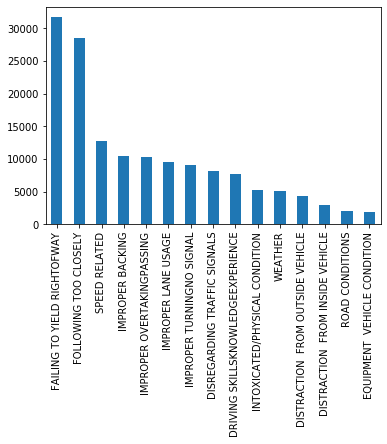

In [7]:
dx = pd.read_csv('dx.csv')
dx.PRIM_CONTRIBUTORY_CAUSE.value_counts().plot(kind='bar')


In [8]:
dx['DRIVER VISION'] = dx['DRIVER_VISION'].astype(str)
dx['DRIVER ACTION'] = dx['DRIVER_ACTION'].astype(str)
dx['SPEED LIMIT'] = dx['POSTED_SPEED_LIMIT'].astype(float)
dx['DEVICE CONDITION'] = dx['DEVICE_CONDITION'].astype(str)
dx['AGE'] = dx['AGE'].astype(float)
dx['PHYSICAL CONDITION'] = dx['PHYSICAL_CONDITION'].astype(str)
dx['FIRST CRASH TYPE'] = dx['FIRST_CRASH_TYPE'].astype(str)
dx['ROADWAY CONDITION'] = dx['ROADWAY_SURFACE_COND'].astype(str)
dx['CAUSE OF ACCIDENT'] = dx['PRIM_CONTRIBUTORY_CAUSE'].astype(str)

## Handling the Imbalance
The dataset is heavily imbalanced so Ill use the SMOTE technique to help balnce the dataset

In [9]:
smote =SMOTE(k_neighbors=6)
dx.drop(dx.columns[dx.columns.str.contains('unnamed', case = False)],axis = 1, inplace = True)


CL =['CAUSE OF ACCIDENT','DRIVER VISION', 'DRIVER ACTION','SPEED LIMIT', 'AGE', 'PHYSICAL CONDITION',
       'ROADWAY CONDITION','DEVICE CONDITION', 'FIRST CRASH TYPE']



d = dx[CL]
dm = d


dd=pd.get_dummies(dm, columns= ['DRIVER VISION', 'DRIVER ACTION','PHYSICAL CONDITION',
       'ROADWAY CONDITION','DEVICE CONDITION', 'FIRST CRASH TYPE'], drop_first=True)


In [10]:
# dd=pd.get_dummies(dm, columns= ['DRIVER VISION', 'DRIVER ACTION','PHYSICAL CONDITION',
#        'ROADWAY CONDITION','DEVICE CONDITION','FIRST CRASH TYPE'], drop_first=True)

X = dd.drop(['CAUSE OF ACCIDENT'], axis=1)
y = dd[['CAUSE OF ACCIDENT']] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=42)

scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)



X_train, y_train = smote.fit_sample(X_train, y_train)


## Hyper-Parameter Tuning
In order to find the most optimal parameters for the XGBoost Classifier

In [ ]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))
        
        
classifier=xgboost.XGBClassifier()

In [ ]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,
                                 n_iter=5,scoring='accuracy',n_jobs=1,cv=5,verbose=3)

In [ ]:
from datetime import datetime
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X_train, y_train.values.ravel())
timer(start_time) # timing ends here for "start_time" variable

In [ ]:
random_search.best_params_

In [ ]:
random_search.best_params_

## Modeling with Feature Selection

Accuracy: 61.16 
AUC : 0.7919271255833484


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

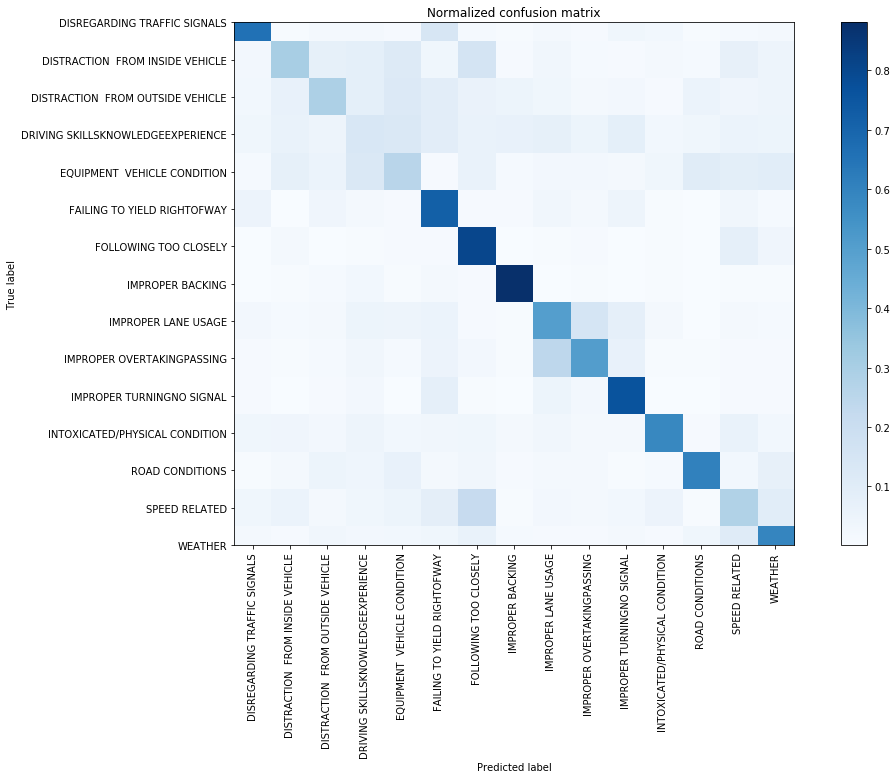

In [11]:
## X Boosting ##
feature_selection=PCA()
clf= XGBClassifier(objective='multi:softmax',num_class=14, subsample= 0.7, random_state=42, 
                    min_child_weight= 3, max_depth= 10, learning_rate= 0.15, gamma=0.3,colsample_bytree= 0.5)

xgb = make_pipeline_imb(feature_selection,clf)
xgb.fit(X_train, y_train.values.ravel())
y_pred = xgb.predict(X_test)

acc_xgb = round(accuracy_score(y_pred, y_test) * 100, 2)
print('Accuracy: {} '.format(acc_xgb))
print('AUC : {}'.format(multiclass_roc_auc_score(y_test, y_pred)))

cm = confusion_matrix(y_test, y_pred) 
dummies = pd.get_dummies(dx['CAUSE OF ACCIDENT']) # Classification
name = dummies.columns

#Normalized CM
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(15, 10))
plot_confusion_matrix(cm_normalized, name,title='Normalized confusion matrix')
plt.xticks(rotation=90)

# X Boosting Testing

Log Loss: 13.41495396886973
AUC: 0.7919271255833484
Precision Score: 0.6115973010889171
Recall Score: 0.6115973010889171
Accuracy Score: 0.6115973010889171
F1 Score: 0.6115973010889171


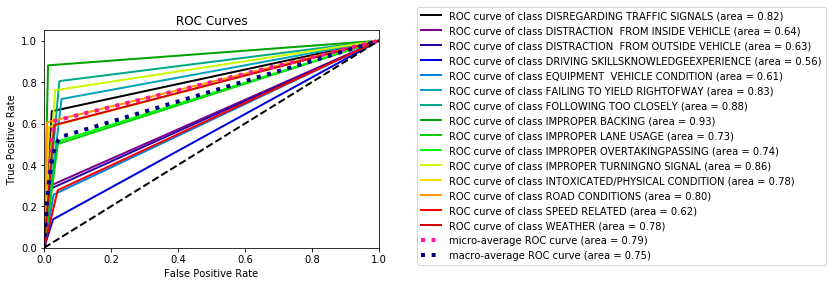

In [44]:
y_predi = xgb.predict(X_test)
lb = LabelBinarizer()
lb.fit(y_predi)
y_predi = lb.transform(y_pred)

print('Log Loss: {}'.format(metrics.log_loss(y_testi, y_predi)))
print('AUC: {}'.format(multiclass_roc_auc_score(y_test, y_pred)))
metricsscors(y_test, y_pred)

skplt.metrics.plot_roc(y_testi, y_predi)
plt.legend(loc='lower left', bbox_to_anchor=(1.1, -0.1), ncol=1, fancybox=True)
plt.show()

In [46]:
xgb.params_

AttributeError: 'Pipeline' object has no attribute 'params_'

In [38]:
xgb.plot_importance(xgb, importance_type='gain');

AttributeError: 'Pipeline' object has no attribute 'plot_importance'

In [28]:
## Save model
import pickle
file_name = "xgb.sav"

pickle.dump(xgb, open(file_name, "wb"))

In [20]:

xgb.save_model('xgb.model')

AttributeError: 'Pipeline' object has no attribute 'save_model'

In [ ]:
model = pickle.load(open(filename, 'rb'))

## Conclusion
Random Forest, X Boosting & LinearSVC classifiers where implimented after re-sampling with SMOTE since the dataset was heavily imbalanced and they all gave roughly the same results give or take 5%. So I opted to go with X Boosting classifier using PCA as its feature selection parameter. The features included where:

* Driver’s Action
* Driver’s Vision
* Roadway Surface Condition
* Device Condition
* First Crash Type
* Posted Speed Limit
* Age
* Physical Condition

The model gave a log loss of 12.9 which and accuracy of 62%. This means the amount the model penelizes for incorrect predictions 12.6 but it only predicted 62% of the primary causes of accidents accurately.



Its total recall is 62% which is the total amount of times the model classified the cause of an accident was a category correctly out of the total amount of times that category was indeed the cause.

Its total precision is 62% and this is the total amount of times the model classified the cause of an accident was a category correctly out of the total amount of the predictions made for that category.

The AUC score is 0.8 and this is the average probability that the model can classifiy each class correctly.

The main metrics we'll focus on for this would be recall and the AUC score as we won't want to incorrectly classify the cause of an accident and risk wrongfully blaming a driver for an accident when it might have been something else.


## Future Work
* Road Type Division: Segregate the different types of streets/roads to understand the unique properties of accidents that occurs in each

* More Data: Gather more data like if a driver was on the phone, exceeded the posted speed limit or or has a good amount of driving experience .

* Region Division: Deeper analysis on the primary causes of accidents in the North, South, East West and Central regions of the city.

In [ ]:
dx = pd.read_csv('dx.csv')

In [ ]:
dx.drop(dx.columns[dx.columns.str.contains('unnamed', case = False)],axis = 1, inplace = True)

In [ ]:
dx.shape

In [ ]:
dx.CRASH_HOUR

In [ ]:
pie_plot  = dx['FIRST_CRASH_TYPE'].value_counts()
percent = (pie_plot*100)/pie_plot.sum()

In [ ]:
percent

In [ ]:
colors = ['blue','brown','red','skyblue','lightcoral','lightskyblue','pink','grey','violet','purple', 'darkgreen','yellow','grey','lightgreen','magenta','cyan','black','lightyellow']
explode = (0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0)
patches, texts = plt.pie(pie_plot, startangle=90,explode = explode,colors=colors, radius=1.5)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(pie_plot.index,percent)]
sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, pie_plot.index),
                                          key=lambda pie_plot: pie_plot[2],
                                          reverse=True));

plt.legend(patches, labels, loc='upper right', bbox_to_anchor=(-0.1, 1.),
           fontsize=8);
plt.title('Proportion  of crashes by each Crash Type', y = -0.25  );
# plt.savefig('piechart.png', bbox_inches='tight');

In [ ]:
dt = dx[dx['FIRST_CRASH_TYPE'] != 'PARKED MOTOR VEHICLE']
dt = dt[dt['FIRST_CRASH_TYPE'] != 'FIXED OBJECT']
dt = dt[dt['FIRST_CRASH_TYPE'] != "OTHER OBJECT"]
dt = dt[dt['FIRST_CRASH_TYPE'] != "OTHER NONCOLLISION"]

In [ ]:
ppie_plot = dx['FIRST_CRASH_TYPE'].value_counts()
ppercent = (ppie_plot*100)/ppie_plot.sum()

In [ ]:
ppercent

In [ ]:
colors = ['blue','brown','lightcoral','darkblue','yellow','lightskyblue','pink','red','darkred','violet','purple','white', 'darkgreen','grey','lightgreen','magenta','cyan','black']
explode = (0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0)
patches, texts = plt.pie(ppie_plot, startangle=90,explode = explode,colors=colors, radius=1.5)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(ppie_plot.index,percent)]
sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, ppie_plot.index),
                                          key=lambda ppie_plot: ppie_plot[2],
                                          reverse=True));

plt.legend(patches, labels, loc='upper right', bbox_to_anchor=(-0.1, 1.),
           fontsize=8);
plt.title('Proportion  of crashes by each Crash Type for Moving Collisions', y = -0.25  );
# plt.savefig('piechart.png', bbox_inches='tight');

The most deadly types of crashes leading in proportions are Turning at 19% and Angle at 13%. I’ll recommend focusing on these as they account for the most fatalities.

## Conclusion
The most types of car accidents are Rear Ends accidents accounting for 30% of car crashes. Followed by Sideswipe Same Direction accidents accounting for 16% of car crashes.

## Recommendation
The most deadly types of crashes leading in proportions are: Turning at 19% and Angle at 13%. I’ll recommend focusing on these by making better and seperate traffic signals for turning as they account for the most fatalities.

In [ ]:
dx.describe()

In [ ]:
dx.shape

In [ ]:
ccrashes_by_year = dx.groupby('CRASH_YEAR')['CRASH_YEAR'].count()

In [ ]:
crashes_by_year = dx.groupby('CRASH_YEAR')['CRASH_YEAR'].count()

In [ ]:
dx["INJURY_YN"] = dx["INJURIES_TOTAL"].astype(bool).astype(int)
dx["INJURIES_TOTAL"] = dx["INJURIES_TOTAL"].astype(float)

TITLE = "CRASHES WITH INJURIES"
INJURY_YN = "INJURY_YN"
print("Sample contains {} {}".format(dx[INJURY_YN].count(), TITLE))

count = dx.groupby("STREET")[INJURY_YN].sum()

fig, ax = plt.subplots()

cmap = sns.cubehelix_palette(as_cmap=True)
hue = dx["STREET"].apply(lambda x: count[x])
points = ax.scatter(dx["LONGITUDE"], dx["LATITUDE"], c=hue, s=20, cmap="YlOrBr")

ax.set_xlim((-87.9,-87.50))
ax.set_ylim((41.60,42.05))
fig.colorbar(points)
fig.set_size_inches(8, 8)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Count of {} by Street".format(TITLE))
plt.show()

## Conclusion
From the geo-map showing the proportion of injuries caused by car accidents on each street by their longitude and latitude positions. As we can see from the map, more accidents with injuries occur about south-east from downtown of chicago, more especially on the major streets.

## Recommendation
I'll definitely recommend channeling more law enforcers and first aid responders towards the south central region of chicago in order to keep up with the high concentration of serious accidents that occur within these area.

In [ ]:
dx["INJURY_YN"] = dx["INJURIES_TOTAL"].astype(bool)

In [ ]:
weekday_order = ["Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"]

In [ ]:
fig, ax = plt.subplots(1, 2, squeeze=False);

# Find sum of hit and run for each  day of the week
groupedij = dx.groupby('CRASH_DAY_OF_WEEK')['INJURY_YN'].sum();

#Plot total crashes each day
plot_1 = sns.barplot(
    x=groupedij.index, y=dx.groupby("CRASH_DAY_OF_WEEK")["CRASH_DAY_OF_WEEK"].count().values,
    color="lightgray", ax=ax[0][0], label="All Crashes"
);
#Plot INJURIES crashes each day
plot_1_Overlap = sns.barplot(x=groupedij.index, y=groupedij.values,
    palette="Purples", ax=ax[0][0], label="INJURIES");

# Set x and y  axis for first chart
ax[0][0].set_xticklabels(weekday_order);
ax[0][0].set_xlabel("Day of Week",fontsize=23);
ax[0][0].set_ylabel("Count",fontsize=25);
ax[0][0].set_ylim((0, dx.groupby("CRASH_DAY_OF_WEEK")["CRASH_DAY_OF_WEEK"].count().max()));
ax[0][0].tick_params(axis='both', which='major', labelsize=20);
ax[0][0].set_ylim((0, 20000));

# Set chart properties

fig.suptitle("Accdent counts and Injuries by Days of the Week", y=0.95,fontsize=25);
fig.subplots_adjust(wspace=0.5 , hspace = 0.5);
fig.set_size_inches((20, 10));
fig.legend(bbox_to_anchor=(0.5, 0.11),fontsize=15);

# Find mean of hit and run for each  day of the week
groupedijmean = dx.groupby("CRASH_DAY_OF_WEEK")["CRASH_DAY_OF_WEEK"].mean();

#Plot total crashes each day
plot_2 = sns.barplot(x=groupedijmean.index, y=np.ones(len(groupedijmean.index)),
    color="lightgray", ax=ax[0][1], );

#Plot proportion of hit and run each day
plot_2_Overlap = sns.barplot(x=groupedijmean.index, y=groupedijmean.values,
    palette="Purples", ax=ax[0][1]);

# Set X and Y axis for second chart
ax[0][1].set_xticklabels(weekday_order);
ax[0][1].set_xlabel("Day of Week",fontsize=23);
ax[0][1].set_ylabel("Injuries",fontsize=25);
ax[0][1].set_ylim((0, 8));
ax[0][1].tick_params(axis='both', which='major', labelsize=20);

plt.show();

In [ ]:
fig, ax = plt.subplots(1, 2, squeeze=False);

# Find sum of hit and run for each  day of the week
groupedij = dx.groupby('WEATHER_CONDITION')['INJURY_YN'].sum();

#Plot total crashes each day
plot_1 = sns.barplot(
    x=groupedij.index, y=dx.groupby("WEATHER_CONDITION")["CRASH_DAY_OF_WEEK"].count().values,
    color="lightgray", ax=ax[0][0], label="All Crashes"
);
#Plot INJURIES crashes each day
plot_1_Overlap = sns.barplot(x=groupedij.index, y=groupedij.values,
    palette="YlOrBr", ax=ax[0][0], label="INJURIES");

# Set x and y  axis for first chart
# ax[0][0].set_xticklabels(weekday_order);
ax[0][0].set_xlabel("Weather Condition",fontsize=23);
ax[0][0].set_ylabel("Count",fontsize=25);
ax[0][0].set_ylim((0, 300000));
ax[0][0].tick_params(axis='both', which='major', labelsize=20,rotation=90);

# Set chart properties

fig.suptitle("Accdent counts and Injuries by Weather Condition", y=0.95,fontsize=25);
fig.subplots_adjust(wspace=0.5 , hspace = 0.5);
fig.set_size_inches((20, 10));
fig.legend(bbox_to_anchor=(0.5, 0.11),fontsize=15);

# Find mean of hit and run for each  day of the week
groupedijmean = dx.groupby("WEATHER_CONDITION")["INJURY_YN"].mean();

#Plot total crashes each day
plot_2 = sns.barplot(x=groupedijmean.index, y=np.ones(len(groupedijmean.index)),
    color="lightgray", ax=ax[0][1]);

#Plot proportion of hit and run each day
plot_2_Overlap = sns.barplot(x=groupedijmean.index, y=groupedijmean.values,
    palette="YlOrBr", ax=ax[0][1]);

# Set X and Y axis for second chart
#ax[0][1].set_xticklabels(weekday_order);
ax[0][1].set_xlabel("Weather Condition",fontsize=23);
ax[0][1].set_ylabel("Injuries",fontsize=25);
ax[0][1].set_ylim((0, 1));
ax[0][1].set_ylim((0,0.3))
ax[0][1].tick_params(axis='both', which='major', labelsize=20,rotation=90);

plt.show();

In [ ]:
fig, ax = plt.subplots(1, 2, squeeze=False);

# Find sum of hit and run for each  day of the week
groupedij = dx.groupby('CRASH_HOUR')['INJURY_YN'].sum();

#Plot total crashes each daydata:image/png;base64,iVBORw0KGgoAAAANSUhEUgAABKAAAAOXCAYAAAATgTknAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjEsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy8QZhcZAAAgAElEQVR4nOzdd5wsVZn4/89DzjmjIq4kQVcFQQT1YgDzooKIrjnzNSCwuqsuID8Mi5hRFFdY02JAFJAVUKIiQQQzEsQLIiKSLukSfX5/nNNM3aZ7Znru1HTP3M/79apXd1edU/V0VXV19dOnTkVmIkmSJEmSJLVlqWEHIEmSJEmSpLnNBJQkSZIkSZJaZQJKkiRJkiRJrTIBJUmSJEmSpFaZgJIkSZIkSVKrTEBJkiRJkiSpVSagJKkFEZF1mDfsWKQ2RcS8zv4+7Fi6jcLnMCLOqjEcPKwYJmuUt6UgIt5Yt8+Vw45F44uIZRrHn527pj26Me1hU5y/+4KkWckElKSREhFrRsTdjZOzzYYd01wSEftGxMER8fhhxzKbRMTj63rbd9ixzCXNhIfJWvUSxQ11H/nsOOVWiYj7armFEbHCOGW/WMtd107Ug4mIterx5eCIWG3Y8cy0iHh+RHwpIn4fETfX7XhTRFwQEZ+MiO2HHeNMiYhH1f3gwGHHIkltMAEladS8Eli+8fr1wwpkjtoXOAgwATWYx1PWmwmo2eWyOtw1xBiuqTHcOMQYZq3MTODs+nKXcYo+FVimPl8BePI4ZefVxzMXK7jpsxbl+HIQsMQkoCJiy4j4BfAD4I3AVsCqwG3A6sD2lGPuBRHx44hYa2jBTq97GTs23dc17VGU/WCiBNSttf4fpz06SWqRCShJo+YN9bHzT/drImLpYQUjafbKzC3rcOEQY3h1jeGIYcUwB3QSRY+JiHX7lJlXH6/ver2IiNgQ2LxrvpphEfFk4ALgicAdwIeAxwHLZebawHLANsAHgBuAZwIbDSfa6ZWZ1zSOTX+b4jyOq/V3m+74JKlNJqAkjYyIeCKlpcmtwHuAq4ANgecOMy5J0lB1EkVBn8RSY/xh9bFfa6nmeBNQQ1CTiN+ltPa6Ftg+Mz+Qmb+pLd7IzH9k5u8y80OUVkFfBuybTJJmORNQkkZJp/XTtzLzbuBrXePHFRFrR8SBtd+Im2tfUvMj4tSIeGtErN6n3lYR8bna/8TtEXFHRFwWEd+MiJdGxEOOlbWvqo9FxB/rcv4aEd+JiG0n+2YjYveI+H5EXBcR90bELRFxTo112T51HuzQuPaN8qb6fm+rsZ8XEf/ao97BtWPhTeqoYxp970y50+GI2LWup6trvys3R8SvI+KzEbFjnzob1HX3u7qu76zPD4uI9fvUmVTnyP36E+quH6UT2KMj4s8RcU9EXFv7INm41zyBY+rLTbrXW3R1Lh0Ru0XE8XWe99Ztc1VEnBYRBwx6GUlELBsRz46Iz0TERXVfuzdKvzinRsTeERF96k75fXfNZ8uI+EZEXF/396vqNu65vaZLc3tGxKoRcWhE/KHuazdFxA8iYofJ1O8aP9370xPq+rk2Sv81ZzXKTtgJeUT8U12fl9bPxF31+aci4hHj1NsyIo6KiMtrnYV1254fER+OiC3He38TiYjtIuK4us/dHRFX1s/uGj3KfrO+z/+bYJ6Pjoh/9Fqv/WTmpYzTsikiVqG0pLkT+CLlkssdonc/UJ36f87MnpcvRcRmUb4T/tC1PT4ZfTqNjoilImLniPivuv47n/+b6j7w5uhxXI+InwJXNEb9uev48uOeK6XUfVLdPtfXz/Mf+22frnorRukP8JyIuLHG+deI+F5E7NqnziKdakfE+nX/vKLud/ePt8wu/05pzZTAy+v27Ssz78zMNwIPKRcRa0T5frskyrH2rvp5+FxEbDrJ97Ja/bxcVvfzmyLixIh40nhxRem76+NRjof31HX4rYh4wgT1enZCHhHXAj+qL5eOh37X/Hej7ISdkNf9+Av1c7swIhZExC8i4gMRsWqfOs+q872/vt48Io6p+/M99fjyxYiYE63RJA1BZjo4ODgMfaD02XEL5YT0KXXco4B/UPpIWH+C+rsCN9f6Wevc0nidwO496r0XeKBRZiGl/4lmvTW66jwSmN+Yfg+woPH8RY1p83oscxXgpK5lLKjvtfP6Z8CaPeqeVaf/f8D3G+91Qdf8PthV7wDKD7gHGsu7vjkMuL1WAr7dtczbgLsbr3/Zo97Tu7bLnZTLLzqvbwZ27lFvXqfMBHH1XO/N+pQWELc3Yr6vMe0vwMZdda9vrN8HutcbcECj7IFd6+TOxrL67hMTvKd5XfXv7jHPbwNLTVB3oPfdmMdzurbr7ZTPSQLXAa+bzLaZxHvr9VnpTNub8iO98xm9szHtXmC3qe4P07A/vbTG0PlcLQTO6vGZPbjPMt7UqN/Zvnc1Xi8Ant2j3rO7tsu9PPSY13OZk9we/0I5nnViuKcxbT7wyD51HwAeMc4yPlrLXTZgbMfWer/rMe25ddqp9fWPOvt8j7KX12lf6bOct7LoZ+Puxv6elBa6z+xR79Fd677XcfksYIWueicAf2+UuYFFjy/fbpR9Yy1zJfCqRpy3suj32K+Blfq8vy1q/U7Zf/SI87M96i3TmP6GGmfn83gbcP8kt+OyjB2HThn0mNE1r8dSjl3ZFUvzda/v/eZ72YvSj1KvY8s9vbZ1ncejKP27NfeTBY3n/9KYtnNX3ea+8rDG+ItZ9Dym+7vm4732hT7x7c2in9kFLHq8mA9s0aPes+r0++vzOxr1m5+LPwMbLs72c3BwWDKHoQfg4ODgkJlQOh9P4Iqu8efU8QeMU/cJjP1A+C3lx8iyddpKwHbA4d0nksDbGidTJwCPb0xbi/ID75vAao3xSwM/ZyxZsiewTJ32mBpv80fgvB7xfq/zXutJ4qp1/AqU5FXnZPh7Peqe1Vj2rcBrgBXrtIcBJzL2I3CzHvXn1+mvXczt9a3Gcj7aOYmmXCKzMfAK4MiuOg9vrJvfATs1pj0V+EOddhMPTQLN66zTCeLqud5Z9If1zXV7b1mnLQe8jLEfLl/tMd/X1mnzx1n2Joz9CPw4sFFj2urAzsDngG0HXNc7AN8AngesD0RjH30nYz963tmj7uK+74c15v8ryqUyUFpQP4fyI+TB/X0K+1Ezvl6flWbsv6Mk0Zaq+9mTGvvMfHon4CbcH6Zhf7odOLmzXuv0zRrPz6JPMgjYnbHk0UfqPhR12IKxJO8CupI6jCXkTgW2aYxfgdJ3zkHA6xZje9xKuURtqzptmbq/dH4gXwgs3VX/93XaB/vMf1nKD+kE9h8wtjc3Yluva9p/1fH/UV9/oL4+pKvcRo15POQYCOzBWOLhUOARje2xFeWysc666T5GbQIcT0lIbtTZHymdar8O+Gute1iP5fZMSPQo10k63FFj/CJjx96VgHcwlsw8sEf9tYCr6/QfUY5Jy9dpawD7M5Zw+H9ddZtJm9vrtp7XeJ+bT3I77tyYz1sGPWY05rM6Y99n11C+9zuxPJ7Sv1RSzg22Gee93Az8hvLnyFJ12J6xROUfqcfcrvoX1+k31m3eOQ/YBvgpi54HTCoBVac9mACa4P33TUBRjo2dZNE5nfdPOX95EWOfwcuAlfss/x/1PRzf2baUG8TszVgC8eipbj8HB4cldxh6AA4ODg6ZCXBGPaH5z67xnZOsS8ep+5Na5nJg9Ukub03Gfngf232COU69lzVOHHv9C74Si/67PK9r+vPr+L/Sv8XJwxj7EfD4rmlnNebd69/95Rn7R/j9PabPZzETUJTOYDsxvG2Aekc2Tvg36PO+O8mOI7qmzessc4JlTCZhcAa9kxXvqNPvov6YaEx7LRMnoDr7xkAtOxZ3YOxHc68fIov7vj/P2I+s9XrU3YZG650pxN6Mb16P6Z1pN/RZ/mMbZXYap37f/WEa9qcL6ErEdJXtfGYP7hq/HKX/mwReP079E2qZTzXGrddY/rS1Quh6X5dRk9tdZZ7VKLNn17R31fF/7rVOKD/Uk5I8WWfA2DZrLPdlXdM6yYZO69mn1tfndJV7ZWMem3RNW56xJNGrx4njB7XM4QPG/+Ra7zZKR9vNaYMmoBL47z5lPk2f70zgk3XaaXR91htl9qxlrm9uQxZN2twy1f0OeEtjPtsvxr76/sa+tFWP6asx1kLp+13Tmu/l+l77IuWPrU6ZHbqmvaIxbV6PuqtQ+rDslJnpBFSnBeAf6P0Z3o7SwimBffssv7OfPOTcCHg3Y4nQvsc+BwcHh16DfUBJGrqIeBRjP3y+1jX525R/MLeMiKf0qLsZ5R9VgPdl5oJJLnYPyj/T9wH7ZWZOst7L6+O5mXl698TMvIuxTnB7eWN9/Fpm/qVXgcy8lrHOcfvd4ebczDyze2Rm3kNpEQHljkJteH19/F1mHjmZChERlAQNwBcy8/ruMvV9f6G+fHn39Gn04cz8R4/xJ9THFSk/dgd1a31cNSJWnlJkU3NyffynKHf46meg91232V715Rcy84buipn5W+C4wUMe2FF9lv8b4E/1ZVv7+0Q+lpkPTKHecymtBf/GWB9jvXy1PjaPBbdTWihAuVFDGz6WmQu7R2bmjymXCMNDP6dfoSQyH0ZpsdftTfXxu5l54yDBZOYVlOQ6NDoSr33ZbFuX+/M6+kLK5UY7RMSKjdl06v0pM6/uWsQLgA0ol5V2fw81daYNdPexzDyfknxflenZVw/tM77zed4iIpbvjIxyN9nX1ZeHZ2a/Ppu+S7kMbX1KS6JevpKZfx0w3o61G89vnuI8YOzY9K3s0YdUZt4GfKy+fEHtJ6yXL/TaFzPzEkoiFR66vTr7/dmZeVaPundQWl3PuIhYm/InEZTWdr0+wxcxtp/sPc7sPtzn3KhTd2XKpYiSNGkmoCSNgtdTLnH4SWbOb06oJ5Hfb5Tr1klKPQD8cIBldur9YsAT6e3q4xnjlBlvWidZ9ubacWzPgfIvJIx1Gt7tgnGWcV19HKiz6wF01t1JA9TZlLF4+naqy1gHrGv360B2GvRbd9c1nk9l3V1IaSm0IXBBRLw9SifRPTsIH0SUDrj/LSLOjtL5+L0x1gn2XY2i43UmPuj7bm6zqe7v02WY+/tEzp1ivc6xYE3gr+McC75Uyz14LKg/KjsJ8FMi4pCI2CEilptiLL1MZptv1xyZmbdSLs+FsWQTABGxCeWyZoCjphjTWfVxXmPcUymXFv0sM++rcdwDnE9pZdb846JTr9d762yPdRh/e3SS7g85NkfE8hGxT5QbDlxXO21u3uihs4/27Mh8ADd0f1c2dD4PQbmsrmMbymVrAF8f5/1dR0lGQ//vn6nu8524Oib7x8+iMyhJxa3ry8l8nyxNadHUy1SOLYt7HtCmbRlbx5NZN0+oycleLuwzfnG/KyUtwZYZdgCSlmxR7jD3mvryq32KfYXyL91eEbFv/XexY4P6eGNm3jnAojv1uv8Fn8h69bFn66Xq2l4jo9wBaZ36cnXGfgyMZ6U+428fp07nn+2ed9KbBlNZd+s1nk923a3HWOuWaZOZPdddZt7fyBUNvO4y89aI2Bv4X8qPo8/WSQsi4hxKa75vdX4kT1ZEbE5JNjR/tN5FaXHVaQXTuRtd35ZXU3jfU9lmbRnm/j6Rh7TMmqTOXaSWY2z7jWfFrtdvpPT59s/Af9bh3oj4OaWFwpczc3FamIy3zTvT1usx7QuUljbPi4iNGy0930j54/OyXq1GJulMymV0W0bEBrUl5bw6rXueZ9dp84DT693G/qkxn26Dbo9Fjs0RsQHlc/qYxui7KUnpTgu5dSnrYHFbSE7m8wCLfiaady1bd5LL6ff9M9V9Hsr66Fib0sfSoNZm7E/0Qb5PepnKsaWz/oZ9XOxl0OP2spRE5U1d0x+oLbp76bePSdKEbAEladh2Y+yH9X/3uO1wAqfU6aswdhlXtyn9k9pSvX7Tmv8yvjwzYxLDa6cYX5uy63Gq9aer3MiolydtCryakji9gpJofCHl0p1LImK8Vkq9HEP5jMyn9M+ydmaunJnrZeYGLNrqabFbW/Ux67bFTJni5Xcwdjw4ZZLHgkW2bWZeAzyR0hn8Z4BfUM7rdqJcBnxlRDxjirFNWWZeSOmgeWnK3dK6L//6Up+qk9FMHM3rejy7q2zn9S5dj/DQZBWMbY8fTHJ7dP+J+2lK8unvlD7jNsjMFTNz3czcoH5WO4mbtj6n42l+/6wzyff49T7zmuo+D+VmAh39WiUNYpjfJ3PluDhX3oekWcAElKRhe8OA5bsvw+tcPrfugP3udOo9csDld35AjHcJRc9pmdm5TTOUzpNnq07/TY8coE7zH/OHj1Ouue7+3nj+4D+uEbFCr4oRMZkWZa3LzDsz82uZ+drM3Jzynt5LaQ3RbBk1oYh4OGOXEO2dmcf1aNWyAe1obrPx9vdBE2qjYBT2p87naMrHgsz8R2aempnvysztKJfDvJLS+fKawP8uxmV5423XzrR+LWE6fbm9obZyfV6tcw8lMTslmXkV5b0BzKv9Pz2R0k9g9+VC51M6yN8+IlZiLFF1eZ/+96a8Peo+tHt9uU9mfiUz/9ZVZlmGe7lSs9+9YX7/XEjpvBrgxVOcx02Mtf6cyvfJ4urMaxSPi5M9bnem3cfYeYkktc4ElKShiYh1KbcEhrFOwfsN29dyO0XElo3ZdDrDXZrSqe9kdeptN0HHzd0uqo+7jFNmvFYHnb4z9qw/zGZa56R9cf6B76y7Fw5Q50+MdTj7zHHKdfq+uikzm5ff3dJ43u8Hxw4DxDOoKa+3zPxLZh4GfLyOevZ45bs03+slfco8q8/4xdXcZlPd30fVsPcnGDsWbBwRO49bcpIy8/bM/F/GEvvrM/Vkw3jbvDPtoj7T/5dyt7dHUFq5dvqDOn7Qzsd76LSC2oWx/p/Oy8x7m4VqP1kXUi4R2qkRc6/L72Bse2wSEU8eMKb1KJfuQf/P6dMaZbo1bw7QVuuoXzGW+GnzJg/jqtup0wpu14jYabJ1O9+Zddt2WlJN5vvkAfpvl6lY3POA8Szud/QvGGvRNJl1c/FitOKUpIGZgJI0TK+i/DhYAJyUmXeMM/ycckthaLSCyswrgXPqyw9HxGqTXPZ3KD+QlgE+OUBH0Z0OdneOiHndE2vnqP82Tv1O57ubT1COiFh5mjsVhvKeYdHOaQf15fq4dUS8bTIV6p10OuvuLbW/lEVExEaUW3QDHNs1+XJKKwcot3LvrrsU8B+TiWWKJlxvzTtO9dGJf5CT/eY/0//cY5mrAh8YYH6TVrfZt+vLt0bEOt1lIuIxlOTxbDPs/QlKJ/6dlpifrq10+oqItRrPJzouNO98NdUflwf0ah0WEbtQEjow9pleRO2Pr3O3uA8wdke8qXY+3tRJIG3O2B28zupTtnMZ3qsol8Y263c7gXJHQoDPdN097yGa24Ox4wP0/pwuS/+71nXXX5xjc1+177n/qS9fHxE7jle+6/1Nt49SWmQF8M2uP5V6xbJiRHwR2Kox+pv18WURsVWPOqsCB9SXJ3X1Hbm4Ovv90yPiqT2WvTKw/xTn3dkXlqrvYSCZeRNjnY+/p9d+HBFPZKzFXvd3rSS1ygSUpGHqJJJO6P73uo/v1MdXR0Sz/413US5v2gw4NyKeU0/4iYiV6t2hvhARD7YUycwFwHvqy72A70XEg7ecjog1I+L5EXFCV1Lru5T+TQC+GxEv7dxBpp4E/5D+nZ2SmScA36svPxoRR9ZOpjvLXa7G+1+UTr77zmuKflsf94iINacyg8w8k7GT/yMi4iO1g1+i2Cgi3hgRX+6q+mFKx9lrAT+OiAfvTlX/Bf8x5cfXzZQfKM1l3kdZ9wDvi4iXdX6ER8QWlHX6kB9+06iz3laLiH79kL03In4YEa/qrI8a3/K1Tifh+H8DLPf3jF1ydHREbNuY746UH95T2o6T9BFKJ73rAD+KiO3qsiMidqXs7/06qh1ZI7A/dS7J3YfSWuGJlGPXbs3kUkRsGhFviYgLa9mOp0TEryPi3RGxVadlSN0uT2HsTm3XAr+ZYogbAifX9UFELBMRewDH1ekXA8ePU79zGd5TKK2UFqfz8aZmAqmTgOru/4mu8a9ojOsZQ+1w+e2U7fEk4KcRsWvnuwQgIh4VEW+N0tH7mxt1b6Vc8gfwqYiY19gmj6P0Y/jP9Pms1FZhnUvkXtf1/TadDqb0JbcscFpE7NtMLEfEGhHx3Ij4Kv2TeostM2+gJK5vp1wK9vOIODQitu78GVT35a0i4r3AVZT13fyj6HOUY+PywKn1e7+zzv8ZOI1yF7+7KR30T6dvUVqUBXB8RLy4cR6wNeW4uPYU530ZY5cIv6mzPgb0/jqPLSh3ydy6xrZURLwQOJnymbycxeuTTZIGl5kODg4OMz4AT6ac6CfwgknWeWyjzr90TduVktzoTL+XksjIxrB7j3n+B6WFQKfMXZR/IJv11uiq8yjKiW9n+t2NZd9DuaywM21ej2WuRPnXsbmMO2q8D3SN37ir7ll1/MHjrKeDa5mzekx7GqWJf1JOUK+j/CCZP+D2W4nyA74Z64K6Ljqvf9mj3tO7ttMddei8vgV4ap9lPoxyV5/mNl5Qn99W591zvVP6f0lqw55x3td42+3Hjem3ddYbsG/Xem/uS52+Sjrjfk/pnHiQdf0CSj8dnXncWYfO82e2/L6f37Vdb6vvLev+87rJLKPPcudNsOy+0ybzmZhg3q3vT5P5zFL6bLqzsaz7KHcKa67zBN7fZ711Yr+xaz9ZQJ/P0iS3x7/U+SblM9uM52pg00nM7yeNOvsPun+MM98/Nua7EFi+T7mVu9bJ7yYx71c39u/xtsd7u+pt37Ud76YkWDrbZ29KQjCBf+2x3IO73tM1lOPL1xtl3linXzlO/I9uzOdhPab/E/DrrvdyS2Pf7wyXdtVbpjFt52najltTLo1rLvc+ynHzvq7x/wes2VX/cSz6Gb6r630spPf3/qTeC/DTWuYDfdbztV3L6iz7bsrnp+cyJrGN/qcx/Q7K520+8NHJ7gt1f7unMZ8FNcbO6/nAFj3qPatOv3+c9TLt+4KDg8OSM9gCStKwdPooWUD5p3JCmfkb4NKu+p1pp1FaQH2IckK7kHLb8vnAqZRLu87oMc+PUP6Z/hJwZR0dlH8hjwVewqKXR5ClI9zHA5+g9JMTlBPO44CnZOaJE7yPuzJzb0r/EV+j/Lu7FOUufzfUON8DbJa9O8udssw8h5JQ+DFl3a9P+Zd4kwHnc1dmvpSSHPkeJRGxAuVk+deUu3K9uUe9s4EtKf0hXUp531GfHw5slZk/6bPMayn98vw3Y7eXvgP4KvDEOu827QF8kvKv8bKMrbfOJTNHUd7zsZQWU3cBq1F+3P0E2LfGeT0DyMwfUBKHJ1MSActQfhAfU+d3+mK9q4mXfzKlhc43KfvncpRLlY6g3MXqT20uvy0jsD914vgG5QfpoZS+Ze6g7FN3A7+krOdnAf/VqPZzyh1Bj6T0+XIj5W6LnTqHMc5naZJxnUBpvfTdOt+gbOuPA4/PRfto66fTanWxOh/v4czG8/Mz855ehbJcCtjsp+rMXuW66nyVsj0+zEO3xyWUmwg8k7E+3Tr1LqTsT9+hbI+lKN8d36J8L0x0qdMhwH6U7Xk/JUG6CdN8k4HM/COwLeVOfSdTWl6tTPlcX0Vp1fY6YFr6JZsglt9Rji0vBI6mXGZ/B+W4eRulD69PUD6Pz8vMW7rq/5qSxDqE0iLpgfo+/kj5bGydmd9vKfYrKecOn6ScZyxFOe/4DrAjZd1O1Vsp7+m3db6PoOwLD7kMepz4jqX8aXcUZbsuT9mvLgEOBB6XmZctRoySNCWRmcOOQZIkaVrVy5juqy+fkpnnDTOeJVFEnERJUh+bma+YqLwkSZrbbAElSZLmouZt0P/Wt5RaERGPYqzz8SPHKytJkpYMJqAkSdKcUjvy7twB62/M0ssEZ6t644YjKeeZFyzOpYCSJGnuaOsuG5IkSTMuIk6ndCC+dB31sbS/gRkREYcDe1L6LVqO0ufMvkMNSpIkjQxbQEmSpLlkbUri4zfA/8vMj09QXtNnHUqHyfcC5wHPyczzhxuSJEkaFXZCLkmSJEmSpFbZAkqSJEmSJEmtMgElSZIkSZKkVpmAkiRJkiRJUqtMQEmSJEmSJKlVJqAkSZIkSZLUKhNQkiRJkiRJapUJKEmSJEmSJLXKBJQkSZIkSZJaZQJKkiRJkiRJrTIBJUmSJEmSpFaZgJIkSZIkSVKrTEBJkiRJkiSpVSagJEmSJEmS1CoTUJIkSZIkSWqVCShJkiRJkiS1ygSUJEmSJEmSWmUCSpIkSZIkSa0yASVJkiRJkqRWmYCSJEmSJElSq0xASZIkSZIkqVUmoCRJkiRJktQqE1CSJEmSJElq1TLDDmCyImIFYHUggdsy8+4hhyRJkqQ5JCI2BTYH1qCccy4ALs/MPw01MEmS5oDIzGHH0FdE7AC8FXgG8LCuydcCpwNfzMwLZjo2SZIkzX4RsSzwbso55yZ9il0NHAl8KjPvm6nYJEmaS0Y2ARURhwH7A1FH3Un5FyqA1YCV6/gEDs/M9854kJIkSZq1agv704CdKOeYlwNXsOg552aUVlEJ/BTYNTPvGUrAkiTNYiN5CV5EvBo4APgj8GHgh5l5fVeZDYDnAe8DDoiI32Tm12c8WEmSJM1W/w7sDHwXeE+/S+3qpXmHAS8B3gscMmMRSpI0R4xkC6iIOB/YEHhcZi6YoOyawK+Av2bmDuOUezPwZoCVV1552y233HIaI27fP+6+c6jLX2qFlcedvnDhwhmKpL8VV1xx2CFoBAx7X3Q/bN+wtzFMvJ1HMcZf/OIXN2bmukMKRxpJEfEHYMF455CNsgFcAKyWmeOeSI533jns48NsPH51G3aMk/muH/UYhx0fjH6Mox4fjH6Mflamx6jHOMg550i2gAK2Bo6aKPkEkJm3RMRxwJsmKHcUcBTAdtttlxdddNG0BDpTFv7h50Nd/opbPmnc6b/97W9nKJL+ttlmm2GHoBEw7H3R/bB9w97GMPF2HsUYI+LqIYUijbJNgE9NpmBmZpZzF2EAACAASURBVEScDuw7ibJ9zzuHfXyYjcevbsOOcTLf9aMe47Djg9GPcdTjg9GP0c/K9Bj1GAc551yq9Wim5gFguQHKLwf8o6VYJEmSNDfdxkNvdDOeRwC3txSLJElz2qgmoH4J7BURD5+oYERsAuwFXNx6VJIkSZpLzgb2jIjnT1QwIl4I7AGc2XpUkiTNQaN6Cd7hwInAxRHxWeBUyl1JOpfkrU65G8lzgLcDa9U6kiRJ0mQdBDwfODEizmb8c86nAXfVOpIkaUAjmYDKzB9ExDuBj1G+5Pt90QdwD/CuzDx5puKTJEnS7JeZl0bEM4BjgHnA0/sUDeBS4HWZ+YcZCk+SpDllJBNQAJl5REScBLwB2AXYgvIvFJR/pS4DzgCOycz5QwlSkiRJs1pmXhAR21CST8+g/znn2Zlpn6OSJE3RyCagADLzauDAYcchSZKkuasmls7E/p0kSWrNqHZCLkmSJEmSpDlipFtAdUTEssCjgDWApDSHvioz7xtqYJIkSZIkSZrQSLeAioiXRcSZwB3A74GfAefV53dExBkRsecwY5QkSdKSISKOiYj7hx2HJEmz0Ui2gIqIpYBjgT0odx25i7Fb4gawGrAp9W4lEfFSYO/MzKEELEmSpCVFDDsASZJmo1FtAfUOYE/gfOCZwOqZ+djM3Dkzd8rMx1LuTvIs4IJa9h1Di1aSJEmSJEl9jWQLKOD1wB+AXTLz3l4FMvMB4IyI2AX4JfAG4DMzF6IkSZJms4g4Z8Aqm7cSiCRJS4BRTUA9GjiiX/KpKTPviYgTgbe3H5YkSZLmkJ0pN7gZ5LI6u3yQJGkKRjUBdTew1gDl16p1JEmSpMm6BbgWeNEkyx8OvKS9cCRJmrtGNQF1AbBXRHw+My8Zr2BEbAu8HDh7RiKTJEnSXHEJsCNwzWRuZhMRd7QfkiRJc9OoJqAOpSSUfhYRxwKnMnYXPCgdkG8OPIeSfFoa+NAQ4pQkSdLs9UtgF2BL4NJJlPcOeJIkTdFIJqAy82cRsQfwJeC1wGv6FA3gRuBNmXneDIUnSZKkueEU4J+A1SZZ/kvAme2FI0nS3DWSCSiAzDwhIs4A9qT8M7UFpeUTlJZQlwFnAMdl5u3DiVKSJEmzVWb+GPjxAOXPBc5tLyJJkuaukU1AAdTE0tF1kCRJkiRJ0iy01LADkCRJkiRJ0tw2qxJQEfHYiPhuRPw9Iu6KiN9GxHsjYqRbckmSJEmSJC3JRjIBFRHXRcR+XeOeBpwHvBhYG1gBeAzwYeD4GQ9SkiRJS4yI2CIiHoiI+4cdiyRJs9FIJqCADYBVOi8iYingGGBF4OPAZpQOyZ8LXAU8PyJeOYQ4JUmStOQIRvf8WZKkkTZbLl17GrAp8IXM/LfG+FMj4lnApcCrgW8MIzhJkiTNbZl5GSafNEesd/oI/Gza5iPDjkDSDJstX6KPAxI4ontCZl4NnAw8fqaDkiRJkiRJ0sRmSwuolevjVX2m/xF40QzFIkmSpDkmIlYEngxsDqxB+fNzAXA5cH5mLhxieJIkzXqjnIDKxvNr6uOqwN09yq4K3Nl6RJIkSZpTImJN4EPAq4CV+hRbGBFfAT6QmbfMWHCSJM0ho5yAendEvK4+X74+bg2c1aPspsD1MxGUJEmS5oaIWAM4F9iS8mfmj4ArKC2fAliNcvObnYC3AbtExFMy89bhRCxJ0uw1qgmoaygtoKK+vreOeypdCaj6r9UuwPEzGJ8kSZJmv4MoyadPAgdl5h29CkXEKsAhwL7AgcB+MxahJElzxEgmoDLzkQMU3xD4KHBmO9FIkiRpjtodOCMz9x+vUE1M7RcRjwdejAkoSZIGNlvugtdXZv4+Mz+YmecMOxZJkiTNKhsCFw5Q/vxaR5IkDWjWJ6AkSZKkKboJ2GKA8lvVOpIkaUAmoCRJkrSkOhXYPSL2mahgRLwdeBFwSutRSZI0B41kH1CSJEnSDPhP4PnAZyNif+A04HLKXfAAVgc2B3YFHgncQOmEXJIkDcgElCRJkpZImfmXiNgROBJ4NvAWyp2Ymzp3ZT4N2Ccz/zKDIUqSNGeYgJIkSdISKzOvAnaLiE2BZ1D6hFq9Tl4AXAacWctJkqQpMgElSZKkJV5m/gn48rDjkCRprrITckmSJEmSJLXKBJQkSZIkSZJaZQJKkiRJkiRJrTIBJUmSJEmSpFaZgJIkSZIkSVKrTEBJkiRJkiSpVSagJEmSJEmS1CoTUJIkSZIkSWqVCShJkiRJkiS1ygSUJEmSJEmSWmUCSpIkSZIkSa0yASVJkiRJkqRWmYCSJEmSJElSq0xASZIkSZIkqVUmoCRJkiRJktQqE1CSJEmSJElqlQkoSZIkSZIktcoElCRJkiRJklplAkqSJEmSJEmtMgElSZIkSZKkVpmAkiRJkiRJUqtMQEmSJEmSJKlVJqAkSZIkSZLUKhNQkiRJkiRJapUJKEmSJEmSJLXKBJQkSZIkSZJaZQJKkiRJkiRJrTIBJUmSJEmSpFaZgJIkSZIkSVKrTEBJkiRJkiSpVSagJEmSJEmS1CoTUJIkSZIkSWqVCShJkiRJkiS1ygSUJEmSJEmSWmUCSpIkSZIkSa0yASVJkiRJkqRWmYCSJEmSJElSq0xASZIkSZIkqVUmoCRJkiRJktQqE1CSJEmSJElqlQkoSZIkSZIktcoElCRJkiRJklplAkqSJEmSJEmtMgElSZIkSZKkVpmAkiRJkiRJUqtMQEmSJEmSJKlVJqAkSZIkSZLUKhNQkiRJkiRJapUJKEmSJEmSJLXKBJQkSZIkSZJaZQJKkiRJkiRJrTIBJUmSJEmSpFaZgJIkSZIkSVKrTEBJkiRJkiSpVSagJEmSJEmS1Kplhh2AJE2nFQ5733AD+OqJw12+JEmSJI0gW0BJkiRJkiSpVSagJEmSJEmS1CoTUJIkSZIkSWqVCShJkiRJkiS1ygSUJEmSJEmSWmUCSpIkSZIkSa0yASVJkiRJkqRWmYCSJEmSJElSq0xASZIkSZIkqVXLDDuAfiLiEcDrgGcAmwNrAAksAC4HTgf+JzOvGVqQkiRJkiRJmtBIJqAiYh/gcGB5ILomrwCsDzwV+PeI2D8zj5zhECVJkjTHRcQjgScA9wI/y8xbhhqQJEmz2MhdghcRzweOAO4CDgWeAqwLLFeHdeu4Q4GFwBER8dzhRCtJkqTZLCJeERFXRsSCiDguItap4z8KXAEcB5wIXBsRbx9mrJIkzWaj2ALqAOAmYNs+l9fdVIfzI+Jo4OfAvwE/nLkQJUmSNNtFxJOBr1Fa3N8OvARYOSK+ArwH+AtwIeUP0J2AT0fEpZl5+pBCliRp1hq5FlCUZs7fnEzfTpk5H/gWsO1EZSPizRFxUURc9Pe//33xo5QkSdJstx9wH7BLZq4OzKvDB4HTgM0z86WZ+TTgBbXOOyeaqeedkiQ91CgmoJamXGc/WfcyifeRmUdl5naZud2666475eAkSZI0Z2wLnJiZZwNk5jnAScCjgX/PzIWdgpn5Q+BkYIeJZup5pyRJDzWKCajfA3tExGoTFYyINYA9ah1JkiRpEBsCV3aN67z+Q4/yvwfWajUiSZLmqFFMQH0eeDjw84h4dUSs310gItaPiNdQrsnfmNJpuSRJkjSIm4B1usatXR836FF+A8qNciRJ0oBGLgGVmV8BPgFsBhwDXFfvSnJNHRYA1wFHU5pHfzIzvza8iCVJkjRLXQrsHhFrA9TH3YFbgf/XLBgRGwEvxpb3kiRNySjeBY/MPCAivgu8DdiF0spp1UaRvwBnAF/IzPOGEKIkSZJmv09T+nz6TURcAGxPaQH1UuC4iHgkcBblLnhvBlYBvjmMQCVJmu1GMgEFUBNL5wFExErA6nXSgsy06bMkSZIWS2aeHBEfA/YH/oVyc5v9MvOEiHg/8FHgJbV4AD8CPjeUYCVJmuVGNgHVVBNOJp0kSZI0rTLzvRHxCWAT4IrMvKWOP6y2inoBsDzwE+C4zMzhRStJ0uw1KxJQEbECpQVUArdl5t1DDkmSJElzRGb+Dfhbj/FnA2fPfESSJM09I9cJeUdE7BARx0TE1cCdlI7H/wrcGRFXR8TREbHDcKOUJEmSJEnSREayBVREHEa5Fj/qqDuBBfX1asDDgdcCr4mIwzPzvcOIU5IkSXND7XB8F2BzYA1Ky/sFwOXAmZk5f1ixSZI0F4xcAioiXg0cAPwR+DDww8y8vqvMBsDzgPcBB0TEbzLz6zMerCRJkma1mnj6PLBbZ1RXkazlTgHenpl/mrHgJEmaQ0YuAQXsA/wZ2C4zF/QqUBNSR0fE94BfAe8ATEBJkiRp0iJiY8pdl9cH5gOnAVewaMv7zYBdgecC50bEdpl53VACliRpFhvFBNTWwFH9kk9NmXlLRBwHvKn9sCRJkjTHHEJJPr0T+Fy/O9xFRFD+8PwU8EE895QkaWCjmIB6AFhugPLLAf9oKRZJkiTNXc8Bvp+ZR4xXqCamPhMRz6B0AyFJkgY0infB+yWwV0Q8fKKCEbEJsBdwcetRSZIkaa5ZG/jDAOV/X+tIkqQBjWIC6nBgHeDiiDgwInaIiDUjYqk6rFnHHQRcBKxV60iSJEmD+CvwpAHKb1/rSJKkAY1cAiozf0C5Dn8V4CDgZ8CNwH11uLGOO6iWeVdmnjycaCVJkjSLnQA8IyI+FhEr9ysUEStHxMeAXYDvz1h0kiTNIaPYBxSZeUREnAS8gfJFvwWwep28ALgMOAM4JjPnDyVISZIkzXYfpNzdbj/gLRFxLnA55XwTyvnn5sBOlD8+L691JEnSgEYyAQWQmVcDBw47DkmSJM1N9Y7KOwIfAf4V2K0O3RYCRwHvy8xbZzBESZrTrn7la4a6/G1+9YuhLn9JM7IJqPFExCeA8zLzO8OORZIkSbNXZt5Maf30bmBHere8Pz8z7xxSiJIkzQmzMgEF7EtpBm0CSpIkSYstM+8CTq+DJEmaZiOXgIqI10+y6BbNspl5dEshSZIkSZIkaTGMXAIK+G8gJyiTwM51iPraBJQkSZIkSdIIGsUEFMAdwBeAu3pMC0rn5BcDJ81kUJIkSVoyRcQWwO+BzMxRPYeWJGlkjeKX52uAzwAvAV6XmT/tLhARBwIXZ6a3wZUkSdJMiTpIkqQBLTXsALpl5teAxwFXA2dFxOERsfyQw5IkSdISLDMvy8ylMnPkzp8lSZoNRvILNDP/nJnPAvYH9gEuiYjthxyWJEmSJEmSpmAUL8F7UGZ+OiJOA74GnBsRh1P6f5IkSZKmTUSsCDwZ2BxYg3KTmwXA5cD5mblwiOFJkjTrjXQCCiAzL42IHYCDgP8AXsjEd8mTJEmSJhQRawIfAl4FrNSn2MKI+Arwgcy8ZcaCkyRpDhn5BBRAZj4AHBgRP6C0hrLzR0mSJC2WiFgDOBfYErgT+BFwBaXlUwCrAZsBOwFvA3aJiKdk5q3DiViSpNlrViSgOjLzwoh4DLAKcM+w45EkSdKsdhAl+fRJ4KDMvKNXoYhYBTgE2JfSHcR+MxahJElzxEh2Qj6ezHwgMxdk5t3DjkWSJEmz2u7AGZm5f7/kE0Bm3pGZ+wFnAS+eqeAkSZpLZl0CSpIkSZomGwIXDlD+/FpHkiQNyASUJEmSllQ3AVsMUH6rWkeSJA3IBJQkSZKWVKcCu0fEPhMVjIi3Ay8CTmk9KkmS5qBZ1Qm5JEmSNI3+E3g+8NmI2B84Dbicchc8gNWBzYFdgUcCN1A6IZckSQMyASVJkqQlUmb+JSJ2BI4Eng28BciuYlEfTwP2ycy/zGCIkiTNGSagJEmStMTKzKuA3SJiU+AZlD6hVq+TFwCXAWfWcpIkaYpMQEmSJGmJl5l/Ar487DgkSZqr7IRckiRJkiRJrTIBJUmSJEmSpFaZgJIkSZIkSVKrTEBJkiRJkiSpVSagJEmSJEmS1CoTUJIkSZIkSWqVCShJkiRJkiS1ygSUJEmSJEmSWmUCSpIkSZIkSa0yASVJkiRJkqRWmYCSJEmSJElSq0xASZIkSZIkqVUmoCRJkiRJktQqE1CSJEmSJElqlQkoSZIkSZIktcoElCRJkiRJklplAkqSJEmSJEmtMgElSZIkSZKkVpmAkiRJkiRJUqtMQEmSJEmSJKlVJqAkSZIkSZLUKhNQkiRJkiRJapUJKEmSJEmSJLXKBJQkSZIkSZJaZQJKkiRJkiRJrTIBJUmSJEmSpFaZgJIkSZIkSVKrTEBJkiRJkiSpVSagJEmSJEmS1CoTUJIkSZIkSWqVCShJkiRJkiS1ygSUJEmSJEmSWmUCSpIkSZIkSa0yASVJkiRJkqRWmYCSJEmSJElSq0xASZIkSZIkqVUmoCRJkiRJktQqE1CSJEmSJElqlQkoSZIkSZIktcoElCRJkiRJklplAkqSJEmSJEmtMgElSZIkSZKkVpmAkiRJkiRJUqtMQEmSJEmSJKlVJqAkSZIkSZLUKhNQkiRJkiRJapUJKEmSJEmSJLXKBJQkSZIkSZJaZQJKkiRJkiRJrTIBJUmSJEmSpFaZgJIkSZIkSVKrTEBJkiRJkiSpVSagJEmSJEmS1CoTUJIkSZIkSWqVCShJkiRJkiS1ygSUJEmSJEmSWmUCSpIkSZIkSa0yASVJkiRJkqRWmYCSJEmSJElSq0xASZIkSZIkqVUmoCRJkiRJktQqE1CSJEmSJElqlQkoSZIkSZIktcoElCRJkiRJklplAkqSJEmSJEmtWmbYAUxWRKwArA4kcFtm3j3kkCRJkjRHRcQOwPbAisB84JTMvG2oQUmSNIuNdAKqfvG/FXgG8LCuadcCpwNfzMwLhhCeJEmSZrGIeA4wD3h/Zj5Qx60DfBt4elfxWyPiTZl5/MxGKUnS3DCyCaiIOAzYH4g66k5gQX29GvBw4LXAayLi8Mx87zDilCRJ0qz1bmCNTvKpOg54GnAtcCpwC7ANsBtwbETsnJk/n/FIJUma5UayD6iIeDVwAHAV8AZgo8xcNTMflpkbZ+aqwEbAG4E/AQdExL8OL2JJkiTNQo8FLum8iIgnU5JPpwCbZ+abMvM9mfk84DmUc+f/GEqkkiTNciOZgAL2Af4MbJeZx2Tm9d0FMvP6zDwaeBLwF+Ad480wIt4cERdFxEV///vfWwlakiRJs8pawI2N19tT+hvdv7u/0cz8EfB94KkTzdTzTkmSHmpUE1BbA8dl5oKJCmbmLZSm0o+ZoNxRmbldZm637rrrTlOYkiRJmsVuBjZsvF6hPl7dp/x8YNWJZup5pyRJDzWqCagHgOUGKL8c8I+WYpEkSdLcdB7wgohYqb7+HaW/0e37lN+e0vJekiQNaFQTUL8E9oqIh09UMCI2AfYCLm49KkmSJM0lnwLWBY6PiLUofT/9BvhiRGzTKRQRy0TEIcDOwPeGEqkkSbPcqCagDgfWAS6OiAMjYoeIWDMilqrDmnXcQcBFlOv3Dx9qxJIkSZpVMvMnwIHArpTL7r4BnAM8CrgkIi6LiAuAG4D3A1cChw4pXEmSZrVlhh1AL5n5g4h4J/Ax4KA69BLAPcC7MvPkmYpPkiRJc0NmHhoRlwH/BbyM0gl51Mmb1cf7gf8F9svMW2c+SkmSZr+RTEABZOYREXES8AZgF2ALYPU6eQFwGXAGcExmzh9KkJIkSZr1MvM7EXEc8BTKHZbXA5YGbqGcc56TmTcNMURJkma9kU1AAWTm1ZRm0ZIkSVJrMjOBc+sgSZKm2UgnoCRJkiRpttnot2cMN4Bttpm4jCTNsFmRgIqIZSmdQa5BuS5/AXBVZt431MAkSZI0J0TEIyndPmzOoueclwNn2uWDJEmLZ6QTUBHxMuBtlOvxu2O9PyLOBY7MzO/MeHCSJEma9Wri6fPAbp1RXUWyljsFeHtm/mnGgpMkaQ4ZyQRURCwFHAvsQTkJuIvy79OC+no1YFNgHvD0iHgpsHe9dl+SJEmaUERsDJwHrA/MB04DrmDRc87NgF2B5wLnRsR2mXndUAKWJGkWG8kEFPAOYE/KCcEHKHceeaBZICKWBp4OHFrL/gz4zAzHKUmSpNnrEEry6Z3A5/r9mRkRQTk//RTwQeBNMxahJElzxKgmoF4P/AHYJTPv7VWgJqTOiIhdgF8Cb8AElCRJkibvOcD3M/OI8QrVxNRnIuIZwPNmJDJJI22Fw9437BDgqycOOwJpIEsNO4A+Hg2c1C/51JSZ9wAn1jqSJEmaQyJijYh4WkQ8oce0DSPiuIhYEBE3R8TXImK9AWa/NuVPz8n6fa0jSZIGNKoJqLuBtQYov1atI0mSpLnlDcCZlBbyD4qIZSh9Nr0YWJVy57pXAKdHxHKTnPdfgScNEMv2tY4kSRrQqF6CdwGwV0R8PjMvGa9gRGwLvBw4e0YikyRJ0kzatT4e2zV+L2BrYCHwifr4b8BjgDcD415WV50AvCMiPgYcnJl39ioUESsDBwO7YJcP0oxY6+sfH24AHz1muMuX5qBRTUAdSkko/SwijgVOZewueACrA5tTrtt/ObA08KEhxClJkqR2dbpZ+E3X+JcBCRyUmYcDRMSVwDcpd1KeTALqg5S72+0HvCUizqX3OedOwCp12gen/E4kSVqCjWQCKjN/FhF7AF8CXgu8pk/RAG4E3pSZ581QeJIkSZo56wB3ZObtXeOfVh+/0Rj3fUpSauvJzDgzb4mIHYGPAP8K7FaHbguBo4D3ZeatA8QuSZKqkUxAAWTmCRFxBrAnpbnzFpR/oaD8K3UZcAZwXI8TEkmSJM0NKwCL3JgmIjrnhZdn5oN9MmXmvRFxC7DaZGeemTdTWj+9G9iR3uec5/e7PE+SJE3OlBJQEXEg5Z+oT0yy/DuBNTLzkEGWUxNLR9dBkiRJS54bgI0iYoPMvL6Oe1Z9/FmP8isydgndpGXmXcDpdZAkSdNsqnfBOxg4YIDy7wYOmuKyeoqItSJi9YlLSpIkaRb7eX3cDyAiVgLeSrnUbpFkUURsTElAeac6SZJGzFQTUK2LiI0j4oiIODUiDouItev4x0fEr4G/AzdHxDkRseVwo5UkSVJLvkjp93P/iLiU0hH41pRzweO7yu5SH7s7LJckSUM2UwmotYC7J1s4ItYCzgf2AZ5NaW31o4hYFziZcjeSX1FOPHYGfhwRa0x30JIkSRquzDyV0vo+Kf0zbUS5Cc0rM3NhV/FX1MczpzuOiNgiIh6IiPune96SJC0JWk9ARcSewKrANQNUezv/P3t3HmdJVR58/PewyRYYVgUEBhUQGZUoLsCrCIRFMYiCglEEQSQQUARcojiAiqgQd0VJAqK+MXlFBVcWGRjiIBIlLqNxQFkioI5sowyIMjzvH6faGXp6ufd21626t3/fz6c+PV331K1npnuqnvucU+fAFsB7gZ2AudXXzwB/ALbLzGdk5uMoq5ZsDpwwjWFLkiSpJap5RJ8AHEJZpW7bzBz9+N0awHeBMygdlnUIWvwEgSRJbdbRJOQR8UbgjaN2bxIRN090GDCLsgpJ0l0icCDwX5l5avX9jyNiH2A/4GWZuWIx61RKMvJi4N1dnEOSJEkDosr/xu3QzMw/UWMumJmLsPgkSVLPOl0FbxYwe9S+VcfYN54rgW5WwNsa+Pyofd8HdmPUaieZmRExH3hZF+8vSZIkSZKkPum0AHUxcGv15wDOpyxve+IExzwC/B5YmJm/7DKutYClo/YtAcjM343R/rfAOl2eQ5IkSQMkIg6gPIK3NbBWZu61wmvrAE+n9E9+t4f3Xgt4LmWu0VmUEfxLKJOeXzfGfFOSJKkLHRWgMvNHlEm/AYiI84EHM/PCmuK6C9h01L6lwOJx2m8E3FdTLJIkSWpQRGxJWfHuGSO7KAWiFT0EfAF4fETslJkdrYQXERsAZwKHAWuP0+zBiLgQODUz7+02fkmS1PkIqEfJzLqff78ReMqoc54DnDNO+ycCt9cckyRJkvosItYGLqesgHc7ZWT+axlVLMrMhyPiXyiTkL8EmLQAVa2ivAB4MqWz8wrgJsrIp6DMZbotZRqIY4E9ImLXzLTjU5KkLrV1IsUfAM+sVjOZUEQ8Fng+JXmQJEnScPkHSvHpBmCHzHwDcP84bS+pvu7T4XufRik+fQjYLDP3y8wTMvPUzHxH9ef9gM2AD1dt5/b6F5EkaSbraQTUiiJiFUrP0IbA6hO1zcxrOnnPzHwr8NYOQ5gFvBn4doftJUmSNDgOpjxud1Jmjp4jdLSFwMOUeZw6cSAwLzNPnqhRZt4PnBQROwEvBU7q8P0lSVKl5wJURGwGnEVJCtbq4JCcyvnGfdOyJO6i6X5fSZIktcL2wDI6GO2emY9ExBJggw7fezPKvFGdug7YtYv2kiSp0lNBKCI2B74HbE55Pr6jw3o5lyRJkma0x1AWv1nWYft1KBOSd+JuSoGrUztUx0iSpC71OgfU6cAWlOfv30BZCnf1zFxlom2aYpYkSdLMsRhYt5owfEIR8XRgTTpfnOYy4MCIOK6D9z4eOAC4tMP3liRJK+j1kbgXUh6pOyozL5rGeCRJkqQVXQu8otrOm6TtOyg56vwO3/udwP7AxyLiZMpqezdSVsEDWJ8yn9Q+wGxKMcxJyCVJ6kGvBahNKBM8XjyNsUiSJEmjfQo4BDg9Ir6TmT8b3SAi1gbOZvmE5Z/q5I0z846I2AU4F9gbOKY6/lFvX329HDguM+/o6W8hSdIM12sBajGwXmY+PJ3BSJIkSSvKzPkR8a/AUcD3IuIblHmeiIg3A0+ljGIaeUTvw5n5oy7e/2Zg34jYBtiTMifU+tXLSyiL3VxVtZMkST3qtQD1beDwiNg2M2+azoAkSZKkUf4eWAqcQHkUD8pIpfdVf47q+w8Cb+7lBJl5C/CvUwtTkiSNp9eJwd9LSQLeP42xSJIkSSvJzGWZeSLwNOAjwPeBX1NG5f8Y+CTwjMw8JTNHP0InSZJaoKcRUJn5i4g4APhSRFxBKUhdn5lLpzU6SZIkUcZecQAAIABJREFUqZKZPwXe1HQckiSpez0VoCJi2Qrf7lltRMTYBxSZmb0+8idJkiRJkqQB1WtBaMJKkyRJkiRJkjSi1wLUHtMahSRJkma8iHh+9ccHMvP7o/Z1JTOvmbbAJEnSlPU6B9T86Q5EkiRJM97VlNXsfg7sOGpfN5LeO1olSVINvDFLkiSpTYKVV2rudvoHp4uQJKllLEBJkiSpFTJzdOFpzH2SJGnw9LoKns/iS5IkSZIkqSO9joC6Gp/FlyRJUs0iYm71xwsy81eNBiNJkno2lYKQz+JLkiSpbqcBy4Czmg5EkiT1rqdn6jNzlYk2YBawLzAfuAfY3ef3JUmS1IO7gN9n5p+bDkSSJPWulqJQZv4+M68A9gQWAF+NiG3qOJckSZKG2o+AWRGxUdOBSJKk3tU6KikzE3gLsD7wzjrPJUmSpKH0aUrOenLTgUiSpN7V/lhcZi4Cfg/sXfe5JEmSNFwy80vAB4G3RsQHImLjpmOSJEndq31VuohYHVgLWLPuc0mSJGm4RMS86o9LKaOg3hQRvwAWUyYnH0tm5l79iE+SJHWm9gIUcCCwOnB7H84lSZKk4fKCUd+vCmxfbePJ2qKRJEk9qaUAFRFrAFsCBwFvpyQB36rjXJIkSRpqZzQdgCRJmrqeClARMd5w5zGbA3dg8iBJkqQuZaY5pCRJQ6DXScijw+2PwOeB52bmnVOOVpIkSZIkSQOn10fw9pjk9YeBe4EbM/PhHs8hSZIkSZKkIdBTASoz5093IJIkSZIkSRpO/VgFT5IkSepJl3OPjsjMNM+VJKlFpu3GHBFbA5tSVrz7XWbeNl3vLUmSpBkrmg5AkiRN3ZQKUBGxGfCPwKHARqNeuxv4N+D9mfnrqZxHkiRJM9Zkc4+uDzwHOJpSrPoH4Ld1ByVJkrrTcwEqInYDLgY2ZOyeqY2BE4C/i4gDM/PaXs8lSZKkmanDuUe/GhEfAa4CzgB2rjcqSZLUrVV6OSgiNgW+Shn19AfgA8DewA7VtjfwfmAJpRD11eoYSZIkadpl5mLK6KftKSP0JUlSi/RUgAJOBjYAfg7smJlvy8wrM3NRtV2Zmf8IzKnabACcND0hS5IkSWOaD/wROLjpQCRJ0qP1WoDanzLZ+NGZecd4jTLzTpY/j//iHs8lSZIkTSozE3gE2KrpWCRJ0qP1WoCaDSzNzAWTNazaLAW27vFckiRJ0qQi4pnA2sADTcciSZIerdcCVNL9krguoStJkqRaRMSzgc9R8tRJO0klSVJ/9boK3m3ADhHx3My8bqKGEbELsA7wsx7PJUmSpBkqIuZN0mRNYEtgc0qH55+A99QdlyRJ6k6vBahvAU8BzouIvTLzd2M1qla+O4/SE/XNHs8lSZKkmesFXbS9DTgmM/+rplgkSVKPei1AnQMcBewI/E9EnAtcCdxBKTZtCewFHANsBNxXHSNJkiR144xJXn8YuBf4EXBtNRG5JElqmZ4KUJn524h4KfAVYEPg7dU2WlCKTwdm5uKeo5QkSdKMlJmTFaAkSdIA6HUScjJzPvA04NOUXqcYtd0LnAs8NTOvmXqokiRJkiRJGkS9PoIHQGbeDhwLHBsR2wCbVi8tzsxbphqcJEmSJEmSBl/HBaiIWA1YGyAzfz/69argdMuoY9ar/rg0M5dNIU5JkiRJkiQNqG4ewft3ymN1n+nimPN7OEaSJEkzUEQsq7afjrGv2+3BiLg1Iv4tIp7V5N9LkiR1WICKiB2BlwG/B47s4v2Pro55ZURs2314kiRJmkFWnE90rH3dbI8BtgIOBb4TEbv3568gSZLG0ukjeK+qvn4yM+/r9M0z896I+BhwKvBq4LQu45MkSdLMsUf19YEx9nVrNWALSofobsA7gfm9hyZJkqai0wLU84AEvtTDOb5MKUC9oIdjJUmSNENUqyxPuq8bEfFNYDHgY3iSJDWo0zmgtgMeAf67h3P8uDr2yT0cK0mSJPUsM+8C7gbWbToWSZJmsk5HQM0C7svM7PYEmflIRNwHrN/tsZIkSdI0eALdLb4jSZKmWacFqAeAv5rCedYFHpzC8ZIkSZrhImIVYFtgQ2D1idpm5jUr/PkPNYcmSZIm0WkBajHwpIh4Ymb+spsTRMQTgTWA27oNTpIkSYqIzYCzgIOBtTo4JOk8z5UkSX3Q6VDk66qvL+vhHAdVX7/Xw7GSJEmawSJic+B64DBgbSA62HzcTpKklun05vx1ys38zVUPVEeqhOEUSi/U17sPT5IkSTPc6cAWwP3AG4CtgdUzc5WJtiYDliRJK+v05vwl4CZgI+Cy6rG6CUXEk4BLgY2BXwBf7DVISZIkzVgvpHRmHpWZH8/MX2XmsqaDkiRJ3emoAJWZjwCHA38CdgR+HBGfjogXRsTjImKNantcte884IfAHOAh4IheVtCTJEnSjLcJ8DBwcdOBSJKk3nU8OWNmXhcRrwA+B6wHvK7axhOUodKHZeZ3pxSlJEmSZqrFwHqZ+XDTgUiSpN51tTpIZn4tInYGzqRMLj7eCKpHgIuAUzPzpqmFKEmSpBns28DhEbGteaUAtrp7UcMRzGn4/JI0mLpenjYzfwEcEhGbAntQHsnbiDLi6S7gp8BVmbl4OgOVJEnSjPRe4GDg/fS2IrMkSWqBrgtQI6oC039MYyySJEnSo2TmLyLiAOBLEXEFpSB1fWYubTg0SZLUhZ4LUJIkSVLdImLFFe/2rDYiYqLDMjPNcyVJahFvzJIkSWqzCStNkiRpMFiAkiRJUpvt0XQAkiRp6ixASZIkqbUyc37TMUiSpKlbpekAJEmSJEmSNNwsQEmSJEmSJKlWPoInSZKk1hi16l2vXAVPkqSW8cYsSZKkNnHVO0mShpAFKEmSJLXJGU0HIEmSpp8FKEmSJLVGZlqAkiRpCDkJuSRJkiRJkmplAUqSJEmSJEm1GpgCVESsGRGPjYhNI2LNpuORJEnS8IuID0bEy5uOQ5KkQdfqAlREPCciLoiI24ClwJ3Ar4GlEXFbRJwfEc9pNkpJkiQNsROBvZsOQpKkQdfaScgj4gPAySxfincpsKT6fj1gS+AI4PCIOCcz39pEnJIkSRpMEXFkh023X7FtZp5fU0iSJA2tVhagIuI1wCnAL4H3At/KzN+MavM44EXA24FTIuInmfn5vgcrSZKkQfUvQE7SJoH/U21RfW8BSpKkLrWyAAUcB/wK2Dkzl4zVoCpInR8RXwF+BJwAjFuAiojXA68H2GqrraY9YEmSJA2k+4FPAQ+M8VoAc4EbgK91+obmnZIkraytBagdgfPGKz6tKDPvjYiLgKMnaXcecB7AzjvvPFlPlyRJkobf4cBHgZcBr83M74xuEBFzgRsy84xO39S8U5KklbV1EvJlwBpdtF8DeKSmWCRJkjSEMvNzwNOA24CrI+KciHhMw2FJkjSU2lqA+iFwSERsOVnDiNgaOIQyNFqSJEnqWGb+KjP/hrL4zXHAf0fEsxsOS5KkodPWAtQ5wMbADRExNyKeExEbRMQq1bZBte804PvAhtUxkiRJUtcy8yPAMylzQS2IiLMiYvWGw5IkaWi0cg6ozPx6RLwBOBs4rdrGEsBDwBsz8xv9ik+SJEnDJzP/JyKeQ8k9/xH4WyZfJU+SJHWgrSOgyMyPA08GzgSuBe4GHq62u6t97wZ2qNpKkiRJU5KZyzJzLrAbsDqlw1OSJE1RK0dAjcjM2yhL30qSJEl9k5nXR8RTgHUpI+4lSdIUtLoAJUmSJDUlM5cBS5qOo5+euNqDTYcgSRpSA1GAqiaAfAIwi/Ic/hLg5sz8c6OBSZIkaShExGxgD2A7Hp1z3ghclZm3NhWbJEnDoNUFqIh4BXAssCsrx/pwRCwAzs3ML/Y9OEmSJA28qvD0SWDfkV2jmmTV7lLg+My8pW/BSZI0RFpZgIqIVYAvAAdTkoAHKL1PS6rv1wO2AV4A7B4RBwGvzExXKZEkSVJHImIL4LvAY4FbgcuBm3h0zrktsA/wQmBBROycmXc2ErAkSQOslQUo4ATg5ZSE4FTgmuoZ/L+IiFWB3YH3VG2vBT7a5zglSZI0uN5FKT69AfjEeJ2ZERGU/PTDwBnA0X2LUJKkIbFK0wGM40jg58AemXnV6OIT/GWJ3HmUZ/VvBI7qc4ySJEkabPsBF2fmxycaSZ/FR4GvAi/qW3SSJA2RthagngR8LTP/NFnDzHyIkgw8qfaoJEmSNEw2onR6dupn1TGSJKlLbS1A/RHYsIv2G1bHSJIkSZ36NfCsLto/uzpGkiR1qa0FqO8Bh0TEX0/WMCKeCRxKmS9KkiRJ6tQlwJ4RcXZErDNeo4hYJyLOpkz9cHHfopMkaYi0dRLy9wDzgWsj4gvAZSxfBQ9gfWA7ynP7hwKrAmc2EKckSZIG1xmU1e1OAo6JiAWMnXPuBqxbvXZGA3FKkjTwWlmAysxrI+Jg4J+BI4DDx2kawF3A0ZnpCChJkiR1LDPvjYhdgLOAVwP7VttoDwLnAW/PzPv6GKIkSUOjlQUogMy8JCLmAS+nDHfentILBaVXahEwD7goM//QTJSSJEkaZJl5D2X005uAXRg757wuM5c2FKIkSUOhtQUogKqwdH61SZIkSbXIzAeAK6tNkiRNs7ZOQi5JkiRJkqQh0eoCVES8NCI+EhH/FBF7T9Du8OpxPUmSJEmSJLVMKx/Bi4gA/gM4iDLROMCJEfEN4DVjTP44G9i9fxFKkiRpJomI7YGfAZmZrcyhJUlqs7bePF8LHAz8CvgU8GfKSngvBr4TEXtm5uIG45MkSdLMEyzvHJUkSV1ocwHqPuBZI4WmiPgQ8H7gJODbVRHqrgZjlCRJ0gyRmYto+fQVkiS1WVtvok8FvrziKKfMXJaZpwAnAnMoRagNmgpQkiRJkiRJnWnrCKg1gN+O9UJmfjQilgEfA66IiL/pa2SSJEkaOhGxFvBcYDtgFpDAEuBG4LrMfLDB8CRJDbj+oEOaDoE5i37adAjTpq0FqDuArcZ7MTM/ERGrAx8ELgMW9CswSZIkDY9qRP2ZwGHA2uM0ezAiLgROzcx7+xacJElDpK0FqJ8Ae0zUIDM/HBGPAc4C/rovUUmSJGloRMQsSkfmk4GlwBXATZSRTwGsB2wL7AYcC+wREbuOsSKzJEmaRFsLUN8EDoyI/TPzG+M1ysz3R8QawBmUYdKSJElSp06jFJ8+BJyWmfeP1Sgi1gXeRZmLdC5lURxJktSFthagvgysSumJmlBmvjsi/heYXXdQkiRJGioHAvMy8+SJGlWFqZMiYifgpViAkiSpa60sQGXmPcCnu2h/YY3hSJIkaThtBnyhi/bXAbvWFIskSUNtlaYDkCRJkhpyN7B9F+13qI6RJEldsgAlSZKkmeoyyryjx03WMCKOBw4ALq09KkmShlArH8GTJEmS+uCdwP7AxyLiZOBy4EbKKngA6wPbAftQ5htdTJmEXJIkdckClCRJkmakzLwjInYBzgX2Bo5h5ZWVo/p6OXBcZt7RxxAlSRoaFqAkSZI0Y2XmzcC+EbENsCdlTqj1q5eXAIuAq6p2kiSpRxagJEmSNONl5i3AvzYdhyRJw8pJyCVJkiRJklQrC1CSJEmSJEmqlQUoSZIkSZIk1coClCRJkiRJkmplAUqSJEmSJEm1sgAlSZIkSZKkWlmAkiRJkiRJUq0sQEmSJEmSJKlWFqAkSZIkSZJUKwtQkiRJkiRJqtVqTQcgSVI3rj/okKZDYM6inzYdgiRJkjRQHAElSZIkSZKkWjkCSlLHFi5c2HQIzJkzp+kQJEmSJEldcgSUJEmSJEmSamUBSpIkSZIkSbWyACVJkiRJkqRaWYCSJEmSJElSrSxASZIkSZIkqVYWoCRJkiRJklQrC1CSJEmSJEmqlQUoSZIkSZIk1coClCRJkiRJkmplAUqSJEmSJEm1sgAlSZIkSZKkWlmAkiRJkiRJUq0sQEmSJEmSJKlWFqAkSZIkSZJUKwtQkiRJkiRJqpUFKEmSJEmSJNXKApQkSZIkSZJqZQFKkiRJkiRJtbIAJUmSJEmSpFpZgJIkSZIkSVKtLEBJkiRJkiSpVhagJEmSJEmSVCsLUJIkSZIkSaqVBShJkiRJkiTVygKUJEmSJEmSamUBSpIkSZIkSbWyACVJkiRJkqRaWYCSJEmSJElSrSxASZIkSZIkqVYWoCRJkiRJklQrC1CSJEmSJEmqlQUoSZIkSZIk1coClCRJkiRJkmplAUqSJEmSJEm1sgAlSZIkSZKkWlmAkiRJkiRJUq0sQEmSJEmSJKlWFqAkSZIkSZJUKwtQkiRJkiRJqpUFKEmSJEmSJNXKApQkSZIkSZJqZQFKkiRJkiRJtbIAJUmSJEmSpFpZgJIkSZIkSVKtLEBJkiRJkiSpVhagJEmSJEmSVCsLUJIkSZIkSaqVBShJkiRJkiTVygKUJEmSJEmSarVa0wFoOGx196KmQwDmNB2AJEmSJEkagyOgJEmSJEmSVCsLUJIkSZIkSaqVBShJkiRJkiTVamDmgIqINYH1gQR+n5l/bDgkSZIkSZIkdaDVI6Ai4jkRcUFE3AYsBe4Efg0sjYjbIuL8iHhOs1FKkiRpkEXESyPiIxHxTxGx9wTtDo+Ief2MTZKkYdHaEVAR8QHgZCCqXUuBJdX36wFbAkcAh0fEOZn51ibilCRJ0mCKiAD+AziI5TnniRHxDeA1mXnfqENmA7v3L0JJkoZHK0dARcRrgFOAm4GjgM0z868y8/GZuUVm/hWwOfA64BbglIh49STv+fqI+H5EfP93v/td3X8FSZIktd9rgYOB24F3AG8Bfga8GPhORGzay5uad0qStLJWFqCA44BfATtn5gWZ+ZvRDTLzN5l5PvAs4A7ghIneMDPPy8ydM3PnTTbZpJagJUmSNFBeC9wHPCszz8rMc4CdgA8CTwG+HREbd/um5p2SJK2srQWoHYGLMnPJZA0z817gIkqSIEmSJHXqqcCXM3PxyI7MXJaZpwAnAnMoRagNmgpQkqRh0dYC1DJgjS7arwE8UlMskiRJGk5rAL8d64XM/ChlhP3TgCsiYlY/A5Mkadi0tQD1Q+CQiNhysoYRsTVwCHBD7VFJkiRpmNwBbDXei5n5CeAk4BnAZcD6fYpLkqSh09ZV8M4BvgrcEBEfo9zwb6Ssggfl5r8dsB9wPLBhdYwkSZLUqZ8Ae0zUIDM/HBGPAc4C/rovUUmSNIRaOQIqM78OvAFYFzgNuBa4C/hztd1V7TutavPGzPxGM9FKkiRpQH0T2Dwi9p+oUWa+n5J3trXzVpKk1mvtTTQzPx4RXwOOovRMbc/yYc9LgEXAPOCCzLy1kSAlSZI0yL4MrAosnaxhZr47Iv4XmF13UJIkDaPWFqAAMvM2YG7TcUiSJGn4ZOY9wKe7aH9hjeFIkjTUWvkIniRJkiRJkoZHq0dAjYiI1YEnALOApDyCd3Nm/rnRwCRJkjQUImI2ZdqH7Xh0znkjcJVTPkiSNDWtLkBFxCuAY4FdWTnWhyNiAXBuZn6x78FJkiRp4FWFp08C+47sGtUkq3aXAsdn5i19C06SpCHSygJURKwCfAE4mJIEPEDpfVpSfb8esA3wAmD3iDgIeGVmZiMBS5IkaeBExBbAd4HHArcClwM38eicc1tgH+CFwIKI2Dkz72wkYEmSBlgrC1DACcDLKQnBqcA1mblsxQYRsSqwO/Cequ21wEf7HKckSZIG17soxac3AJ8YrzMzIoKSn34YOAM4um8RSpI0JNo6CfmRwM+BPTLzqtHFJ4DMXJaZ8yjP6t8IHNXnGCVJkjTY9gMuzsyPTzSSPouPAl8FXtS36CRJGiJtLUA9CfhaZv5psoaZ+RAlGXhS7VFJkiRpmGxE6fTs1M+qYyRJUpfaWoD6I7BhF+03rI6RJEmSOvVr4FldtH92dYwkSepSWwtQ3wMOiYi/nqxhRDwTOJQyX5QkSZLUqUuAPSPi7IhYZ7xGEbFORJxNmfrh4r5FJ0nSEGnrJOTvAeYD10bEF4DLWL4KHsD6wHaU5/YPBVYFzmwgTkmSJA2uMyir250EHBMRCxg759wNWLd67YwG4pQkaeC1sgCVmddGxMHAPwNHAIeP0zSAu4CjM9MRUJIkSepYZt4bEbsAZwGvBvatttEeBM4D3p6Z9/UxREmShkYrC1AAmXlJRMwDXk4Z7rw9pRcKSq/UImAecFFm/qGZKCVJkjTIMvMeyuinNwG7MHbOeV1mLm0oREmShkJrC1AAVWHp/GqTJEmSapGZDwBXVpskSZpmbZ2EXJIkSZIkSUNiKApQ1colv2w6DkmSJEmSJK1sKApQwMbA7KaDkCRJ0nCKiO0jYllEPNx0LJIkDaJWzwElSZIktUhUmyRJ6lIrC1AR8dkuD9m1lkAkSZIkIDMXMTxPD0iS1HetLEABrwaS7nqYsqZYJEmSJEmSNAVtLUD9AbgdOK7D9m8D9qkvHEmSJA2ziFgLeC6wHTCL0rm5BLgRuC4zH2wwPEmSBl5bC1A/Ap6emfM7aRwRR9QbjiRJkoZRRGwAnAkcBqw9TrMHI+JC4NTMvLdvwUmSNETaWoD6IbBbRDwxM3/ZdDCSJEkaPhExC1gAPBlYClwB3EQZ+RTAesC2wG7AscAeEbFrZt7XTMSSJA2uthag5gPPAx4PdFKAuhi4tc6AJEmSNHROoxSfPgSclpn3j9UoItYF3gWcCMwFTupbhJIkDYlWFqAy80vAl7pofwlwSX0RSZIkaQgdCMzLzJMnalQVpk6KiJ2Al2IBSpKkrrmUrCRJkmaqzYDru2h/XXWMJEnqkgUoSZIkzVR3A9t30X6H6hhJktQlC1CSJEmaqS4DDoyI4yZrGBHHAwcAl9YelSRJQ6iVc0BJkiRJffBOYH/gYxFxMnA5cCNlFTyA9YHtgH2A2cBiyiTkkiSpSxagJEmSNCNl5h0RsQtwLrA3cAyQo5pF9fVy4LjMvKOPIUqSNDQsQEmSJGnGysybgX0jYhtgT8qcUOtXLy8BFgFXVe0kSVKPLEBJkiRpxsvMW4B/bToOSZKGlZOQS5IkSZIkqVYWoCRJkiRJklQrC1CSJEmSJEmqlQUoSZIkSZIk1coClCRJkiRJkmplAUqSJEmSJEm1Wq3pACRJ7bJw4cJGzz9nzpxGzy9JkiRp+lmAkiRpml203wFNh8Cc229uOgRJkiTpL3wET5IkSZIkSbWyACVJkiRJkqRaWYCSJEmSJElSrSxASZIkSZIkqVYWoCRJkiRJklQrC1CSJEmSJEmq1WpNByD1y8KFCxs9/5w5cxo9vyRJkiRJTXEElCRJkiRJkmplAUqSJEmSJEm1sgAlSZIkSZKkWlmAkiRJkiRJUq0sQEmSJEmSJKlWFqAkSZIkSZJUKwtQkiRJkiRJqpUFKEmSJEmSJNXKApQkSZIkSZJqZQFKkiRJkiRJtbIAJUmSJEmSpFpZgJIkSZIkSVKtLEBJkiRJkiSpVhagJEmSJEmSVCsLUJIkSZIkSaqVBShJkiRJkiTVygKUJEmSJEmSamUBSpIkSZIkSbWyACVJkiRJkqRaWYCSJEmSJElSrSxASZIkSZIkqVarNR2AJEmSJEmSunfRfgc0ev45t9/ccVtHQEmSJEmSJKlWFqAkSZIkSZJUKwtQkiRJkiRJqpVzQEktsnDhwkbPP2fOnEbPL0mSJEkaTo6AkiRJkiRJUq0sQEmSJEmSJKlWFqAkSZIkSZJUK+eAktSxDT//T02HAO+7oOkIJEmSJEldcgSUJEmSJEmSamUBSpIkSZIkSbWyACVJkiRJkqRaWYCSJEmSJElSrSxASZIkSZIkqVYWoCRJkiRJklQrC1CSJEmSJEmqlQUoSZIkSZIk1coClCRJkiRJkmplAUqSJEmSJEm1Wq3pACRJ7XLbqw5v9PxzfvSDRs8vSZIkafpZgNKMsfnCec0GMGdOs+eXJEmSJKkhPoInSZIkSZKkWjkCSpL6aOHChU2HwBxH40mSJEnqM0dASZIkSZIkqVaOgJJaZNMr/2+zAcw5q9nzS5IkSZKGkiOgJEmSJEmSVCsLUJIkSZIkSaqVBShJkiRJkiTVygKUJEmSJEmSatX6ScgjYi3gucB2wCwggSXAjcB1mflgg+FJkiRJkiRpEq0tQEXEBsCZwGHA2uM0ezAiLgROzcx7ez3XwoULez102syZM6fpECRJkmYsOz0lSapXKwtQETELWAA8GVgKXAHcREkCAlgP2BbYDTgW2CMids3M+5qJWJIkSYOon52ekiTNZK0sQAGnUYpPHwJOy8z7x2oUEesC7wJOBOYCJ/UtQkmSJA00Oz0lSeqfyMymY1hJRNwC/DIz/6bD9vOAbTJzmwnavB54ffXt9sCiKQe63MbAXdP4fnUwxqlre3zQ/hjbHh8Y43Roe3zQ/hjriG/rzNxkmt9TGmgR8SHgjXTX6fnhzJyw09O8s/Uxtj0+aH+MbY8PjHE6tD0+aH+MbY8Ppj/GcXPOthag/gh8MDPf3mH79wInZeaa9UY27vm/n5k7N3HuThnj1LU9Pmh/jG2PD4xxOrQ9Pmh/jG2PTxoWdXR61m0Qrg9tj7Ht8UH7Y2x7fGCM06Ht8UH7Y2x7fNDfGFfpx0l6cDelt6hTO1THSJIkSZ3aDLi+i/bXVcdIkqQutbUAdRlwYEQcN1nDiDgeOAC4tPaoJEmSNEzs9JQkqU/aOgn5O4H9gY9FxMnA5ZQlcJdUr69PWSJ3H2A2sJgyCXlTzmvw3J0yxqlre3zQ/hjbHh8Y43Roe3zQ/hjbHp80LC4DDo+I4zLzkxM1XKHT8zP9CGwCg3B9aHuMbY8P2h9j2+MDY5wObY8P2h9j2+ODPsbYyjmgACLiCcC5wN7VrtGBRvX1cuC4zLy5X7FJkiRp8EXEFsANlAlYb6WzTs+dM/OOfscqSdKga20BakREbAPsSRkevX61ewllNZGrLDxJkiSpV3Z6SpLUH60vQEkuar8mAAAgAElEQVSSJEl1s9NTkqR6WYCSJEmSJElSrdq6Cl5rRMQVEfHWiHhWRMTkR0jTLyKeHxFbddH+aRHxmjpj0vSLiF0j4vFdtJ8TEX9XZ0zTISLWjIj1mo5DktrOvFNtYN45M5h3qgkWoCa3F/Be4Drgnoj4SkQcHxE7NBzXlETEahHxD30831siYtd+nW8IXQUcseKOKkEdbynolwIX1B3UdIiINZqOoUX+EzhyxR0R8eaI+O047Q8CPld7VFN3LnBPP08YEe+IiOdGhPc5SR2JiNkR8dqIOCsizo2IT1Z/fm1EzO5TGEOXd/Y756zOad45NeadM4N55zQw5+zOak0HMAD2oswHsCfwLOAllCV4iYjfAFeObJl5e1NBdqrqTXsNcBqwNfCJPp36fcDpwLV9Ol9PImIucHVmXrPCvk2Bx2Xmj8do/xLgJZl55OjXpju0MfatCcyq+by1qS7SrwPeQfld1Ng/57UpqzMNun735L8beBdwf0TMZ/l1emGf4xhXROzZy3GZOW+6Y5Fmsqq49Elg35Fdo5pk1e5S4PjMvKXGcIYm72ww54QByDtbnHOCeedMYd45Pcw5u2ABahKZeRWlF+CdEbEOsDvLE4OnA68GXgUQEb9g+S/cl/oda0RsABxPSVj+TKlqfyoz/1i9/mLgA5TJNQG+0u8YB8Dp1XbNCvuOBeYCq47RfifgcEb1Hsx0EbEm8BTK7+GizPzTqNdfCZwBPJGVVxuqO7Z39XJcZs6d7lhUq/cAewDPBl4M7A8QEYuBeSy/Vt/WWITwbbr//U+8d0vTJiK2AL4LPBa4lbLS3U2UyccDWA/YFtgHeCGwICJ2zsw764hnUPJOc85pcTrmnNPCvFMNM+fsgklsFzJzKfDNaiMiNqQkBHuwfNWUJwGvp8//thGxMXA9paI/UvE9EDggIvYGPkW5YQXwdWBuZv6wnzFqZoiIkyg3+bWrXYsj4pjM/GpEPBn4LPBMyu/iJZSe0X46lXJB7aRnZMULtYnAABlJ3CJibeB5LB9VsBPwSuDQ6vVbWD6iYF5m3tXHMD9L58nAbpT7i6Tp9S5K8ekNwCdynNV5qtE8JwAfptzjjq47sLbmneacahPzTjXNnLM7FqCmIDPviYgvAbcAt1F6pJ7aUDhvA2YDPwL+L+Uidxil5+wblJ677wFvzMzrG4pRQy4iDgDOqb69n/J7+FjgP6rXvkjpTb4UeGdm/qCBMF/bYbt1gBMpF2CXCx1QmfkAcFm1ERGzKB/eRpKDJwPbUIblPwKs3sfYjpisTZU8f4Dlv4f/XnNY0kyzH3BxZn58okZVYeqj1WMML+pLZCvH0Ja805xTrWDeqTYx5+yMBageRMRTWD4c+gXA+pQL3p3Av1GGTvfbCynJyHNGhp1GxMeBnwN7U36BXjVez16fPD4int3NASYuA+dYygX17zLz/wFExKuBCym9Tn8E9s/MbzUVYGZeONHrVS/3kZQ5AjYDfkv/e8tUk8y8j/IoyFeqn/UBlBEQT6VFC3NExCaURzOOptyr/xM4JTP/q8m4pCG0ESVX6tTPKEWrvmlh3jkIOSeYd84E5p1qLXPOsVmA6kBEbMPyG/+ewKaUG/9vKXMFXAVclZk3NhZk6Yn6zIrPPGfmgxHxdeDvKVX/phOBo6qtU8518mhN//w68Qzg6yNJAEBmfj4iXkF5HvpVTSYBk4mI/SiV/x2BBymTCn6gegyiXwbh5zywImIO5Tq+F/B8Ss/oyAe5JjoPHqWax+Ik4C2U2G4E3pqZlzQamDS8fk2Zx6hTz66Oqc0A5J2zaX/OCeadU9WGn+FkzDunbhB+zgPJnHNsXmQnERE3s3ylhLuB+Sy/8f9PY4GtbC1KYjLa4urrzX2MZTx3Aq1esaXlTo+I00fvjIhlDcQyng2Bn46xfyElEbiiv+F0JiKeRhnCvRflRvwZ4NTMrPVDxjhOi4h3rvD9KgAR8acx2jbSe9Ky37kJRcQTWX7zfwGwCcs/yF3K8uv5TU3FOCIiDqckn1sAd1Em+P10Zg7Mv7c0gC4BToiIs4HTx/vgV00IfjrlcYqP1hXMgOSdg5BzgnnnVJl31sS8szst+50blzlnZyxATW42ZWjnRZSE43uD+GGgJT1R/5yZPa0E0WezI+L5K34PEBHPY+UJBGf3KSbGOPdkmviZrwo8NMb+hwAy8/7+hjOxiNgcOJOyqtCqlJ7lUxpeNnUVxr7Bj3e9buLn3MvStv1edeZ8SgLweEq8v+PRH+S6eeSmVhGxF3A2ZYWrh4D3A2dl5h8aDUyaGc6gPFJ2EnBMRCyg9AIvqV5fH9iOMinrutVrZ9QYz2wGPO9sSc4Jg5F3tjXnZIzzT8a8cxLmnT1rdd5pztkdC1CT+xdKb9crgJcDSyPiO5QlFa8CbmjRjXaniHjN6H0AEXEYY/znzczP9iOwAXN4ta0ogKvHaBv04QKXma15TrgDbfn/MK6IWBd4K/AmyqopPwbekpmXNxpYHycjnIoB+X08gvIh7ovA+zPzv5sNZ2URsSMlCdi32vV54B2ZaY+91CeZeW9E7AKcRflQuC/L/0+u6EHgPODt1bwedRmUvNOcc3q0LueEgbnPj2jD/4cJmXdOzQD8Ph6BOWfnsbTjHtZ+EfF44G9YPqRuC8oFbwlwDVVikJk/aSi+Rxj/AjzuDSszV60tqBUDKPGd3vaeqIi4mh5uZJm5x/RHM3iqn/N91baiWZRe5NvGOCwz84l1xzYiIv6e8hjFJpR5PE4FLmxJQq9pEhE3snwJ2aWUCRWvqrYftOHnHREPU67PvwDeDnSUsGRmWx5vkYZKtYT2LsD2lHsWlDxvEXBdP+dlaXPe2facEwYj7zTnnDrzTrWBOWeXsbTg32MgRcR2lMRgT8qysxtRbiJ3UxKCQ/oczwW9HJeZnS4NOiWDkAgMk4j4BHBoZm7U5/M+0sNh2UBSmpQL8MeABzo5LjPPrzMu+Mvz9mdk5pl1n2smqIa671VtewBbUn72v6d8gLsKmJeZP24ovok+xI0nM9PRy9IM06a8s+05J5h39pt55/jMO2cGc84uYrEANT0i4iUsX1axrxe2QRARvwbOzswPNh3LTFAlh6/p9+9hRGw9eauVZeZYPVS1GJWsdHIBDPr0f9qEuV4R8SRKYjCylPkmlN+BeyiPO8zLzHP7GM/V2PstqQfmnRMz7+wv887xmXfOTOac47MXtUcRsQmlujnyi/WEFV4eiKpeRGycmXf141yZuVk/zjNV1USQt2bm/3bY/unA053XoOjnDX0K6pw8dkbocTWSxkfuZOYvKD2QnwaIiKdSrt9HAgcBLwX6lgxk5gv6dS5Jg23Q885+5pwwGHmnOefUmXfODIOYd5pzjs8CVIciYj3KkOeRG/+OIy9VX2+kPI9/JWWIXWtVs9+/HjiAspRuP875GMpw8fsy84FRr21OWYp0T8q/53zgrZl5Sz9iG+Vq4PcR8erM/HoH7Q8E5gImAwMiM00Epq6X1Uh6OaYWEfFYyvVmZJs98lJTMUlqv4jYHvgZffhgMyx5ZxM5Z3XeQcg7r8acc+iZd06Lgc07zTlXZgFqEhHxXsrN/xmUJSpHflluZ/mN/8rMvLOZCDsTEZtSKq6vA7ah/D2WTHjQ9Doe+ADwfGDBCnGtQ3kudiQmgIOBXSLiaZl5bx9jHLEecHFE/GNmnt3A+QdWRMwFrs7Ma1bYtynwuLGeea4eIXhJZh7ZxzA1RQOwGsmjRMQsyvDnkZv/DiMvVV9/TnUt73Nc76jOeX1m9jKPhaT+C2r84DAMeWcLck4YnLzTnHMKzDtnhkHKO805J2cBanJvq77eTTV5GOXGf1NzIXUuIvah9Dz9LeXnHcB3KMv8frGPoTwPuCMzF4za//eUYeTXU5KVP1BWhzgaOIEyv0G/fQt4FvC+asnK12fmnxqIYxCdXm3XrLDvWEqP3VjPsu9EWX7YRGC510TE/+mifWbmWEuGz2jVtW9k5MBOPPqD3P9SbsIj1/PfNBIkvJtyjbs/Iuaz/IPlwobikTSBzFxEuZbUaWDzzhblnDA4eac559ScjnnnVJl3TpE5Z3csQE3uFMoP50dNB9KpiNiMcmE9Ctia8h/gN8DjgAsy86gGwtoR+P4Y+w+izF3w2sz8H/jLcqX7APvTTAHqe8A/AF8HDgOeFBEvy8zFDcSiaVb1lnUrM/Pd0x7M2J7Ao+f2mMwgzP3xQkpS/dI+nvZSyr9NAL+jfJC7kjLp4y/7GMdE3kOZ0+XZwIsp1zwiYjGPHukwCHNcSJoeA5V3tjTnhMHJO805h5x5Z/81kHeac3bBAtQkBmX1jIgI4IWUnqcXUX62fwK+AnyG8h/jT0Avk7hNh02Am1fcERGrU4aY3zSSBEC54kbEFZQh0Y3IzFsjYhfg3yn/rtdHxAENLp158+StHmXjWgIZDqez/CYxmZF2Sek56IfPAp/r07lqExFbsPxDyZYNhPAN4NuUm/9PGjj/pDJzLkBErE3prV+x9+yVwKHV67ewfLj2vH5O5CvNJBGxFvBcYDtgFuXav4Qy39J1mflg3TEMQt45ADknDFDe2bacE8w7p9npmHfWruG805yzCxaguhQRuwO7AZtTLg6/BhZk5vxGA4NbgcdTLlo3UBKAf8vMe0YalHyhMWux8oX3KcAalN6f0RYD69Yd1EQy8w8R8WLKRJVvAhZExGGZeXED4czu4ZjW91A0pO2TQd6cmX19Lny6VB9K9qd8KNmP5cPf5wP/3M9YMvNv+3m+qagmyL2s2kbmD1hxtasnU+YreR3wCLB6M5FKwykiNgDOpIxAWXucZg9GxIXAqf2cJ6ileeettDvnhAHLO1uWc4J553Qy76xJW/JOc87uWIDqUJUAnAtsP7Kr+prV6z8HjmswIdiS8kvyPuBdmflQQ3GM57eUG/+KdqH8+/1gjPbrAveMsb+vMjOBkyPip8AngYsiYm5mvrfPoWzT5/MNLVcjmX4RsSXlRnUk5UPSyPXxO5THHBoffhwRawA78+gPcT9o4bWSzLyPMpLgK1VydQDlsZCnUv/8M9KMUiXfCyhJ91LgCuAmysinoEwSvS2lCHQssEdE7Fr9P60zrjbnnW3POWEA884W5Zxg3jltzDunX9vzTnPOiVmA6kBEHAR8gfLvdSdl2dRfUX7ZH0+Z6X4H4IqIODQzv9xAmFdSqpZvA46LiH8HPpOZY/XyNOFa4KAqabu2Wh73ddVr3x6j/Rzgjr5FN4nMPD8ibgK+DLy7miiybxMYOgdMsyLi6YMyH0e/RMQqlJvU0ZS5M1Zl+SMYFwBfA37egiRgE8pz74cBjxn18kMR8Vlgbpvm24iIOZTr+V6UFZzWo9xv7qTFy61LA+o0SvHpQ8BpmXn/WI0iYl1KUn4iZYLjk+oKaADyzrbnnDDAeWfTOWcVg3lng8w7VzYIeac5Z2csQE0iIjYHLgQepqyO8S+ZuWxUm1Uoz5t+GPhsRFzX7+VxM3PviNiGMgTxcOAY4PURsYjyn/Lz/YxnDB8BXg7Mi4gbKAnUFsB3MvNnKzaMiL+i9DRe0PcoJ5CZ/xkR/5+9M4+Xfa7/+PN17VGWyFKhqJSUIpLi2mULpVLKlltalBb1q+yllPZVKJJfmzUh5dpFyvpLKBSy71uy3dfvj/f3uMfcOWdmzpn5Lmfez8djHvfe73zG9+XMzPf7PJ/tvQZxgXsnsAKQN4c5WV7SOqP/DSDpTcw5HX75kjL1TLFGenviO7Uaeb18GklfAHYmNpltuwSjBssvkPQKYorxyOjYrTzzl7hliPd3c0kbj94TpOScKzD75j+d2LtExAj+7wgBOKsJVbCSpIFsTexz8YnxGhUdUx+XtCqwDQPqgGqCdzbAOaHh3pnO2RPpnVOcJnhnOmcP2M7HOA/gK8Q04226aLt10fbgijPPBWxbfIieJDaBfKL48yRg3opy7Qo8XPyMZgGXAcu3affBbn/mA8g4i+iZHq/NQkS1klnFz/SpEnLdULx3i3TZfl/gyYp+fk+1eYx7vOycHf4fXgv8kFh+MZLxmpLOvSvwmh7aTwPeUtH7/CTwXWDlcdr8qML3cYHiezOLmEnw8jZtVgKOKdpcB8xfcsYfAzeO+pzdAfyKWOazUlU/u3zkY5gewH+Bg3pofxDw3wHmaZR31tU5i2y19s66Omdx3vTO8v4f0ju7e59r653pnL09VARKxkDSlcAjttfqsv2FwIK2XzXYZN0haVliquJOxMiPgfuIagdH2P5ryXmeTey2fw9xcZ3Vps1LgUWBy13yWllJs4D9bI9bhrdYIzuyUaRtzzVe+z7lMrEvxZbu0CstaV9Cagaaq815z2YCm1DaXq//abqnWFrxLmJk4jXF4f8CxxGjz+dWla0dkpYjlhLsDCxdwfv8FDFa8gBRtedItyy9KD6zh9ueUWa2UeffE/ga8Yvl5zu0PQD4PPBx298sI19x3pFfio4lfoG8rKxzJ0kSSLqFqHD31i7bnwCsYfv5A8rTWO+sm3MWmWrrnXV1zlHZ0jsHRHpnz+evtXemc/ZIFb2ETXoQH/Sv9dD+a8CDVeduk2sa8BZiFOUJip7kqnN1yLxwBedcF1iuh/ZvI/aMGHSuWcTeBLMIidqwQ/t9qdkITx0fwOuIKhkPMntE4M9UPHtnjKyto8wjo3unV5DlBURVl5tG5bga2AtYqmhT9Qyo84DrgWldtJ1WtD2v5Ix/Z/bI/EPAqcCniI0rVfVnLh/5GIYHMSr8FLGhd6e2Hy7aHjHAPI33ziY6Z5G7VO+sq3MW50rvHMzPNb1zYllq7Z3pnL09sppOZ+YhNjjrlieYXQKyNtieZfsk21sQ658PoCabLbYiae2i1HHp+Wyf4942XjweuHxQeVo4FNiD2BzuVEkfLum8UwpJz5H0QUmXARcR048fITagXcX26yoN2IKkF0s6iFhH/mtgI0IGvwC82PYmZWey/W/b+xLXkq2AU4AViYpIN0s6texMbXg5IUlzjHa3UrQ5vXhNadh+KSFVOxKjnisDBxMlwu+VdJKkj0mqfGZDkkxh9gbuBr4j6XpJP5C0p6RdiseexbHriX2F7iQ2IR8UjffOJjknVOedNXdOSO/sC+mdk6cB3pnO2QO5uVlnbiPKEHbLysDtA8rSF2zfAuwnqTZlQSUtSnwhdiPWyIq4ONeSlqmoS1HSd8n2dyX9Hfgl8K2icsGH3LJBaTIutxJrtZ8gKmccCZxWp5+hpLmJTW5nAOsRoyWPE/L5VuAk24P8Bagripvob4HfFhvnjpTE3bRosp2kx4jZAmVKM8Cz6a2k9r3EXhul4tg4+OjigaQViY0h1yc2h9wSsKR7iUpYZ9r+Qdk5k2SqYvsWSWsBPyB+0Xo/cy7pGdnd9vfETKlBdlRMKe+so3NCs7yzKueE9M4+kd7ZJ2rsnemcPZAdUJ05F3iXpJVsXzNeQ0kvBzYhNhgrFUnvJdauXznq2LzEBmcPtmm/LjH1d9x154OmqFoxg5jiOR8hAH8BDgf+t8JocyBpLmJK+QxgQ+LibNqX8x0Ytn8v6fXEBXg34KWS3uaiCkSVtFQh6RqXu9b9WcT00+8C3xjwLxI9IeklxHu6I7A4bSp9FGu4a0dxUztA0oGECMwANgc+RJTpvrTkUb676a3azXLECF+l2L6O2JzyUABJqxBisAshgdsQvygnSdInbN8AbFJUdlsfeBmwcPH0A8C1RFWgG0qIU3vvbKpzFlka4Z11cU5I7+wD6Z0DoGbemc7Z44nzMf56ydWYvVv9K8Zp9/KizVPA6hXknKOSBuOsxx7vuRKyPhf4BHANs9c/3138eWTV73mbvC8mqt7cyuwqGncQIrVche/vosDM4rm/M6qCQVXvL2NXHRnvUeq+EDxz7f0TwGnA2xlVqYeK1pGP+vndRmw4Okelj6qyTfD/Z0ngs8Ra91I/j0T1nnvpooIPsEjR9qSqf2YtP7vti8/r9aOulbnHRj7yMYUfTfDOJjlncf7GeGcdnHOc9zi9c2IZ0zvL+/+pxDvTOXt75AyoDti+RNJXiU26LpV0PHHxvZkYiViWGJnYBpiX2DjyL1XlrTOS1id6p99CjDo9RVyEjwROBh6lt30PBkYTpqLavk/SxsSIyvuBCyVtb/t3FcY6lzmXLixP9PSfU3qaNtjerahW8W5i1GcTYGPgAUk/B46qMh/x8zsVONb2VRVnmRS27yBE+iBJG5Z8+p8SU4mPkfRW2/9t10jSfMDPiNkOR5eYrzXHIsT05/WLx8jeACNLf64h7j0zSw+XJElppHf2j6Z4ZxOcE9I7J0p6Z3lU6J3pnD2QHVBdYPvTkh4hSia+E3hHSxMRN7UDgf3KTdcMivXjKxA/q6uIi+3RxYVipE1F6WbTtKmojvXju0v6G/B14GRJe1WYZ3rrsVGleSsteTsa2w8T000PlbQq8AHiu7178XcDK0hacvRntAT2Jqa97gzsJOla4rN3tO3bSszRd2yXvVT1OElnAG8GrpR0CLN/iQN4IfFL3MeJjSzPtH1smRkLkR9Ze78q8UvHyIXwpiLvmcBM27Xd4yVJkv6S3jl5muCdTXNOSO+cKOmd5VOmd6Zz9kZ2QHWJ7QOKChm7AGsDSxNv2m3A+cQU3n9WGLHurEhM5TuYuCk8WXGesbiWuAncSVSn+EkTRgNsf0fSNcCviCm0d1UcqTE4Nin8gKSPE9NPZxBlctcjKmucAhxu+5QSsnwR+KKkTQgp3ZKo8PFFSb+n+lEy4On9P3rG9k/7naUD2wHHEjfcsdawCziraFs2vyOuNyK+s2dRCIDt6yvIkyRJTUjvnDRN8M5GOiekd06G9M7eaYh3pnN2SXZA9YCjVOq+VedoKBcQAvVpYFdJ/0vI0xXVxmpLI6ei2v5DsUnkyYR4tU5JTsbB9n+AI4Ajik343g+8i5i6vxUllrm2fTpwuqTnEb98vI8YVdmUeF9XlbSa7UvKytTCkUzs81VqB5TtB4oRn5Fp72sSS1Ygljf8idh49hh3UTp3AJxCbCh7pu3/q+D8SZLUmPTOSdEU72ykc0J652RJ7+yJI6m5d6Zzdk92QCWlYPtNklYiLq47AB8F9pB0BfAT6lN5pK5TUY8COpYTtX2tpDWI9cUrDzzVFKW4MH9Y0ieJKdLvqyjHncRI1JclbcDsvSxWBy6WdCUxSva9kqP9lDlFYFXgVZTcydQJx+6KPwN+VlQVWowY/bnHFZdAtr1lledPkiSZqjTEO+vqnJDeWSrpnR1phHemc3aHip3PkzGQNG0iryu7Z7NYI/7N4jHCnsAexGZ8rQvd9wT2sF1a7/oIRanetxEXtXWIC8oTwDxEFYHtqv6StkxFnYfYa2FkKuoviIvvjOoSNodRa/FL/6z1C0lL2K7F9HJJiwM7AbsSpcJdh5/tVHifq6a4Nq4OLENcF28DLrH9WKXBkiQpjSZ4Z5OcE+rvnemc/WUq+Eh6Z2emwvtcJVU6Z3ZAdUDSRG5Itl3q7LJCBnp+M6v+0hYbMM4A3gsswey18EcCR9i+rrp00DIV9cXM/hlfAuxe1lRUSesA/7J9U5ftXwWsWsGeO+2yNPYGIWlhYC/gI7afU3WeViRNB95ne4caZGns+1w1kpYAvgC8h6jUNJrHiNG9fYqRySRJpjBN8M6mOifU2zvr4pxFlvTOCkjv7ClLY9/nKqmDc2YHVAck/Yvub7ILAc+lgp7hHnM+je0X9T9N70iaB9iWGAFajxg9m1V2R954tExFnZf4eZcyFbWQvQeBHWz/tov2lVyUJS3b5vB4o6IAdCs4/UTScsBqxCjoxX5mZZz5idyfBBYF/mN7obIzNom6iYCkcyfwMttet+9hxkHSK4DTiREoAbcSVVMEvKA4DnALsLHtq8vMlyRJuTTBO5vunFB/76zSOYvzp3f2mfTO/lIn70zn7DFHdkBNnuIm9hHgc8RF45+2V6g2VXOR9GLipruj7aWrztNKFVNRR5XhnQX8j+2vdmhflQhMZFS0ihmD3wY+yGwxeRz4hO3vF6M7RxEX4seIsrlfqnL2ycjIYpunrrF9cdl52lEnEYBnfGd6oexf4hYgyoMvD/wSOKD1Zl/sYbI3USnnBuCVtv9bVsYkSepHemd/qbN3VrX8Kb2zv6R39p86eWc6Z2/Uope/yUjaDvgS8CLgAWLa5LcrDdUFRU/7vLYfrDpLK7ZvAD4j6fNVZ2mH7buJkrOHjExFLenUpxFlWr8saWVghu3HSzp3t9xEzaugSNoR+DAhVVcTMvAy4NuSHiFu/HMVf37B9q0lZnsW8E9i5GH1UXt6bAPs0+Yld0ha0VFJJXkm3Y60r05cw1ck9t0okw8QInCQ7bbXO9vXAO+WdD3w+eI132zXNkmSqU8TvbPOzgn19s4KnRPSO/tCeudQkM7ZA9kBNUEkvQH4GrAG8CRx8z/A9n2VBuueHxBrP8vcM+AA4FnESMoTY7SZl/hiPmR7v7KyTRTbZwNnl3S6PwEfAn5LvHcrStq2TvvC2F6+6gxdsBMx8rSe7Qvh6b0O/kCUw/03sKWrKVG6PbEnxbvabCgr4Iuj/r0I8Xl4O7F3RTIKR/nyMZH0QuAg4mc+jSiD/akSoo1mW0L82kleK/sRpX3fSnZAJcnQ0XDvLN05Yep5Z8nOCemd/WIn0junNOmcvZEdUD0iaUWiPOU2xBfzWOAzxehJ02i7LnogJ5I2JKaKf3IsCQCw/bikm4GvSTrX9pllZWwCtv8laS2iKsqbiZKoW9m+suJowNNr8e+v6yhnwauAE0YkAMD2uZJOJKrk7FKRBABsDtxoe2ab52x779EHJG1M7A9xZAnZRp93nTaHly+eexNj77kwkTXyfUXSs4lr0R7A/MBlxHXprArivBz4VRvpmwPbsySdTohfkiRDwhTyztKcE9I7+0V6Z19I75wkTfXOdM72ZAdUl0haDNgXeMBdLcYAACAASURBVD+xGeCFxNrdiyoN1hx2AO4Dvt9F2+8TX9b3AqWKQBOqz9h+SNIWxJTsPYELJL3H9ollZRiHfwL7AwdUHWQcFgbaVbn5R/HnhW2eK4tVgV5ulhcQm6eWzdm0n/Iuxh6dNRXecyTNBexOjPwsTmy6+HnbR1eVCXg2cG8P7e8lNh1OkmSKk945aWrvnU1wzuKE6Z2TI71z8pxNg7wznXN8sgOqA8XU3I8B/0NcQK4nRp6OqzRY83gDMNP2Y50aFqNRM4G1Bx9rDiYyQlfqqB6EfQCfkHQVIU7HStrH9kFlZ2mh9J/FBJhGVCBp5QkA24+WG+cZLEmsw2/lX7QXhDuA5w0y0BicS833XBiNpG2IGQQrAg8BnwW+0c31aMDcTTGC1yXLAfcMJkqSJHUgvbNvNME7G+GckN45SdI7J09jvDOdszPZAdWZa4FliV7AjwHfs132pmFTgecDvcjTP4GtBpRlTGxPaz0maT9g7zpUWWjF9o8l/QM4Hjiw2CRyl4pjNYG63sREm+uy7aOICimtTKOaDtDpZZ9zIkhakxixfQOx2eP3gf2LTV3rwF+AzSQtYvv+8RpKWoSYKn9eKcmSJKmK9M7+UHvvbJpzQnrnJEjvnARN8M50zu7JDqjOLEdcNAR8Evik1PF7Z9vLDTpYA+nlZjqN+lys65KjLbbPk7QGcDLwTmAF4IpqU9We/QrJm4MxpsSXNeX9brqvpAHwYiqYESPpubZrPRNH0i+A7Yp/ngTsZbvdFPgq+SmwJXCMpLeOVepW0nzAz4jZEFVO306SZPCkd/aPJnpnHTKMS3rnhEjvnAR19850zt7IDqjuELBY8Ugmxp1EydFuWYmY5pl0ge1/Sno9sUnkZkTZ3MriVHjubul19Kas0Z5LgPUlPatTiduidO76VDMj5g5J5wInACfZvqmCDJ14O/FZvA54GNiny1/idhx0sFEnO07SGcTGrldKOgSYSewVAPBCYEPg48RU7jNtH1tWviRJKiO9c/Kkdw6Q9M6eSe+cHHX3znTOHsgOqA60mx5bRya4kWGZXARsKWkJ23eN11DSEsQX4KRSkk0RbD8saUtmbxJZ1Q15T0k799DetlcYWJo5T1bn7/QJRHWRLxLv4Xh8gSiJW8W+IIcSSxW+BXxT0qXEdPwTbV9dQZ6xEPCS4tENBkqTgYLtiKpWGxClytsh4Cxmj64lSTJFqfk9CmiEc0J658BJ7+z6ZHX+Tqd39o90zi5R7CmXNB1JHUsqtsFlrTGX9GbgFOB3wNa2Hx+j3TzAicCmwOa2f1dGvvGQtC+wT5Xr8SWtC/zL9o1dtn8bsLLt/QebbI7z1vpzWHckzU1MY18JOAY4oHUKr6QViKoaOwBXA6vafrLsrEWWNYC3AlsTN1wTVV2OI6Tgz1XkKrKtO5HX2T6n31k6oRgmezewG7AmUfEK4HHgT8DhwDHdlM5NkiQZNE241zfVO+vgnEWO9M4hIL2zb7nSOXvJkB1QSVlIOoWY9ncVcDAxte/W4rmlid7YvYCVgVNtb1lV1tHURQaaQCEC3yRGKLqmW8EZBiStREyJXZq4sf6bqFBiYlPVFxKjE7cC69v+e0VRn4GkVwDbAtsAryHy3kqMrh0PnJsdKJ0pSvcuRrzH9+Tmw0mSJBOjid6Zztkb6Z2TJ71zeKnKObMDqgskTWv3AZa0MLAvsR5WwDnAgZ2m+g4rkp5DjDJNZ/Y0XRePkempI9P+trH9YNkZ25Ey0D2FCOxn+4CqszQZSUsBXyI295yv5enHgJ8Dn7N9W9nZukHSsoQUbE2UtZ4G3Af8BjjB9skVxgNA0laMunbbPr7iSEmSJEB6Z79oonemc/ZGemd/SO8cLOmczyQ7oDog6SNEz/qmtv8w6vi8xDS1VzF7o7iRaYCr2X6k5JzzEZvCPVRkfWKMdvMCpwELAm8aq92gKHpadwJmAK9ldoWSp4iN8H4EHFXVqL+kG9ocXoSoBDDWaMnA15JL+vEEXmbbu/Y9zDikCPQXSQsAqwNLEdeZ24C/2H600mA9IGlxQgi2IW6+85Yh1sW+FJ8iylmf0/LckcB7eOa1+0Tbbx10riRJkvFognc2xTmLDLX1zro6J6R3DivpnRM+ZzpnD2QHVAck/QpYx/ZSLcd3B75HrIX9CHET/gzxgf+M7a+WnHMX4DBgS9undmi7KXAqsIvtI0uIN1aO+YEliC/knWOVgyyTuq4lr2uuVlIEhgNJ+wBn2z63x9ctBGxm+1eDSfaMcx0GbA8sPvraImkLYkTsEeAbxLV7BlFaeAfbPx90tlFZevr5Fdj2hPYaSJKk/jTBO5vonEWWWnlnnd2uztlGk945HNTdO9M5e8ySHVDjI+la4GrbW7ccPxt4E7Cm7b8Ux+YGbgJusP3GknP+FniZ7a523i/+v66zvflgk00cSfNUMENruYm8btBrySVNqEqC7aP6nWU8UgSGgya8z5KuIH7B2Kjl+PFExZd3uCgvW0w9vx44y/YWJWZshOAnSVIeTfDOqeicUL531tU5Ib0zqRd1f5/TOXtj7n7/B6cgSxAjN08jaRrwOuDGEQkAsP2kpN8RZSLL5jW05OzAucBmA8oyKYrd+XcGPk/0EJdGXTclLPuGPgnWA/418o+iKsTawDLElNPbgAtap6cmyQBYCriwzfF1gPsZVUbY9u3FZrVrl5RthBd12W51Ym+GFYllI0mSTF2a4J1TxjmhOu+sq3NCemeS9Eg6Zw9kB1RnFgRaR0NWAhYALmrT/jbgOYMO1YbFgTt6aH8H8NwBZRmTYj+AlYif6T/cUsZT0nbAAcBLy85WnP9EonLCb23fW0WGJjNygy8E4AfAy4qnRq97RtI1wAdTCJIBsijwjO9wsUnlYsDJnnP67z8p+Ze4Tr98SHohcBAxrXsa8Qvfp0qIliRJdTTBOxvhnFBv70znnDzpnUlNSOfsgWmdmww9dzP7YjbCmsWfl7RpPz/R01k2jwIL9dB+IaDUte+S9gDuAi4D/grcKGnz4rmXSroQ+AXx8z6V6IEtm3WBI4HbJc2U9EFJz68gx6SQtLGkP1V07rcCfyCE7zaicsbBwFeKv98GvBz4g6Rtq8iYDAUPAS9oObZa8edlY7ym8n3oACQ9W9KXgWuBdwNXABvY3sL21dWmS5JkwDTBO2vvnNAI75wSzgnpncnQk87ZAzkDqjMXA5tJeoXtvxXTdHcietTPatP+FcCtJeYb4WZiena3rE7sG1AKxSZs3yz++SgxMrE08KuicsCxROWPM4DP2764rGwtLEFUTNiG6Jn+LvAdSX8hRqlOsP33irIBIGkx4Em3KRcsaS2i93qd0oPF+ZcBjgKeJDZJPby1skyxlGBX4vPwU0kX2a7iO5NMjuUl9fQ563XzyEnyf8Dmkhay/XBxbBvi2n1+m/YvIiS1MhTVmnYH9iFmGNxMXA+PrjJXkiSl0gTvrLVzQmO8s/bOCemdSW2os3emc/aC7XyM8wA2AmYB9xE3g8spSre2aTs/0QN6RAU5v1PkWr2LtqsV/0/fKjHfqcTN4V2EBIwI1VNEZYD7gK2qfr/b5H4D8FWizPGsIu9VwIFE2eMys7yV2LTuqeJxObEZKcDzCJl6qsh5KbBFBT+vrxTn36aLtlsXbQ+u+n3OR8/v86xRn8NuH0+WnHG3IuclwB6E2D8F3ALM1dJWxC9wx1X4M92GGH16ipjN8Blgvqrf63zkIx/lPprgnXV3zuK8jfPOOjlnkSe9Mx+1eNTdO9M5e3tkFbwukPRZYH9gZBf4G4nSs39tabcj8BNge9u/LDnjy4ib1M1Eucm2U+YkrUTclF8IvNL2tSXluwP4k+2tWo6fTGxM+Xbbx7V9cU2QtAqwLXEDezXRq/1vQhBPBM71gL5Qkt4EnM3sNe0j3A9MB04m3tOrgH1tHz+IHJ2QdCXwiO21umx/IbCg7VcNNlnST4pKGjcyauPPbrC93kACtaEY8TwF2IT4rorYA+TdLiqRjGq7IfB74EO2f1BWxuLcawKHEL94PAUcCuxv++4ycyRJUh/q7p11d87i3I32ziqdszh/emdSG+runemcPebIDqjuKDYSWxO4B7jI9n/atHkdUXXhDNuPlBwRSfsA+wGPE6MSZxI3KxPrUjcgRjPmA/ax/YUSsz0BfNX2Z1uOfwnYC1jE9kNl5ZkskpYnfpZbA2sRF5q7bS85oPMdR/RW/w9wRHH4A8TGmfcS+yt8HPih7YmU2ewLkh4gpj9/osv2XwN2s13Fxv21RtJWxFrsNYhp+ib2svgT8DPbp1SYrdblcEcohGB74kZ7D3C87cvbtHsncX0/xPYtJeb7BbBd8c+TgL1sX1fW+ZMkqS919846O2eRb8p4Z9nOWZwzvXPISO+cHOmcPWTJDqipRTFqti8wD0Xlh9FPE72x+9n+Usm52l44JO1LiMlc7V9ZfyQ9j5CCrW0PpMywpFuAv9neqOX4TGIkaobtI9q9tkwk/YeYZv8/Xbb/MvAR2wsONllzkLQg8CtgU+YceRzBxEjLO2w/Wla2EZogAk2g+DkauI4QvG6w7R0HlypJkqQ76uqcRbYp6Z1lOGdxnvTOISG9cziok3PmJuRTDNsHSToG2AVYm9hwcWSt6fnAT9yhDOMg41V03oFi+07gR8VjUCxB++o3fyFEoC7TyG8DVumh/crA7QPK0lQOBd5MjDodSkyBv4X4Hi9DbFg6A9gc+CGQnRHNRsBLikc3mHzPkySpATV3TpiC3lmSc0J65zCR3jk81MI5swNqClLc7PetOkcbPirpPS3HFgOQ1K7Kh223liIeKJLOBI60/dNRx9YkNl38dpv2HwU+avvFA442NzDH9PuRY7bLLsE8FucC75K0ku1rxmso6eXEWuljSknWACStSmyYeiWwke27WppcA5wp6dtEyeEdJH3N9pUlR036Q2l7YiVJkgyCGjsn1Nw7a+yckN45FKR3DhW1cc7sgErKZLHi0Y4V2xyrYuRqOtHzP5pNiRKVc8gAUcJ3ucFGahTfJXrKfytpK9t/a9eokICTiQ1Wv1divrrzLuJz/942EvA0tu+U9F7gMmaLQ5ncRGxEmkwC2+f0+pqibG6SJEnSmbp753TSOSdLeufkSO8cEurknNkBlZRFt1P9krHZSdL0lmPLw9OjaK3Y9gaDDtVywkskfRX4FHCppOOBmUSlHAPLAhsSG1vOC3zN9l/KzFhz1gQu7WZkyfYVki4BXj/4WHOce/myzzkVkbSG7Yt7aD8N+Dnw9sGlSpIkmRKkd06e9M6pT3rnkFAn58wOqKQUbF9fdYYpwPLFox3T2xyrZO8D25+W9AjweeCdwDtamogo/XkgUUEnmc1LiBG6brkE2HJAWcak5ssGmsQpkt5g+x9dtj+KqISUJEmSjEN6Z19YnvTOqU565/BQG+fMDqgkaQa1WbfbDbYPkHQUc25MehuxMemRtv9ZYcS6sjCxCWS33E1MyS+b6eSygX6wKHB6IQTjbooq6TCiPPIcJX2TJEmSpM+kdw4H6Z3DQ22cMzugklIoSvWea/v8UccWB57Xbr22pC2BLW3PKDFmbZnIut2qqfnGpHVlAeDxHto/Acw/oCzJ4NmdqDjzO0nr2H6wXaNi889dgb8BG7VrkyRJkswmvXNypHcODemdw0NtnHPaIP6jw4CkZSWt0+bxoqqz1ZQvEGU8R/Mh4P/GaP9a4sOfJEkyJbF9GDF69yrgJEnztraRdDDwYeAfwAa27yk3ZZIkdSC9s2fSO5MkSQrq5Jw5A6oDkuYGLgAeJspTziqe2pl4E1u5QdLLbT9ZVsak70yX9Ix/A0jam5jOO8dzZSJpPkKq1gCWINbc3wX8CTjLdi8jGUn9aLfp51gsP8AcSQnY/oKkpYmRqf+VtJ1tA0jaj9hY9V+ECNxRWdAkSUohvXPoqLVzQnrnEJDeOSTUxTmzA6ozbwNeB7xtlASMIOCYUf9eGNicqLTw63LiJQNgOu1v8vu3/NvEZ6C0TRclvQP4OrDUyKFRWQBulbSn7WPLypT0neXp7QZfyaafSV/5MPA8YFuiPPQHJX2G+GXzFkIE/l1hviRJyiO9c7iYTk2dE9I7h4TlSe8cJip3zuyA6sxWwO3ACW2es+33jPxDMYRxE/GGpgg0k9Ybfm2QtCPwY+LmfyNwHnGhELAMsA5RbvYXkna0fcxY/62ktjRq08+kP9i2pHcDpwPvl7QiUTb6TmDD3Dg1SYaK9M7hobbOCemdQ0J655BRB+fMDqjOrAacMzI9bTyKN/Qs4PWDj5UMAtu1lAFJiwHfAh4DPggc1fqZLER0Z+C7wHcknWL7/tLDJhOmYZt+1n7ZQJOw/bikrYBzCBG4hxCBa6tNliRJyaR3Dgl1dU5I7xwW0juHk6qdMzugOrMMcGKb4w8Qo06t3E6U/kwaiKQlbPdSjpRi6vE3BpWpYHvgOcAM20e2a1CIwY8lzUVUOdge+MGAcyXDy3RqvGygCUj6cZvDI6Vxrwc+3iJbEF/13Cg3SaYu6Z1DQo2dE9I7k/oxnfTOCVMn58wOqM7MA7Suwcf2N4Fvtmn/VPGaZE6WlfSG0f8GkLQWc/ZcL1taqmdymqR1bT/STWNJuwOHAIOWgQ2B24ip0J34MbAfUTozRSAZBLUdtW0YO43z3BrFoxWTlZqSZCqT3tk/6u6ddXVOSO9M6kV65+TZaZznSnXO7IDqzL3AC3tov2zxmmROdi4eoxFwfgVZxuK1wPGSNu9UUaZYG/9d4L4Scq0CnNdmQ9I5sP2UpPOIafxJg5B07gReZtvr9j3M+CdMEegPrdfDJEmS9M7+UXfvrKtzQnrnUJDeOVTUxjmzA6ozVwDrS5q7i5vD3MRmbleWkqxZ/JFmTIX8CfEFPQp491iNJL0TOAJ4CNi0hFyLAzf30P4mysmV9Jc3TuA1TfheJW2wfVTVGZIkqR3pnf2hCd5ZV+eE9M5hIb1zSKiTc2YHVGdOATYBPgEc3KHtx4ElgZMHHapp2J7IBa4KdgOWAN4p6Q7bH29tIGlr4KfAo8Dmtv9SQq6FCPHolkeABQeUJRkcL+qy3erAl4AVieUXpSJpWeB+2w/20H552xMZaUuSJBkm0jv7QEO8s67OCemdw0J6Z1I606oO0AB+TJQc/YKkAyQ9u7WBpIUk7Q98EbiV7tZLDxWSGvFZK6Yavx24CPiopL1GPy9pU+AXwJPAW2xfUFK0ifz8GvEzT2Zj+8bxHsS+IF8AfklIwKnAqyuI+k/go6MPSHq/pEvHaL8zcNbAUyVJkjSf9M4+0ATvrLFzQnrnUJDemVRBzoDqgO3/SHoHcBrwOWKH+EsIOTDwfKJXeAGi9387249WlbfG/LvYff9w2/+qOsx42P6vpC2IPQK+JOk220dLWh84vmj2VttnlhxtVUnv7bbtQJMkpVL8AvI5YA9gfuAy4JO2q7q5ijk3cF2KaqSksUj66QReZts79j1MkiS1IL2zbzTCO2vsnJDeObSkd0496uSc2QHVBbb/WFTR+C6wLvCmNs3OBj5i+6oyszWIpYD/AT4j6QzgMOCkTvsbVIXt+yRtAlwIHC7phcBniUoz77B9WgWx3lI8uiHLj04BitLGuwP7MHs/hs/bPrrSYEm/2KGHtqPLCmcHVJJMYdI7+0JjvLOmzgnpnUNHeueUpjbOmR1QXVLc4NeT9GJgbeLGJqJE6QW2b6gyXwN4EfA+ogTkxkSp1rsk/YQYnbq+wmxtsf1vSRsTo1IHEtNQ32v7+PFfORB+St7YhwpJ2wBfJqY8P0TI6DdsP1ZpsKSfrNdluxcA+xKfhSRJhoD0zknTKO+smXNCeufQkd455amNc2YHVI8UN/y86fdIsY54b0n7ApsRGy++Gfg0sJeks4AfASfYfqKqnGNMNf41MAOYCczTro3tiUxr7BrbOw3yv5/UB0lrAocAbyA2evw+sL/tuysNlvQd2+eM97ykBYHPAHsCzwL+D/hUCdGSJKkJ6Z0TowneWVfnLM6x06DPkdSD9M7hoE7OmR1QSakUGy7+FvitpKWAXYrH+kTP7D2SjiJGp66tIOKRjD3is1HxaMdAZUDSqrYvH+Q5kuqR9Atgu+KfJwF72b6uwkhJBRSb584gRqCWJDYZ/ghwpO0ckU6SJOmSmnvnkdTQOSG9c1hI70yqcM7sgOqApF0m8jrbWZGkA7ZvBw4CDpK0ATFVemuirPDHJZ1ru9vpgv2irlOOL5V0I7Eh5YnA+fmL6JTk7cTn7zrgYWAfqXXPxTmoalPq/PwNgGIz2oOBlYgNhvcFDslNhpNkOEjvHBw19M66Oiekdw4L6Z1DTFXOqbyWjI+kWXT3gR+9+Z5tZ+feBChGp35JbLhp23NVHKkWSPoUIUmvLw7dRYxUnADMrHLZYtI/iutNr5T+PSly3l88RlgEWBi4sc1LFgEWzu/z2Eh6LTEFfl1i748jgH1s31lpsCRJSiW9s1zSO9uT3jkcpHcOJ1U7Z3ZAdUDSfnQnAtOA7YkNu/IG1iOSViJGot5DVF0QcL3tl1QarGYUorRN8ViXmMX4EHAKIQWn2X6kuoTJZJC07kRe12ldd79pirA0gaLa0UHE/WMa8V3ey/bVlQZLkqQS0jvLIb2zO9I7pzbpncNFXZwzO6D6gKQNga8AqwL/Bb5p+7PVpqo/kuYnpn7uRmx8J+AJYoTlR7bPqDDe00haBliGEMLbbN9acSQAJC0MbAlsS1R4eRbx+TuDmDJ9su17qkuYTFUkLTeR1xWbwiYFkr4M7AHMB1wOfML22ZWGSpKk9qR3TowmeGddnRPSO5PqSO+cPHVyzuyAmgSSViYEYNPi0M+Az9n+d3Wp6o+k1xCjTu8CnkMIwD+Aw4kNz+6qMB7wtKTsSWzKtmzL0zcBhxLC99+ys7WjyLspMUK1ObAYUcnifOB429+pMF6SJG0YtdTmOuBXdDfrwbb3HWiwJElqSXrnxKi7dzbNOSG9M0maRp2cMzugJoCkJYEDgZ2BuYAzgU9mtYixkfRs4N2EALyGuPk/RkzfPcz2WRXGewaSnk9MSVyFyPkkcE/x98WI6ccmylNuVqfRKQBJcxGVXbYBtgKWySmoSZVI2h/YwvZqVWepEy1Tyk1cYzqRU8qTZMhI7+ydpnhn050T0juT+pHeOSd1cs7sgOoBSQsAewGfABYC/kasmzy10mANQNLDwALEh/0aYtTpqLpN1S1uohcTsvJH4IvAWSOjTsWIz3rAZ4G1gUuBNW0/VU3izkhaw/bFVedIOiPpzAm8zLY36HuYPiLpJ8B7U0ifiaQJVZGxfVS/syRJUj/SOydOE7xzKjonpHc2ifTO4aFOzpkdUF2gqEe5C3AAsDRwB1Gm8HDbE9kUbeiQ9ChwLLHG/ryq84yFpF2Bw4AjgV3HKjlbfCYOB3YCdsvyx0k/mKqbLKYIJEmSdE965+RpgnemcyZVk96ZVEF2QHVA0qbEevuVgUeBrwFfyYoPvSFpUdv3VZ2jE5J+T7zXK3Raa1+MTF0P/M32RgPO9dMJvMy2J9TbnVRDU6qR9EqKQJIkSXekd/aHJnhnXZ2zOF965xCQ3plUQXZAdaBlw64Dga7WXtueyJTGoaFY8742oyp9ABfYvqXiXHcQVTze12X7w4C32H7egHP1MkIxsq639iMUyXCQItAeSTd0aDILuB+4gtgot5aj+EmS9I/0zsFQR++sq3MW50rvTBpLeuec1Mk55x7Uf3iKIeAlQC9rIPMD3wZJLwG+yewKLq3PnwZ83PbfSw02m0WA23tofwew8ICyjGa9Ltu9gJimv+IAsyQDQtI8tp+oOkdSGst32e61wE6Svmz7cwPMkyRJPUjv7BM19866Oiekdw4F6Z1DxfJdthu4c2YHVGdys9c+IWltotLHc4DHgcuBmwnRegGwKrAZsLakzWxfWEHM+4n9FrplqeI1A6XTVFdJCwKfIcr4PouolvKpQedK+s59ks4jKhzNtH1p1YGSgfKiDs9PAxYH3kB8nz8j6Vzbpw88WZIkVZHe2Sca4J21dE5I7xwi0juHh9o4Zy7BS0pB0sLA34kP9teBL7dWIpG0GPBpotrL3cDLbD9Qcs7TiVK4L+5yPf4NwF9tb1xGvjYZpgEziNGnJYmp+nsTUyfzy90wJP0XmJeYzg4hmmcBM4EzbP+jqmyjmUDVlJWAJXMq9MSR9ALgKqJC0tZV50mSJKkzTfDOpjlnkSO9cwqR3pm0Y9DOmTOgkrLYA1gC+Kjt77RrYPte4NOSbgK+A3yYKElbJr8CNgK+B+zaoe13iZvv3oMO1Q5JWwAHExfZRwgZOMT2o1XkSfrCIsQeFesXj9WBbYFtACTdQkjBTGKk6raKck6fwGtSTCeB7X9LOgnYsOosSZIkDaAJ3tkY54T0zilKemcyB4N2zpwBlZSCpIuBZ9l+ZZft/wr8x/Yag002x3nnAv4MvBq4APgCcI7tx4rn5yMugp8F3khs1PY620+VmPG1wCHAusSGcUcA+9i+s6wMSTlIejbxPo+IwSoUG30WTa4lRqj2KDnXlKyaUnckHQjsZXu+qrMkSZLUmSZ4ZxOcs8iR3jkkpHcmIwzSObMDqgOS3juR19meSPnSKYuke4GjbX+0y/bfIqoXLDrYZG3P/Xzgd0RpXANPAvcUf1+cmDko4GpgE9v/LinXC4GDgO2JdbqnEBeGq8s4f1I9kp7LbCnYmFjPnVVnhoTiurij7UWqzpIkyWBI7+wPTfHOujpnkS29c8hJ7xxeBumcuQSvM0cysSl8KQLP5FnAwz20fxiYf0BZxsX2LZLWIPYEeB+wLLHx4wg3A4cDX7f9SBmZJH2ZmE4+H7GJ5idsn13GuZNaseyox8DLME8USVsRsiJiNPf4iiNNFTYiRh+TJJm6HEl6Zz9ohHfW0TkhvTN5mvTO4WVgzpkzoDog6UgmIAK2d+5/muZSrK+/bluhrgAAIABJREFUyPbbu2z/K+D1tpcdbLKusryAqFIi4DbbN1eQYRbxObyO2DOgm8+kbe870GDJQJG0ErNHnqYDi1J8DoGziY0iz7J9fcm5tiQqZOzdOr25uGa+p8gJ8Vk90fZby8w4lZC0KPBVYGfgc7a/XHGkJEkGRHpnf2iqd9bBOYsc6Z1DSHpnUoZzZgdUUgrFjf3NwEs7bWAnaWngH8Cp3YrDVKcQgRHM7IvseOQU2YYhaTlm3/jXY7aE3knc+M8mbvyVzoKRdBgxJX/x0ZV7ig1Kf0NsTvoN4CGiWs6LgR1s/7yCuLWli6ou04DnAi8F5iEqkqxp+z+DzpYkSdJk0jsnR3rncJDeOTzUyTlzCV5SFocDbwNOkLR5ayncEYq1xscDCxSvSYIc2RwObij+vAc4l9kjTX+rLlJb1gAubFM2ehdCVHe2fSyApKOB64F3AykCz2R6l+0eA44ilkBk51OSJEln0jsnR3rncJDeOTxM77LdwJ0zZ0B1oOhxPYP4Mma1h0kg6X+BdwJ3Az8kSnreTFw4liVKPc4gyub+0vb2FWT88QReZtudyucmSUdGTXk/i/h+nAn82fascV9YMpLuAE6w/YGW43cTI2eLe9TNpRiJXtv288tNWm+6qOoyC3gAuHakKlKSJFOb9M7+UXfvTOdMqia9c3iok3NmB1QHRn0xIaaizSwe59h+qLJgDaQoJ3sYsANjryUX0Vu9a5te7oEz6v3uZqrxCDnlOOkLkrZn9lToFxGfxYeB8wg5ONP2ZdUlDCQ9Dhxi+7Ojji0L/As42fZbWtofDHzUdiWFBZIkSZpCemf/qLt3pnMmVZPemVRBLsHrzPuINbHrAa8sHnsAT0n6M7PF4I+2n6gsZQMoelPfK+kIYsRpbWKtMcDtwPnA4bbPqijiCE8CJwPHAA9WnCUZIoq16j+Hp9flb8jsjSA3AyzpfuAcZovBVRVEfQh4Qcux1Yo/xxKV0juUkyRJGkh6Z59oiHemcyaVkd6ZVEHOgOoBSS8DNiC+mOsSG3VB9Bb/l7iRzQRm2r6kkpDJpJC0L7HufVngP8AvCTm5sOJcOU17yJH0CmaPUq1DVCYBuMv2UmO+cDBZzgZWAZaz/XBx7KfEevtNbJ/R0v5XwCq2X15mziRJkiaT3jm1qatzQnpnkt6ZDI7sgJogkgSsymwxeCOwECEFtp2zy0Yh6Vhik8dTbD9QdZ7xKN7bTYHdgC2AuYCrgR8BR9u+r4JME1mLndO0pyCSng9sBOxJ3IxLf58l7QYcSow6HUVUzNidGFFe1vZTo9oKuIXYPDJL4iZJkkyA9M7eaIp31tE5i1zpnQmQ3pn0n+yA6gOSFgc2Afaioi9m3ZH0ILAgMdX4bOA44De2b68yVyckLUmMTu0KrECMOB5HjFCdU2KOHSfyOttH9TtLUi5FhZ71iF84NgBWHHmK+MXjStuvKTnTNOAU4ro3sn/FE8C7R6qQjGq7IfB74EO2f1BmziRJkqlIemdnmuiddXHOIkt655CS3pkMmuyAmgCSnk1MhR75Yq5MfBGeBP5MVC7Zu7qE9UPSPETv+TbAlsDziN32/0SMUJ1g+4ax/wvVI2kDYm+GbYB5gLfY/m21qZKphqSFeOb15ZXE9WVkk9LrmV2p5Ezbd1eUcxqwPfAGonzv8bYvb9PuncCaxOaRt5SbMkmSpPmkd/ZO070znTMpi/TOpGyyA6oLiioab2T2F/O1xAbuTwKXEpuynQWcb/s/VeVsCsXUyDcRN9W3AMsTvdl/JaTgRNtXVBZwDCS9mJCBXYmSvVvb/k21qdpTXKS3tH1S1VmS7pH0R2B1Ygr+yI3/VmaXx51p++aK4iVJkiQlkN7ZX5ronU1yTkjvbCrpnUkVZAdUBySdCawFzEvcrC5j9o3/vJGN0JKJI+k1wLbA1sSonomymiNScEGF2eYpsu1GVISYBlxElPX9he1Hq8rWjqKCxfuIKdxL55T8ZlHsuXAfsVxgJjHSdE2loZIkSZLSSO8cPHX1zqY5J6R3Np30zqQKsgOqA8UXcxZwLLC/7asrjjSlkbQi8FZCCtYoDt9he5mSc7ycEID3EFVn7gN+Bhxm+69lZumEpLmIEb0ZRPnUaYRMnWF7kyqzJb0h6bXAZc4Lc5IkyVCS3lkudfDOJjknpHdOJdI7kyrIDqgOSPo9sdb0WcTF9e8Ua2CBc6paB9s0JKnXi5ukpYnp0lvb3ngwyeY4546EBKxFTEU9lxh5Otb2Y2Vk6JZR07N3ApYsDt9NVIk4wvaNFUVLkiRJkmQCpHf2hyZ4Z5OcE9I7kyTpD9kB1QXFlNjXM7v07RrE1OhZwFXEtOgRMahtqdcqkXQ+Uamg1jenYuTxCeC3wOHAtd28rqyNLCXNTcjRDKJCxTTgceBkYgTvcNszysiSJEmSJEn/Se+cPE3wzro7J6R3JknSf7IDagJIWgBYh5CC9YHXEBfkp4DLifWzn64uYf0obrIPAB+1/dOq84xFkbPXL4Vtzz2IPCNIegkxSrYjsDgxUnYpcCTwv7bvLbKnCCRJkiTJFCK9s3ea4J11dU5I70ySZHBkB1QfkLQwsCnwWWAV4uaQm/CNQtJ2wA+BRYDjgPfbvq/aVHMi6Wx6lwFsr9f/NLMZJSl3AscAP7F9VZs2KQJJkiRJMoVJ7+xME7yzrs4J6Z1JkgyOgfegT1WKcqOrM3t69BuA+SsNVWNs/7qYDn0k8DZgLUk72Z5ZbbJnYnt61RnGwcCpxN4AV3VqnCRJkiTJ1CC9szea4J01d05I70ySZABMqzpAk5C0iqSPSfoNcC9wIfBFQgaeAk4HPgWsVl3K+mL7tqI6xseIKh+nS/q6pHkrjtYE9gZuJMrcXiDpb5L2KjbMTJIkSZJkipHeOTnSOydFemeSJAMhl+B1QNIM4kY/nVgDDbEO+nHgImAmsRHkn2w/WUXGJlKUnD2a2MdgrDXwtj1fqcG6QNKiAFVM5Za0CbEmf0tgHkJAfw8cBfyCnAqdJEmSJI0lvXMwNNU7q3TO4vzpnUmS9JXsgOpAsb4Z4mZ1KXHTnwmcb/vRyoI1HEkvJdaUjztqZ7vUWXqSliD2U7jW9i0tz61GlMd9dXHoKuADtv9YZsYiy/OAXYhyuC9mtkhdAuxu+5KyMyWDR9KriSo0As6z/ZeKIyVJkiR9JL1zMNTRO5vinEWe9M4hJL0zGQTZAdUBSd8mbvxnZ6nb/iDpA8AhwLOIm+sngLZSZfupEqMhaW9gP+DVtv866vjzgL8BixGjkI8DCwEPAavYvqnMnKORtAFRHvctRJlmA1cSo1LfqypX0juS1iHk7vu2L2p5bj9iSvxovmX74yXFS5IkSQZMemf/qat3NtE5Ib1zKpHemVRBdkAlpVGM9PwY2Ay4G3if7ZOrTfVMJJ0OLGd7pZbjBwKfA34DbA88BuwJfBX4hu1PlJ21FUmLAzsBuwIvI6viNA5J3yGmui85+hcPSW8CziGmvv+ckNDtiD0ttrR9agVxkyRJkqS21N07m+yckN45FUjvTKogO6B6RNJywNrAMkSP/23ABbZvrDRYzZG0BXA48DyiosYutu+sNtWcSLoBuNj2O1uOXw68EljW9q2jjl9B3HBXLTfp+EiaTojWDlVnSbpH0l+AR2yv23L8Z4SEftj2D4pjKwFXAL+xvV3pYZMkSZKBk945MZrgnVPFOSG9s6mkdyZVMHfVAZqCpJcB3wY2HOP5PwAfs31NqcGaw2+I6c4fGrmQ1ZTnAf8afUDSAoQIXDlaBAouAN5dTrTusX22pLurzpH0zDKEKLeyPvAIsXQAANvXFKOnryspW5IkSVIS6Z2TpgneOSWcE9I7G0x6Z1I6pW7w3FSKaYgXAxsR67AvBH4F/Lr4++PAxsBFkt5YVc6acwnw2hpLwAjTiD0CRrNKcfzPbdrfC8w/6FC9IGkFSccAl1WdJemZ5wJ3jD4gaSlgKeCPbSoe/QNYsqRsSZIkSQmkd/aFJnhn450T0jsbTnpnUjo5A6oDkhYBjgMWBA4GDrZ9f5s2nwL2Ao6T9LLWNglrNaRc8C3Aa1uOvYmY9t6u8sOiwF2DDjVCIaWvA54gKuJcNuq5pYD9ifX48wCtI2dJ/XmUOW/sI5/HdmL3GNCE71WSJEnSBemdfaMJ3llr54T0ziEgvTMpneyA6swewOLEGtjvt2tQ3PQ/J+lm4PvAR4ADy4tYf0ZLgKQlgW2BNYAliBvtXcCfgBMqXqN/NrCLpB1s/6zIunuR8fQ27VcFbh50KElzE0K6Rcvxr9r+jKQdiM/eQsRIxpeBHw46V9J3rgHeLGnuUd+ZzYnPX7vSyy8k9gNJkiRJpgbpnX2gId55NjV0TkjvHCLSO5PSyU3IOyDpYmAB26t02f5K4DHbuT62DZL2AvYlphCr5WkTPfH72P562dkAJL0UuByYD3iAuLHODRzXuuFeUSb3FqIk6ScHnOujwDeI9djnED+7dYEFiBK++xEVKg4CvmO7bXnhpN5I+iTwFeB3hMi9FPgC8B9gGdv/bWl/A3C17c3LzpokSZL0n/TO/lJn76yrcxbnS+8cAtI7kyrIGVCdWRE4uof2ZwHvHVCWRiPp08CXin+eT4z83ELc1JYB1iMqvXxVkmx/reyMtv9eVE45FFiBmGZ6HFGitJUZwFzA70uI9k7iRv8a2zfA0xuU/oWQgCuAzWzfXkKWZHB8h6g6simwSXFMwCfbSMCawPLFa5IkSZKpQXpnn6i7d9bYOSG9c1hI70xKJ2dAdUDSo8DXbX+uy/YHAXvaXmCwyZqFpGWA64GHge1snz1Gu/WJTTYXAFawXdk0T0lLAA/YfnyM559FrHl/0AP+Ikm6n5gmvnPL8aOAHYi9Di4eZIakHCQtCOwJrAXcA/zS9ilt2r2fEIZP2b6u3JRJkiTJIEjv7A9N8846OWdxvvTOISG9MymbnAHVmTuJ6Yjd8hJK3iCwIewAzAvMGEsCAGyfKWk34Fii1Owh5cQLJG0NnG77Udvjvo+2/1NSLIBnAze1OX5j8eflJWZJBojtR4jpz53aHUqMmiZJkiRTh/TO/lB776yxc0J659CQ3pmUzbSqAzSAi4jN2Zbp1FDS84E3EyVyk2eyLvAv2yd0amj7eOCfwPRBh2rD8cBdko6XtENRaaYOCHiqzfGnAMYaMUuSJEmSpFGkd/aHJnhnXZ0T0juTJBkQOQOqM4cB2wEnStpirEoZxdTZE4gpvIeVmK8prAyc20P7C4hStGXzDmAbYDNga+AJSecQknBSlUsCgUUkLdt6DEDSC5lzc01stxu9ShqIpHmI6jjrE+/1OcD3bD9WabAkSZKkn6R39ocmeGednRPSO4ea9M5kUOQeUF0g6WhiWu69wI+AmUQZVAPLAhsC7wOeC/yv7R0qilpbJD0A/ND2p7ts/2Vgd9sLDzbZmOefh3hftwG2BJYEZgEXE2JwYpnrnyXNIj5vvWDb2cncICS9l5gGvbPtmaOOTwNOIz6TI8JnYqR83dHlppMkSZJmk945eZrknXVzziJTeucQkN6ZVEFeJLpjV+AJYCfg08WjFRFVS2aUF6tRLESUcu2WR4EFB5SlI7afIC68p0kSUSVlW+AtRLnSgyX9jahWcqLtQa+Fv4neRSBpHhsR+y6c3XJ8++K524HPE5Vp9gReT1yfck1+kiTJ1CG9c/I0xjtr6JyQ3jkspHcmpZMzoHpA0trEjX5tYOni8O1EadfDbZ9XVba6U4yk7Gf7gC7b7wvsY3uuwSbrHUmvJsRgG+CVxA36JuB425+oMlvSbCRdRexZsXnL8dOAjYFNbJ9RHFuI+NxdZnuD0sMmSZIkAyW9c+JMFe9M50wGSXpnUgXZAZWUQiECZzNnD/tYrAesUzcRaEXSCswWgzVy6nEyGSTdDfzc9kdajj8APGJ7mZbjRwMb216yxJhJkiRJUmumonemcyb9Jr0zqYK8cPUZSfsDW9hereosNWQ63VUYMTG1vPa9o7avB74KfFXSUlXnSRrPc2hZMiBpRWJ69O/btP83xYagSZIkyfCR3jku05lC3pnOmQyA9M6kdLIDqv8sC6xadYgasn/VASaDpOfQ/oJ7v+0HAWzfXm6qZApyH/CilmOvK/68rE37uYGHB5ooSZIkqTPpne1prHemcyYlkt6ZlE52QCWlYLsxIiDpl8Qo2LtszyoO7wns06b5FcBry8qWTHkuAzaXtPSo8svvJD6P57Rp/xKg6jLNSZIkSVIrmuKd6ZxJxaR3JqWTHVBJMgpJWwBvA3YbJQJPPw1cMOrfCwKvlrSZ7VPLyphMaY4gNn28UNLxwEuBzYDrbI/+7CFpbuBNwO9KT5kkSZIkyaRI50xqQHpnUjrZAZUkz2Rb4H7gZ22es+03jfxD0jzArcB2QMpAMmls/1rSRsD7gI8Vhx8AdmvTfEtgUeAPJcVLkiRJkqR/pHMmlZLemVRBdkAlpSDpzA5NZhE34SuAn9n+5+BTtWUN4Bzbj3dqaPsJSWcUr0mSvmB7hqQjibLb9wC/s31rm6b/Iabp/6bEeEmSJElSexrinemcSeWkdyZlkx1QSVlM77LdtsDnJe1h+9AB5hmLZYHT2hxX8WjlVmKqapL0Ddt/BP7Yoc3pwOnlJEqSJEmSRjG9y3ZVemc6Z1IL0juTMskOqA50MYLSykoDCdJ81uvw/DRgceANwK7AdyVdYfuigSd7JvMBc4xE2d4P2K9N+/8C8w820th0UyklSZIkSZJmkN7ZN5rgnY1yTkjvTJJk8mQHVGemT+A17neIpmO7XSWFdvxa0o+BPwN7AGV3QN0PLN1D+2WK1wycrJQyXEhaC5hBTIlehnjvbwPOBw6zfWGF8ZIkSZLBMH0Cr0nvbKEh3llb54T0zmEjvTMpi+yA6kynEZSkz9j+P0m/Ad5Ywen/BqzbTUNJKtpePdBEZKWUYaLYaPT7wC7MOQV/xeKxYyHMH7T9RMkRkyRJksGR3lkyFXpnLZ2zOF9655CQ3pmUTXZAdaCHEZSkv/wd2KqC854OfFHSzrZ/0qHtjsByQBl7BmSllOHhCGAH4D7gcKLayM2EFLwA2IhYLrALMC/xOUySJEmmAOmdlVGFd9bVOSG9c5hI70xKZVrVAZJkDOanzbr4EjgUeJDYC2CXYsRpDiTtDHyPKFX6oxJy9VQpBchKKQ1E0oaEBFwCrGz707bPsH2t7WuKv38aWBm4FNhB0gZVZk6SJEmSKUAV3llX54T0zqEgvTOpgpwBNUkkPZ9Y8zwN+KPtuyqONFVYF7ih7JPavk/SjsCxwGHA/7d333FSVff/x1+fZVkW6UuRziKgRhEUFKygKGJDjBhrFJMYjcZI1K+FGCk2MJCYGFPsRhGJhRiBn5gERDExiDFCwIpIEQQEpEhf9vP7496BYZmtTJ/38/HYx7B3zp35zMw69+25554z3MzeAJYTXAvdhmB+hnbALuBid/86CaVppZTc8ENgM3Ceu68sr5G7rzKz84CPw32mJ6k+ERFJIeXOhEl67kzjzAnKnblCuVOSTh1QVWBm3YCfAs0JJin8pbtvNrO7gVvZ8z7uNLNh7v5AikrNeGaWB9xJEK7GpKIGd3/FzM4A/khw3fPl7JngM3LQXQj8yN2ru1pNTWXcSilSI8cBr7r78soauvtyM5tKsIKPiIhkCeXO5El17kzTzAnKnblCuVOSTh1QlTCzQwlm/69HcCA4C+hhZhOBOwh6jf8HNAE6AuPCZVyTeZBIe+HEdRXJA5oCxxAErhXArxJdV3ncfUb42Z9MsBpES4LP/0uCiRdnxpiUMZHSeqUUiZsWwKfVaL+Q1MyVJiIiCaDcGR+ZlDvTMHOCcmeuUO6UpFMHVOVuB+oDDwF/I5iI7XqgE/A6cL67bwAIhya+FN6vILC3K6vR9g3gB+6+NkG1VEl4sJ9BenyWabtSisTVFqBBNdo3IDjrKCIi2UG5Mz6urEbblOfONMucoNyZK5Q7JenUAVW5vsA/3f2G8PcpZtaDYPjh9yIhAMDdXzazV4HeKagz3X2vkvtLCSZXnOvuS5JQT5WFB9amBEOi17m7V7JLIqTzSikSP58C/arR/hSqd+ZKRETSm3JnfGRk7kyTzAnKnblCuVOSTh1QlWsFTCqz7R2CILAgRvsPgNMTXVSmcfc/pbqG6jKzS4CrgWMJlh0F2GFmbwOPuPvEJJbzMHAbwUopBjwZK5SEK6U8RHJXSpH4mQqMMLPr3P33FTU0sx8BhwGjklKZiIgkg3JnHGRa7kyzzAnKnblCuVOSTh1QlSsg+FKNthHA3bfGaL8ZqJXooiRxzKwR8GeCYe9lV/qoQ3CNfl8zuxK40N03JrqmNF8pReLnQeAnwG/MrDUwNvpsN4CZNQRuIQiG64DfJr1KERFJFOXOHJKOmROUO3OIcqcknTqgJOnMrB5wAcFEi60JDmSRiRZfdPfNKSwP4HmCILAI+CXwd2BZeF+78L6bCM44Pg+ckYyi0nilFIkTd19vZoMJzkgNA24ys/8Q/P05wbLIPQlC6VbgAgU+ERGR8qV57kzLzAnKnblAuVNSQR1QVZOq66+zjpl9F3gAKGLfMz0/IFjN5afu/mzSiwPM7AKCg/00gi/ZLWWaLAQWmtmTBBN/nmFmg939pWTUl6YrpUgcufubZtab4KxUP4LPuazXgaHuPj+pxYmISDIod8ZJOufOdM+coNyZC5Q7JdksdXPbZQYzK6UGQcDdNRy6DDP7CfBrggPXHPac5TGgLXAa0Ivg/R7q7g+loMZXCL54O7l7hcvJmlkTgnDwT3fXkqQSd2ZWDJxIMCdIJPC95e6fp7AsERFJEOXO+En33KnMKelGuVOSQR1QlQiDQHW5gsDezOxggskzNwCXuftr5bTrD0wAGgFd3f2T5FUJZrYC+Ie7X1HF9k8Dp7l768RWJiIiItlOuTM+MiF3KnOKSC7SJXiVcPe8VNeQJYYS9KQPcvd/ltfI3f9uZoOAWcANwPVJqi+iCFhajfZLw30Sysyqs0TqbromP7uZWREwzN1vSXUtIiKy/5Q74yYTcmdaZk5Q7pTYlDslHtQBJclyKsF14uWGgAh3/5eZvU4wNDrZNgFNq9G+CPgmQbVE+wfVH5Lv6L/xrGRm9YGbgRuBBgSrk4iIiEggE3JnumZOUO6UKMqdEk/6kpBkaQv8tRrt/wMcm6BaKvIBMMDM8iqbVNHMahGsRvJBEup6mqoHgRMIViuRDGRmnYCfAccAOwnOyt7j7mvC+68HhhOE1m0Ek6uKiIjIHpmQO9M1c4JyZ85Q7pRkUweUJIuz7+ojFalO23h6mWAZ3FHAnZW0HQF0IFg1IqHc/crK2oSrlPyCIAQ4MDHBZUmcmVkHYDbQhD3/DRwJ9DOzEwiWYD4d2AH8DrjP3VemolYREZE0lgm5My0zJyh35grlTkkFXWcuyfIFcHQ12vckWKkk2f4ILAZ+ZmbjzeyQsg3M7BAzewa4A1gCPJzcEvepp7mZ/Q6YB5xDcObiWHe/LJV1SY38jGCI/avAhcBFBKv2dAVmAgMIlmI+2N1vUAgQERGJKRNyZ8ZlTlDuzDLKnZJ0WgVPkiI8UF0D9K3senwzO57gYPZHd/9xMuor8/yHE3z5tiQ4o7OCIJQ40B5oTXCWYBXQ393nJ7vGsM5C4CbgVqAh8Alwm7tXZ8i5pBEz+xTY5u5HRG3LA+YDhwAPuvuNqapPREQkE2RK7syUzAnKndlIuVNSQSOgJFl+TXAw/YuZlTvJo5mdSjAkeRfwmyTVthd3XwAcBTxBMOS0DcG8AMeF/94BPAn0SGHn0xCCA//dwHaCVVsOVwjIeG2BvVaQCeeF+Hv467ikVyQiIpJ5MiJ3ZkLmBOXOLKbcKUmnOaAkKdz9UzO7mSAQvGZm7xCssBF9luc0oBfBmZ6b3P2TFNa7CrgqnHjvaKBVWNeXwBx335aKusKgNBboThAA7gdGu/umVNQjcVcHWBtj+zoAd1+e3HJEREQyTyblznTNnKDcmQOUOyXp1AElSePuD5rZeoIw0JvgoB/NgPXAze7+ZLLriyU86L+V6jrCIdpjCa7FBhgP3OHuX6SuKhEREZH0lGm5M10yJyh3ikjiaA4oSTozqw9cAJzI3md53gJeTOVZFTO7Anjf3eelqoZYzKyE4H1aSDBh4H+rsp+7L0pkXRJfZlZKMOnjzDJ3nQL0AUay70o97u53J7o2ERGRTJSuuTNdMycod+YK5U5JBXVASVoKJzoscPeNSX7eUmCku98VtW0IMMTd+yWzlhh1Vfc/Vnd3jXLMIOHnXFWRJabd3WslqCQREZGsl4rcma6ZM6xDuTMHKHdKKuhLQtLVH4DLSY+/0WKgb4preJPqBwHJPKNSXYCIiEgOSpfcWUzqMycod+YK5U5JulR/yYpUpOyQz5zl7ienugZJPHdXEBAREUkN5c6QcmduUO6UVMhLdQEiIiIiIiIiIpLd1AElIpJGzOwcM7vczGpX0KYgbHN2MmsTERERkeyh3CnJpkvwRPaVdte8m1mfmuzn7m/GuxZJHDM7AngZ+IO7P1NeO3ffYWZHA9eZ2ZHuviBpRYqIiEi8pF3mBOXOXKHcKamgVfAkLZnZk8AVyV5lIV1X/UjXuiS+zOwB4BqgvbuvqaRtM2AJ8Ii735iM+kRERLJRKnJnOme7dK5N4ke5U1JBXxIi+6ruJJTJmLRSq5HkhpOBmZWFAAB3X2NmM4GULtUsIiIiNZaOmROUO3PFySh3SpKpA0qSwsx2pbqGqnD3tJwXTauR5IxOwPRqtP8QODFBtYiIiGSkTMid6Zo5Qbkzhyh3StKpA0qSpSZnbHTmRXJNAbCjGu13AHUSVIuIiEimUu4UqZxypyRd2va8S3Zx97wa/CR1/qd0ZmZ9zKx9Ndp3N7MrElmTJMQ6oMqfc9h2bYJqERERyUjKnftHuTNnKHdK0qkDSiQcAeStAAAgAElEQVQzzATmmdk5VWx/HvBk4sqRBHkP6G9mlZ5dMrNCoD/w34RXJSIiIrlkJsqduUC5U5JOHVCSFGZWx8zeMbPpZla7gnYFYZt/V9QuRzUEXjazW1JdiCTMX4DmwL1VaHsX0Ax4KaEViYiIZBjlzrhQ7sx+yp2SdOqAkmS5DOgJ/NLdd5bXyN13AGOBXuE+sserBENlx5jZU2ZWkOqCJO6eBj4CbjSzZ8ysS9kGZtbFzJ4GbiaYDPKZJNcoIiKS7pQ7959yZ/ZT7pSkUweUJMv5wCJ3/3+VNXT3acCnwHcSXlVmmU0QkD4ELgdmmFmL1JYk8RSG5POAFQRB+CMzW2pm/zKzf5rZEoKg8F1gOXCeu5ekrmIREZG0pNy5/5Q7s5xyp6SCOqAkWY4iuJ68qt4EjkxMKZnL3RcDxwHTgOOBd8ysW0qLkrhy908Izto+TrDaSFvgWILPvV247THgaHdfmKo6RURE0phyZxwod2Y/5U5JtvxUFyA5oxmwqhrtVwFNE1RLRnP3TeGkkOOAG4F/mtnl7v5yikuTOHH31cAPzewnwNFAK4IlpVcA77r7tlTWJyIikuaUO+NEuTP7KXdKMqkDSpJlK1C/Gu3rA/qyK4e7O3CzmS0Afg+8aGbD3f2+FJcmcRQe8N9KdR0iIiIZRrkzjpQ7c4NypySDLsGTZFkGHFON9kcDSxNUS9Zw9ycIlkT9GrjbzJ6tylKqIiIiIllMuTMBlDtFZH+pA0qSZSZwrJkdXVlDM+tJcJ3564kuKhu4+yz2TBJ5MfAG0DqlRYmIiIikzkyUOxNCuVNE9oc6oCRZHgIceMHMvlVeIzM7FHgB2EUwxFeqwN0/J5gw8FWCUHBVaisSERERSRnlzgRS7hSRmtIcUJIU7v6xmd0FjAT+a2YvAjOALwgCQlvgVGAwUAcY7u4fp6jcjOTu35jZQPZMEukpLklEREQk6ZQ7E0+5U0RqwoI55USSw8x+BowAarPvgcqAncBIdx+d7NrSmZn1BRa7+5Iqtr8AONzdRyW2MhEREZH0pNxZM8qdIpIo6oCSpDOzDsD3gRPYe5nPt4Anq3qwExERERGpiHKniEj6UAeUSAYwsz4EZ6KqtEKLmXUDjnT3pxNbmYiIiIhkE+VOEUkUTUIukhleB66M3mBmt5nZ2nLafxt4MtFFSXyZ2Qwzu6LMtt5mdkM57Yea2aLkVCciIiI5QrkzByh3SiqoA0okM1iMbYVA42QXIgl1MlBcZtsZwAPltG8MdEhgPSIiIpJ7lDtzw8kod0qSqQNKREREREREREQSSh1QIiIiIiIiIiKSUOqAEhERERERERGRhFIHlIiIiIiIiIiIJJQ6oEQyh6e6ABERERHJCcqdIhJ35q7vFpF0Z2al1CAIuHutBJQjCRJ+zjPDn4hTgD7ASPZdleYUoI8+ZxEREYkX5c7coNwpqaAOKJEMEB4gqst1gMgs1fycnSAY6HMWERGRuFHuzA3KnZIK+akuQEQq5+66XDY3jEp1ASIiIpLblDtzhnKnJJ1GQImIiIiIiIiISEKpd1tERERERERERBJKHVAiGcDMnjCzc8tsO7jstqj7hpjZjORUJ6liZoea2QuprkNERESyh3KnxKLcKfGgDiiRzHAlcGSZbZcAfymnfTHQN4H1SAqZWQczexL4H3B+qusRERGRrHIlyp0SUu6UeFIHlIhIGjGz48xsupltNLO1ZvaymXUO7ys0s3HAx8AQYDUwNJX1ioiIiEhmUu6UZNMqeCIiacLMugHTgcKozecCPczseGAy0B34Crgf+L27b0t6oSIiIiKS0ZQ7JRU0AkpEJH3cShACHgZ6Ab2Bx4G2wCygGzAO6OTuv1IIEBEREZEaUu6UpNMIKBGR9HEiMNvdr43aNsfMugM9gTvcfUxqShMRERGRLKLcKUmnEVAiIumjJfDPGNtnhbePJ7EWEREREcleyp2SdBoBJZI5jjSzK6J/BzCzywEr2zZpVUk8FQAbY2zfCODuXyW3HBEREclRyp3ZT7lTkk4dUCKZY1D4E82Ap2K0NcATXZCIiIiIZCXlThGJO3VAiWSGP6W6AEma88ysuMy2yFnHJ2K0d3f/QaKLEhERkZyh3Jk7lDslqcxdndUiIunAzEprsJu7e624FyMiIiIiWUu5U1JBI6BERNLH91JdgIiIiIjkBOVOSTqNgBLJQmZWBAxz91tSXYuIiIiIZC/lThGpKnVAiWQRM6sP3AzcCDTQEFkRERERSQTlThGprrxUFyAiVWNmnczscTObZ2b/MbNfm1mzqPuvBxYBw4HawAOpqlVqxsz6mFn7arTvXmaJZBEREZH9ptyZ/ZQ7JRU0AkokA5hZB+A/QBOCpW4hWO52AXAC8DxwOrADeBS4z91XpqBU2Q9mtgsY5e53RW27DbjV3ZvGaD8CGK4zjiIiIhIvyp25QblTUkGTkItkhp8BRcD/A54iCAM/IDj4zwSOAl4Ebnb3ZakpUeLAYmwrBBonuxARERHJWcqduUG5U5JOHVAimaEfsMDdz4lsMLOXgPnAkcBv3P3GVBUnIiIiIllDuVNEEkJzQIlkhrbAjOgN7l4K/D38dVzSKxIRERGRbKTcKSIJoQ4okcxQB1gbY/s6AHdfntxyRERERCRLKXeKSEKoA0pERERERERERBJKc0CJZI6TzfaZK/BkADO7k30nEnR3vzsJdUl8aWlSERERSTXlztyg3ClJZe76mxNJd2ZWWo3mThAKXMukZpbwc672l7I+ZxEREYkX5c7coNwpqaARUCKZYVSqC5CkibUkbkV0FkFERETiSbkzdyh3SlJpBJSIiIiIiIiIiCSUJiEXEREREREREZGE0iV4IhnAzK4A3nf3eamuRRLHzCYBj7j7tFTXIpLN3nvvvQH5+fkj3L0lOhkneys1s5UlJSWjevTo8VqqixFJBeXO3KDcKamgS/BEMkA4SeBId78ratsQYIi790tdZRJPUZNBLgMeA5509+WprUoku7z33nsD6tSp81BxcfGOunXrbsvLy1MQkt1KS0tt69athYsXLy7Yvn379eqEklyk3JkblDslFXTWTyRzFQN9U12ExNXlwJtAO4IJQBeb2V/N7GyLsRayiFRffn7+iOLi4h316tXbqs4nKSsvL8/r1au3tbi4eEd+fv6IVNcjkkaKUe7MNsqdknTqgBIRSRPu/qy7nwIcDIwFvgIGAq8AS81spJm1S2WNIpnO3VvWrVt3W6rrkPRWt27dbeElmiIiWUm5U1JBHVAiImnG3T9z99sJzkgNBl4DWgHDgUVmNsXMBpmZvsNFqi9PI5+kMuHfiL5jRSTrKXdKMumPSEQkTbn7Lnf/i7ufRTD0fRSwHDgLmAQsM7O7U1iiiIiIiGQB5U5JBnVAiWQOnbHPYe7+hbuPAjoCZwJvE5yd+llKCxORlCktLaVNmzZHmFnP+fPn1yl7/4MPPtjUzHpu2LAhD+Djjz8uMLOezz33XKPKHnvZsmX53//+99u1a9eua0FBQY+GDRse2adPny4vvfRSw0S8lrKmTJnSwMx6zpkzpzAZzyci+1DuzGHKnZIo6oASyRwjzWxX5IdgWCzR28r8lKS4XokzM6sFDAJ+AvQON5emriIRSaXp06fXW7FiRQHA008/XRSvx507d26dnj17HjZ9+vRG119//aq//OUvn/zxj3/8vF27dtsvueSSzm+//XbdeD2XiKQt5c4cp9wpiZCf6gJEpMqquxqFVq/IEmbWCbgKGAIcSPDZfgE8QbBsrojsp/nz5/dMxfN27dr1PzXdd/z48UV169Yt7dKly9ZJkyYV/eIXv/gyHjVddtllBzVq1GjX7NmzPywqKtr9PxuXXnrphhtuuOGroqKiXbH2KykpoaSkxAoLCzVyQiTzKXfmKOVOSSSNgBLJAO6eV5OfVNctNWdmBWZ2iZnNAD4BbgOaA1MIVigpdveR7v5FKusUkdQoKSlh6tSpRaeeeur6yy+/fM1nn31WOHv27P0emfTqq6/WX7BgwQGjRo36IrrzKaJ3795bu3TpsgNg8ODBxV27dv3WM88807hz586HFxYW9pg5c2a9JUuW1P7Od75T3LZt2yMKCwt7FBcXd73hhhtab9u2ba//QR02bFjL9u3bd61Tp06Ppk2bdj/ppJO6LF26dK+To6tWrap95plnHnTAAQcc1bZt2yPGjBnTvGxNr732Wv1jjjnmkLp16x7VuHHjIy+++OIOX3/99e5j4Jo1a2pddNFFHVq0aNGtTp06PVq1anXExRdf3GF/3yuRbKXcmXuUOyVZNAJKRCSNmFlXgrNO3wWaEJx1WkJw1ulxd1+RwvJEJE1Mnjy54dq1a/Mvvvjidaeddto3w4YNa//0008X9e7de/n+PO6MGTMa1KpVi3PPPXdjVdovX7684M4772x76623rmjVqlVJly5dtq9atSq/SZMmJaNHj15WVFRU8tFHHxXef//9rdesWVN7woQJSwAeeuihpg8++GCrO++884sjjjhi65o1a/KnT5/ecNOmTbWA3Zfy/PjHP+5w0UUXrb366qvXTJgwoWjYsGHte/fuvfmUU07ZAvC3v/2t3sCBAw/u37//+qeeemrRmjVrao0aNartJZdcUmvatGmLAK699tp27777br177713WevWrXcuWbKkYNasWQ32530SEckGyp2SbOqAEhFJE2b2NtCL4OBfAvwVeAR4zd11SYuI7DZhwoSiBg0a7Bo8ePDGwsJCP+GEEza+/PLLRb/97W+X5+XVfCDC8uXLazdp0mRn/fr1q/Sds379+vypU6d+cvzxx2+NbOvUqdPOXr167T5Lfvrpp39Tr1690qFDhxZv27ZtaWFhob/zzjv1TjzxxI233377V5F2Q4YMWV/28b/97W+vi1xaeNZZZ236xz/+0eiFF15oEumAGjZsWNujjjrqm6lTpy6K7NOuXbudgwYNOnjOnDmFxxxzzLb333+/3lVXXfXVD3/4w68jba677rp11X1vRESyiXKnpIKGSoqIpI/ewGLgDqCdu5/v7tMUAkQk2tatW+21115rPGDAgPWR+ZYuvPDCdStWrCiYMWNGvf19fLOqT+XSokWLndGdTxCsznfXXXe16NSp0+GFhYU9CgoKel577bUdd+zYYQsXLiwAOPLII7e88cYbjW688cbWr7/++gElJbHnLz7zzDN3j8SqU6eOFxcXb1++fHkBwKZNm/Lmzp1b//zzz/96586dRH5OP/30b/Lz8/3f//53PYDDDjtsy0MPPXTgmDFjms+bN2+f1QJFRHKUcqcknTqgRETSxwB37+Tuo919VaqLEZH09OKLLzbatGlTrbPOOmvDmjVraq1Zs6bWgAEDNhUUFPj48eP3azW8Nm3a7Fy3bl3+li1bqtQL1axZs51lt919990tRo0a1e6ss85aP2HChIUzZ878cPTo0Ush6DwDGDp06Jphw4Z98de//rVJv379vtW8efPuQ4cObV22I6qoqGivDbVr1/bt27cbBHM77dq1i9tvv719QUFBz8hP3bp1e5SUlNiyZcsKAB5//PGlAwYMWD9u3LjW3bt379qhQ4eujzzySJMavUEiItlDuVOSTpfgiYikCXf/e3Xam1lDoLG7L01QSSKShiZOnFgE8P3vf/+gsvdNmTKlqKSkZFl+fs0i3qmnnrpp3LhxrV955ZWGF1988YbK2scaLfXyyy8XnXnmmV//9re/3T0f1bx58/aaIL1WrVqMGDFi9YgRI1YvXLiw9hNPPNH0/vvvb9OmTZudt95661f7PGgMTZs23WVm3HTTTSvOPffcfWpt3779ToBmzZrteuqpp5YBy2bPnl33vvvua3nttdce1LNnzwU9e/bcVpXnEhHJNsqdkgoaASUikibMbJeZ3Vlm20VmNqmcXW4EPk98ZSKSLjZs2JA3Y8aMRuecc866yZMnfxL9M3LkyGVr167NnzJlSo0n2D7jjDO+Ofzww7eMGDGiTfRKchHvvPNO3YULF9au6DG2bduWV1BQsNcKepFOs1g6d+6887777lvZrl277R988EFhVWtt2LBhaffu3Td/8sknhX369NlS9qe4uHif0Vm9e/fe+uCDD35RWlrK/Pnzq/xcIiLZRrlTUkEjoERE0oeFP9EOBQaloBYRSUMTJkxovG3btrwbb7xxdb9+/TZH39e/f/9vfv3rX7eaMGFC0Xnnnbepps/x7LPPLurfv/8hRx111GHXXXfdqiOOOGLr+vXra02bNq3hxIkTm8+cOfPDzp0779O5E9G3b9+NTz75ZIsxY8Zs7tKly/bx48cXLVmyZK/OnksvvbRDkyZNSo477rjNjRs33jV9+vQGS5curXPqqadWq+4xY8Z8MXDgwIPPO+88Lrjggq8bNmy4a/HixQWvvvpqo/vvv395t27dtvfs2fOQc845Z323bt22mhmPPvpos7p165aeeOKJmyt/BhGRrKXcKUmnDigRERGRDPH8888XdejQYXvZzicIJuk+++yzv37llVeKtm7dWuNLJLp377793Xff/WDEiBGtHnzwwZarV6+uXVhYWNqtW7fNjzzyyKLjjjtua0X733///SvWrFmTP3r06DYAZ5xxxtdjx45deumll3aOtDn22GO/eeqpp5qPHz+++Y4dO6xdu3bbf/nLXy65/PLL91kJryIDBgz4Ztq0aR+PGDGi9Y9+9KOOu3btonXr1jtOOeWUDW3atCkBOProozc/99xzTceNG1cnLy/PDzvssC2TJk36tFOnTuV2oomIiEj8mSa5FxFJD2ZWCox097uito0Ahrt7rRjty71PRGKbO3fu4u7du69JdR2S/ubOnduse/fuxamuQ0QkEZQ7JRU0B5SIiIiIiIiIiCSUOqBERERERERERCSh1AElIiIiIiIiIiIJpUnIRUTSy5VmdnLU78UAZjYjRtviJNQjIiIiItlJuVOSSh1QIiLppZjYB/iTy2mvlSREREREpCaKUe6UJFIHlIhI+jgl1QWIiIiISE5Q7pSkUweUiEiacPc3Ul2DiIiIiGQ/5U5JBU1CLiIiIiIiIiIiCaURUCIiGcLMzgX6AQa86e4vpbgkEREREclCyp2SCBoBJSKSJsxsoJm9aWZ9Y9z3JPAX4AbgJ8DzZqYgICIiIiLVptwpqaAOKBGR9HEu0AOYHb3RzM4BhgBbgHuA24BFwHlmdkmyixSR1LvppptaN2nSpDvAxx9/XGBmPWvXrt3j008/LYhu99xzzzUys54ff/zx7u1t2rQ54uqrr24b+b1Xr16HnHHGGQfFep6uXbt+a/DgwcWR3wcPHlxsZj3NrGdeXl7PAw88sNvAgQM7Rj8+wJQpUxqYWc85c+YURj9vZN/on/z8/J7R+06YMKFRjx49Dm3QoMGR9evXP6pz586HX3rppe03bNig3CoiEj/KnZJ0ugRPRCR99ALedvdtZbZ/n2DZ2++5+4sAZvYM8BlwGfBcUqsUyUI7Vy/pWXmr+KvdosN/4vVYJSUldtddd7V85plnlsbrMWPp2LHjtkcffXRxaWkpCxYsKLz33nvbnHXWWV0WLFjwQWFhYYVLdA8cOHDd0KFDV0dvM7Pd/3744YeLfvSjH3W85JJLvrr99ttX5OXl8f7779edOHFiszVr1tRq1KhRaYJelohIrlHulKRTB5SISPpoCbwdY3sfYD2we+izu680s6nACUmqTUTSXK9evTa98MILze69994V7du3L0nU8xxwwAGlp5566maA/v37bz7ggANKr7nmmoNmzZp1QP/+/TdXtG/Lli13RvaN5eGHH27Rt2/fDRMmTNjdiXbBBRdsvOeee1aVlqrvSUQkjpQ7Jek0lFlEJH00AdZFbzCz9kAR8Ja7lx1Z8DnQNEm1iUiau+qqq76qW7furnvuuadlMp/36KOP3gqwePHigsraVmbjxo21WrRosTPWfXl5iq0iInGk3ClJpyO5iEj62AS0LbMtclnQf8vZp+ywaRHJUfXr1y+9+uqrV40fP775ypUrayXreT///PMCgM6dO2+vrK27s3Pnzr1+Skr2DNbq2rXrlsmTJxfdd999zRcvXlw7gWWLiOQ65U5JOnVAiYikj/8BZ5tZ/aht3ya4Dv+tGO07Al8mozARyQy33nrrV7Vq1fLRo0cfmMjn2blzJ9u3b7fZs2fX/fnPf972pJNO2njKKadsqWy/xx577MCCgoKe0T/HH3/8IZH7x40b90WHDh2233HHHe07duzYrW3btkdcddVVbZcuXappI0RE4ku5U5JOB3MRkfTxLPAw8IaZ/Qk4mGCyx5XA69ENLZi190RiX7svIjmqadOmu773ve+tfuKJJ1oMHz58VSKeY8GCBQcUFBTsnrS9bdu222fNmrWoKvsOGjRo3U033bRXXY0aNdoV+Xfnzp13zp8//4OpU6c2mDp1aqN//etfDR5//PEDJ02a1HTOnDkfdOrUKebleSIiUm3KnZJ06oASEUkfjwPnAwOAIwEDdgJD3X1XmbanEkwe+Y+kVigiaW/YsGGrH3vssQPHjh3bvHv37lsra5+fn++7du2yWPft2rXL8vPz95oH5KCDDtr25JNPfr5jxw5744036o8ePbrNkCFDOkydOrXSTqgWLVrs7NOnT4UjpfLz8xk0aNCmQYMGbQKYNGlSwwsvvLDLfffd1/Lxxx9fVtlziIhIlSh3StKpA0pEJE24e6mZnQ1cAhwPrAUmufv7MZo3A34DvJLEEkUkA7Rq1arksssu++rhhx8+cOzYsUsra9+0adOdy5YtqxPrvq+++qp28+bN91pRr27duqWRTqTTTjtt87Zt2/LGjRvXesaMGfX69etX4Sp4NXH++edvPOSQQ7Z8+umnhfF+bBGRXKXcKamgOaBERNKIu5e6+7Pu/mN3H15OCMDdJ7r7je6+PNk1ikj6+/nPf75qy5YttR577LHmlbU94YQTvlmwYMEBn3/++V6Tfs+YMaPe2rVr8/v06bOpov2HDx++qnHjxiVjxozZ79X3li9fvs/J0S1bttjKlSsLmjdvrsvvRETiSLlTkk0joERERESyTIcOHXZ+5zvfWfPss8/G7IAKpvMIXHvttWt///vfH9inT59D/u///u/Ljh077liwYEHh2LFjWx911FGbBw8evLGi52rQoEHpNddcs2rs2LFt5s2bV6dbt27lroa3cuXK2tOnT69XdvsJJ5ywpbCw0E877bSDO3fuvPXss8/eUFxcvGPFihW1//CHP7TYuHFjrWuvvfararwFIiIikmbUASUiIiKShYYPH77yz3/+c7OSkpK95nfatm1bXkFBwe55nRo1alT65ptvfnzzzTe3ueuuu9pu2LChVtOmTUsGDhy47oEHHlheq1atSp/r1ltvXf373/++5ZgxY1pOmDBhSXntJk+eXDR58uSistsXLlw4r1OnTjt/+tOfrnz++eebjBw5su26devymzRpUnL44Ydv+dvf/vZRVVbZExERkfRl7l55KxEREZEsMHfu3MXdu3dfk+o6UmXt2rW1DjzwwCNHjx695JZbbsnZ96Eq5s6d26x79+7Fqa5DREQkW2gOKJEMZWZfmJmb2YmpriWXmdlp4eewMMZ9Nf6MzOyecN/H4lOpiOSyrVu32uTJkxsMGTKkQ15enn/729/ekOqaRCQzKHOmB2VOyQbqgJKMZ2Ztwy9NN7Nu5bSpZ2Y7wzZvVvBYPw3bfJq4iitnZjeZ2Ugza5/KOhLJzPLM7CIzm2hmi8zsGzPbZmbLzOwVM/uBmdVPdZ2JYGb9ws/33FTXIiK5YenSpbUHDx7cZeHChYUTJ05c2LlzZ03oLVJNypyZSZlTmVPSh+aAkozn7l+Y2SLgIKAvMC9GsxPY8/fe28wK3X1bjHZ9wts34l9ptdwEtAH+AVS6hHamMbNDgReBw8NNG4FFwE6C1z0w/LnXzAa6+5yUFLr/FgLfAGXnLekH3AE8TvnL2X4FfAx8mbDqRCRnHHLIITt27NjxXqrrEMlkypyZR5lTmVPSi0ZASbaIHLz7lnN/ZPsioAA4tmwDC5YEOqnM40mcmdlhwL8JgsA84Eygqbt3c/ee7t4SOAJ4BCgCDklZsfvJ3U9290Pdvdr/0+fuvwn3vTMRtYmIiEiNKHNmCGXOKu+rzClJow4oyRaRg/dJ5dwfOct0f3gbKzQcBjQr83gSR2ZWG3gJaATMAo5z92nuXhLdzt3nu/s1BJ/niuRXKiIiIhKTMmcGUOYUSU/qgJJsMTO8bWFm34q+w8wKgV4EQ0tfApzYYSCy7XN332cIspk1MLOfmdm7ZrbBzLaa2Ydmdp+ZNYlVlJn1DCf2e9vMlpvZDjP7ysymmdmgGO2vMjMnGBIMMCtqrgE3s5+X8zwHm9kEM1sVXtP+gZndHJ5hi8nMWpjZGDObH14Lv9nM3jez28ysboz2ncMaSsLfB5nZDDNbW41JDy8FDiUY9ny5u1e4pLa7z3b3GTFq6W5m48Nr93eY2Roze83Mvl3Oay1b++lmNt3M1oev+59mdlZ5dYRzB/zEzOaFn/tqM3vJzI6oqH4rMyGkmeWHn+8dYZMflPl8F0btW+GEkGbW0cweDucy2GZmX5vZm2b2fTPb57s98tzhT1szOyac92BN+JreM7MhFb0ekSxRWlpaWu53owhA+DdSmuo6JC3NDG+VOZU5Y71WZU5lTqmAOqAkK7j7EmBJ+GvZA/1xBEOg33T3tcCHwLFmVlCmXWS/fc5EmdnBwFzgXqA7sJpgaHUnYBjwrsWevPFxgi/+Q4ENBMN/S4EBwMtmNrpM+5XAP4Ed4e//C3+P/MS6Nv9o4F2C69eXAV8D3wLGAQ/EaI+ZHQcsAG4DOoePu4JgGPIYghDSKNa+4f63AS8DXYHPqPoZo8vC21fCz6zazOxygtd7GdCA4HPZBpwOTDKzRysJQT8CphEMx14I7AKOB6aY2Scf0yEAAApZSURBVPkx2hswEXiQ4P1ZSfB+nQnMJgiaVeUEn+Oy8PdV7P35vluVBzGz0wj+Nq4GDgTmA+sIzt49DrxiZnUqeIhzwuc7EVhMMF/AUcBTZvbTarwekYxjZiu3bt1amOo6JL1t3bq10MxWproOST/KnMqcKHMqc0qNqQNKsknkIN6nzPbI75GVSGYBddn3SzzmtfhmdgDBpH0dgWeA1u7exd0PB9oCUwgmo3w6Rk1jgcPcvYm7H+buR7v7gUB/ggn/bjez3XW4+xR3PzG8D+A6dz8x6ifWc/wifO4Dw8dvBdwc3neDmR1U5vW0BP5KMPR7HNA8rK0L0IXgWvmewG9iPBdALeAu4Dqgpbv3Ct+HCidtDA+qx4e/1mi4uZl1BR4jmNzzVwSv+Rh3b0twpmsHcBVwbQW1/yps08rdjwZaAC8ABvwyRpC4FvgOQeA4z907hvu1Jpiwc2RV63f3XeHnG/kcp5T5fC+u7DHCz+95oB7wXOR1uHsn4DSC0Hk2cHcFD/NgWHeL8LU0Z8/nfY9l6UowIgAlJSWjFi9eXLB58+a6GgklZZWWltrmzZvrLl68uKCkpGRUquuRtKXMqcypzKnMKTWgVfAkm8wErmDfs1GR39+Mur0m3P4W7D7b1CrqcaL9gGBSwpnAle6+e0i+u682s0uBj4C+ZtbL3d+Juv/ZWIW6+z/MbDjwB+By4J1Y7apoAXBDmbp+ZWZXEpw9OQt4KKr9LQRf/k+7+y1l6lpkZheGr+e7ZjbM3WOtiPEHd/9D1H4ObK+kzsYEBzAIzuTVxK0EZxbfdvebo+9w9+fM7HCCs38/M7OH3X1XjMd41N2fiNpvm5ndAJwHFBOcpZoPwTBogjN2APe7+1+j9ltvZpcRnAWNORw+Qa4Ln28pMMTddy+l7u7Tzez/gEeB681sjLuvi/EYr7r7fVH7lZrZ7QRn+JoBJxOEXJGs06NHj9fee++96z/77LMR4QS0Ohkn0UrNbGVJScmoHj16vJbqYiRtzUSZM/L4ypzKnMqcUmXqgJJsEjnD0drMOrn7Z+GQ52OBxVHX2M8Kb/sSDG+GPWeslrr74jKPe0F4+1j0ATfC3TeZ2XSCg/rJlDmwm1kn4GLgSKApwcEMgoMjBMNQ90fMusI6jiAYsh0t8noeifVg7r7MzP5DcHbuJIIzH2U9VYM6G0b9+5sa7A/BEGSAX5dz/wMEw9PbEAxbj7USyD6v291XmtlSgveqE2EYIJgkNDLM/Xcx9ttkZk8SLGGcLJF5A34XHQSi/AkYzZ6D+qQYbWK9B9vMbC5wKvv+zYhklbBjQZ0LIlJTypx7U+ZU5jwZZU6pAnVASdYIz6R8QTA0ty/BdeLHEAx9fjOq3TIzWwIcb2b5HqyGUe61+EC38PYWMytvmG1xeNs2emN4ZmA0Ff+31rSC+6piYTnbV4e3u4e2htfYRw5uv7RwgsQYIsvQti3n/g+rVWFgU9S/qz3c1syasmfFmPmx2rj7WjP7kiAMHMq+YcAJ/i5iWU1wEIyu7dDIfe7+1b67APBBJaXHW+SzKe892GlmHxO8V4fGakM1/mZERERkb8qc+1DmVOZU5pQqUQeUZJs3CIZ09gWeYN+h0BGzgO8SXHc+mz1no2KFgcjEiN2r8PwHRP5hZn0IrscH+CXwLMGB6Jtw+OnpBGfga1fhcSuyuZztkTNU0deXN476d+8qPPYBMbbtcvfKhj7H8jVBrfUI5jaorgZR/15VQbuVBGGgQYz7St19Wzn7xXq/IgfF1ZSvoloSITKkvLL3AGK/B1C9vxkRERHZlzLnHsqc+1LmDChzyl4074Fkm5nhbZ8yt2XDQOT3vmZWzJ4zNDPZV+SL8xh3t0p+rora74rwdoK7/5+7/9fdN0YNXd7fs1A1ET0MuXkVXs898Xri8Jr9f4W/nlyDh4g+m3VgBe1axmhfU5H3q0UFbSqqJREif4/Jeg9ERERkXzPDW2XO2JQ5q0eZU3KCOqAk20TOJhWbWUeCFTC+dPdPy7SLviY/csZqubvHGiobGXZ6RDVriZxxeauc+4+tYF+v5nNViQdLAkcmeKzu64mHCeHtuWbWoTo7hrWvCX/tGqtNOGQ6MrHnRzWqcG+Rx2hhZs3KaXNYDR53fz7fj8Pb8t6D2uwZMh2P90BERET2pcxZ0YMqc1aXMqfkBHVASVYJD/orwl9vJBgOOitGu48IhrieCJwSbi5vmdYXwtufhF+0VbUlvG1Z9g4za04wgWR5toa3davxfFX1YnibzEkMI54lOJjVBp4Jlxsul5n1NrN+UZteDW9/Ws4uQwm+15YDc/ezVgiutY9MJHpdjPrqA9+rwePuz+f7/8LbH5fz93g5wbX4W4HXa/D4IiIiUgllzipR5qw6ZU7JCeqAkmwUOaj/MLwtOxQ64i2CVTIuCn+fWU67PxIcwI4CXjGzztF3mlktMzvJzJ4ws+gDf+R5rzezI6PadwAmU/GBIHJW7JQK2tTUaIIgdI6Z/cnMWkXfaWYFZjbAzCbG+4nDFTQuADYSrHbyr/C5apWp4VAz+x1BkGsdddcvgB3AcWY2zszqRO1zIcGSuQD3lbMcbnXrLQXGhb/eZmbnRD1fI+AZajZ5YuTz7V1ZIIrhd8A6giH8fzKz3Su9mNkpUfU+5O5f16A2ERERqRplzoopc1a9XmVOyQnqgJJsFAkDheFteWFgVpl2Mc9GufsWgmVIPwTOAD41s8/M7G0z+x/BNc9vEpyViJ7Y/2GClR+KgP+Y2YfhkqOfEQxXva2C1/BseDvMzD4xszfMbKaZVXQGq0rc/UvgbIKzdlcAX5jZR+Hr+YDgGvRp7Fk6N67cfT7BMPUPCSbZnAasM7O5ZvZuuKLIhwRnf9YQNaQ33PeHQAlwM7DKzN4xs2XAn4E6wGPAH+JY8u8IlpU9AJhsZovMbA7BsPIBwMgaPOY0ggN6J2CZmf0r/HyfrWQ/3H0VwRLLm4FLgC/NbI6ZLQRmAE0IztrdWYO6REREpOqUOSugzFltypyS9dQBJdko+qC+jnKWDmXvYdIr3f2T8h7Q3RcRrF7yk/DxG4e/FwHzCM4AnEAwDDeyz8Zw22PsWW61KcEZjB5UsJSqu48nOBi+R3A2pg/BvAHVuoa9gsd/FzgcuAOYQzBkuwfBahfvAHeFry8h3H0BwXwAlxIMN/8a6EJwjflO4BXgB0DnsNbofZ8mWOp4AsEB8UiCA/XfgcHu/sNw8sl41VoKXEgwBHs+wedRTHDA7U3wflX3MTcApxG8zl1AL4LPtyqrxODufydYqvkRgr+tbkBzgjOsVwEDa7hqjIiIiFSdMmcllDmrVasyp2Q9i+N/MyIiIiIiIiIiIvvQCCgREREREREREUkodUCJiIiIiIiIiEhCqQNKREREREREREQSSh1QIiIiIiIiIiKSUOqAEhERERERERGRhFIHlIiIiIiIiIiIJJQ6oEREREREREREJKHUASUiIiIiIiIiIgmlDigREREREREREUkodUCJiIiIiIiIiEhCqQNKREREREREREQS6v8DmszFaZNY6zwAAAAASUVORK5CYII=
plot_1 = sns.barplot(
    x=groupedij.index, y=dx.groupby("CRASH_HOUR")["INJURY_YN"].count().values,
    color="lightgray", ax=ax[0][0], label="All Crashes"
);
#Plot INJURIES crashes each day
plot_1_Overlap = sns.barplot(x=groupedij.index, y=groupedij.values,
    palette="YlOrBr", ax=ax[0][0], label="INJURIES");

# Set x and y  axis for first chart
# ax[0][0].set_xticklabels(weekday_order);
ax[0][0].set_xlabel("CRASH HOUR",fontsize=23);
ax[0][0].set_ylabel("Count",fontsize=25);
ax[0][0].set_ylim((0, 20000));
ax[0][0].tick_params(axis='both', which='major', labelsize=15);

# Set chart properties

fig.suptitle("Accdent counts and Injuries by CRASH HOUR", y=0.95,fontsize=25);
fig.subplots_adjust(wspace=0.5 , hspace = 0.5);
fig.set_size_inches((20, 10));
fig.legend(bbox_to_anchor=(0.5, 0.11),fontsize=15);

# Find mean of hit and run for each  day of the week
groupedijmean = dx.groupby("CRASH_HOUR")["INJURY_YN"].mean();

#Plot total crashes each day
plot_2 = sns.barplot(x=groupedijmean.index, y=np.ones(len(groupedijmean.index)),
    color="lightgray", ax=ax[0][1]);

#Plot proportion of hit and run each day
plot_2_Overlap = sns.barplot(x=groupedijmean.index, y=groupedijmean.values,
    palette="YlOrBr", ax=ax[0][1]);

# Set X and Y axis for second chart
#ax[0][1].set_xticklabels(weekday_order);
ax[0][1].set_xlabel("CRASH HOUR",fontsize=23);
ax[0][1].set_ylabel("Injuries",fontsize=25);
ax[0][1].set_ylim((0,1.0))
ax[0][1].tick_params(axis='both', which='major', labelsize=12);

plt.show();

## Conclusion
From the histogram we can see most accidents occur in clear weather but more accidents with injuries occurs when there’s hail or when it snows. We can also see more accidents occur from 4pm to 8pm.

## Recommendation
My recommendation based on this would be to employ more government trucks to salt the street when it snows to minimize the chances of having a fatal accident.